In [1]:
import pandas as pd
import numpy as np
import re
import math
import matplotlib.pyplot as plt
from scipy import stats
Amino_acid_dict = {'Ala': 'A',
                   'Cys': 'C',
                   'Asp': 'D',
                   'Glu': 'E',
                   'Phe': 'F',
                   'Gly': 'G',
                   'His': 'H',
                   'Ile': 'I',
                   'Lys': 'K',
                   'Leu': 'L',
                   'Met': 'M',
                   'Asn': 'N',                   
                   'Pro': 'P',
                   'Gln': 'Q',
                   'Arg': 'R',
                   'Ser': 'S',
                   'Thr': 'T',
                   'Val': 'V',
                   'Trp': 'W',
                   'Tyr': 'Y',
                   'Ter': '*',
                   'wt':'wt'
                  }

In [177]:
df_score = pd.read_csv('YAP1_score_2.csv', engine='python')
df_score

,accession,hgvs_nt,hgvs_splice,hgvs_pro,score,SE,epsilon,SE_101208,score_101208,SE_110307,score_110307
0,urn:mavedb:00000002-a-2#1,NaN,NaN,p.[Ala11Gly;His23Asp],-2.195822,3.952255e-02,1.627156e-04,0.262750,-2.366820,0.342884,-1.907005
1,urn:mavedb:00000002-a-2#2,NaN,NaN,p.[Ala6Val;Thr13Ile;Asp25Asn],-0.802990,1.436253e-84,3.248817e-165,0.691405,-0.812844,1.007505,-0.782064
2,urn:mavedb:00000002-a-2#3,NaN,NaN,p.[Pro5Ser;Ser15Leu],-0.371805,4.099882e-38,3.886389e-74,1.795617,-0.007984,0.178245,-0.375390
3,urn:mavedb:00000002-a-2#4,NaN,NaN,p.[Arg18Leu;Gln26Glu],-1.829527,2.959564e-31,9.906479e-61,0.221234,-1.799385,0.406504,-1.931293
4,urn:mavedb:00000002-a-2#5,NaN,NaN,p.[Asp25Asn;Thr29Ser],0.125026,8.768162e-02,1.039251e-10,0.112417,0.018768,0.092611,0.210055
...,...,...,...,...,...,...,...,...,...,...,...
30482,urn:mavedb:00000002-a-2#30483,NaN,NaN,p.[Pro3Ser;Ser14Arg;Gln26Lys],2.042899,3.794540e-01,6.909714e-11,0.564146,1.458411,0.138643,2.249267
30483,urn:mavedb:00000002-a-2#30484,NaN,NaN,p.[Met10Val;His23Tyr],-2.835376,2.785614e-34,1.210293e-66,0.529191,-2.757968,0.713117,-2.975942
30484,urn:mavedb:00000002-a-2#30485,NaN,NaN,p.[Ala6Gly;Gln17Arg],-0.031526,7.177763e-02,1.701057e-04,0.159906,0.093043,0.163317,-0.160591
30485,urn:mavedb:00000002-a-2#30486,NaN,NaN,p.[Ala6Pro;Thr29Met],-1.761710,6.647240e-08,2.273896e-15,0.616215,-1.287101,0.207123,-1.815331


In [178]:
np.log2(df_score[df_score['score']>0]['score']).max()

1.8637022861298527

In [179]:
site_list = []
score_list = []
for i,j in zip(df_score['hgvs_pro'].tolist()[:100], df_score['score'].tolist()[:100]):
    r = re.compile("([a-zA-Z]+)([0-9]+)")
    string_list = re.split(r'(\w+)', i)
    string_list = [i for i in string_list if len(i)>=6]
    print(string_list, j)

['Ala11Gly', 'His23Asp'] -2.19582236004369
['Ala6Val', 'Thr13Ile', 'Asp25Asn'] -0.802989618654105
['Pro5Ser', 'Ser15Leu'] -0.371805145455361
['Arg18Leu', 'Gln26Glu'] -1.82952703089893
['Asp25Asn', 'Thr29Ser'] 0.125025624606424
['Pro5Gln', 'Asn22Lys'] -1.79332005922821
['Pro3His', 'Gly16Ser'] 0.398118462892715
['Pro3Ala', 'Lys12Gln'] -0.494971147088531
['Ala6Val', 'Ile24Asn'] -0.0398221222717512
['Gln17Pro', 'Thr27Ser'] -1.78079383613162
['Tyr19Cys', 'Thr28Ile', 'Gln31Ter'] 0.979081094352889
['Leu21Gln', 'Asn22Lys'] -1.49312544885405
['Pro3Arg', 'Glu9Lys', 'Phe20Leu'] -0.926621256751406
['Glu9Gly', 'Phe20Ile'] -2.21519540838582
['Thr28Pro'] -2.2484830472938
['Pro3Leu', 'Trp8Ter'] -2.32747196662899
['Asp1Glu', 'Ser14Arg', 'Gln31Arg'] 1.27894513245468
['Thr13Ser', 'Ser14Arg', 'Thr27Ser'] -0.656199120837024
['Asp1Tyr', 'Arg34Ser'] -1.70609676137406
['Met10Arg', 'Leu21Arg', 'Gln26His'] 0.660787610534416
['Met10Ile', 'Ala11Val'] -2.44388252632533
['His23Pro', 'Pro33Thr'] -1.83477394259326
['

In [180]:
count=0
for i in df_score['hgvs_pro'].tolist():
    count+=1
count

30487

In [181]:
site_list = []
score_list = []
for i,j in zip(df_score['hgvs_pro'].tolist(), df_score['score'].tolist()):
#     if 'Ter' in i:
#         continue
#     else:
#         site_list.append([int(m) for m in re.findall('[0-9]+', i)])
        r = re.compile("([a-zA-Z]+)([0-9]+)")
        string_list = re.split(r'(\w+)', i)
        string_list = [i for i in string_list if len(i)>=6]
        site_list.append(string_list)
        score_list.append(j)
#         if string_list == ':
#             print(i, j)
        if len(string_list)==0:
            print(i)
# site_list

p.Gln26?
p.His23?
p.Thr13?
_sy
p.Tyr19?
p.Phe20?
p.Ala11?
_wt
p.Ser15?
p.Asp25?
p.Arg18?
p.Asn22?
p.Leu21?
p.[His23?;Ile24?]
p.Gly16?
p.Lys12?
p.Ile24?
p.Met10?
p.Gln17?
p.Ser14?


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([   20,   540, 20921,  8148,   621,   180,    49,     3,     5]))

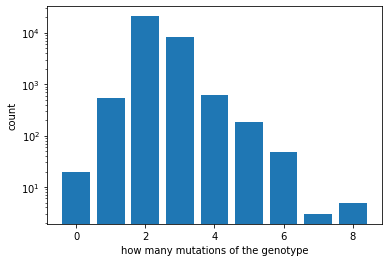

In [182]:
len_list = [len(i) for i in site_list]
plt.bar(*np.unique(len_list, return_counts=True))
plt.ylabel('count')
plt.xlabel('how many mutations of the genotype')
plt.yscale('log')
np.unique(len_list, return_counts=True)

In [183]:
epistasis_dict = {}
single_score = {}
single_site = []
score = []
site = []
count=0
for i,j in zip(site_list, score_list):
#     if len(i) == 1:
        
    if len(i) == 2:
        count+=1
        score.append(j)
        site.append(i)
        
#         if str(i) in epistasis_dict:
#             epistasis_dict[str(i)] += np.abs(j)
#         else:
#             epistasis_dict[str(i)] = np.abs(j)
#     if len(i) == 1:
#         single_site.append(i[0])
#         if int(i[0]) in single_score:
#             single_score[int(i[0])] += np.abs(j)
#         else:
#             single_score[int(i[0])] = np.abs(j)
# epistasis_dict
# single_score
score

[-2.19582236004369,
 -0.371805145455361,
 -1.82952703089893,
 0.125025624606424,
 -1.79332005922821,
 0.398118462892715,
 -0.494971147088531,
 -0.0398221222717512,
 -1.78079383613162,
 -1.49312544885405,
 -2.21519540838582,
 -2.32747196662899,
 -1.70609676137406,
 -2.44388252632533,
 -1.83477394259326,
 0.345605481760474,
 -2.28046383381974,
 -1.4279440025824,
 -1.45916162280335,
 -2.29020210670047,
 -2.45331942995988,
 -2.24721290123959,
 -1.88067709604191,
 -0.3909547712403,
 -0.0191215180285541,
 -1.76788171542442,
 -2.60759039010008,
 -2.02483062537991,
 -1.52793952908958,
 -1.566471073313,
 -1.27683999067963,
 -2.73148351212457,
 -2.4172959895292,
 -2.71635280670388,
 -1.39006229710553,
 -2.2005613762017,
 -0.7273568392917,
 1.22816052471324,
 -2.83353204995347,
 -1.90464797774531,
 -2.49026276196487,
 -1.79508534298818,
 -2.60361355246202,
 -2.03723720148326,
 -2.630931450602,
 -1.33324335223086,
 -1.49371058244781,
 -1.42512836943434,
 -3.22649865880501,
 -0.452597514603276,
 -2

20921 -4.12741940709792 3.63940419308991


Text(0.5, 0, 'double mutants functional score')

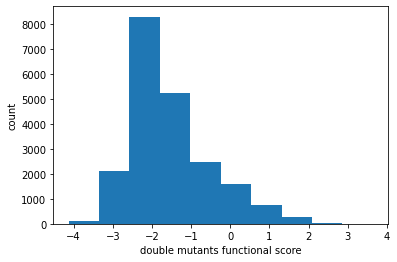

In [184]:
print(len(score), min(score), max(score))
plt.hist(score)
plt.ylabel('count')
plt.xlabel('double mutants functional score')

2107 -11.508316867161403 1.8637022861298527


Text(0.5, 0, 'log2 of positive double mutants functional score')

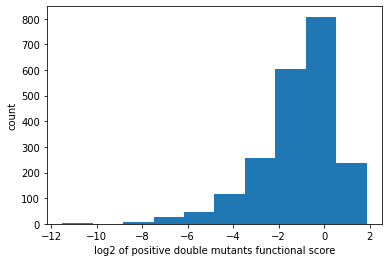

In [187]:
pos_score = []
for i in score:
    if i > 0:
        pos_score.append(np.log2(i))
print(len(pos_score), min(pos_score), max(pos_score))
plt.hist(pos_score)
plt.ylabel('count')
plt.xlabel('log2 of positive double mutants functional score')

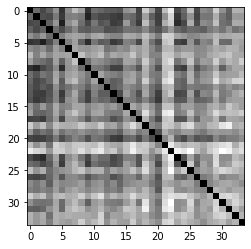

In [57]:
rows = 34
cols = 34
 
mat = [[0 for _ in range(cols)] for _ in range(rows)]

for element in epistasis_dict.items():
    site = [int(m)-1 for m in re.findall('[0-9]+', element[0])]
    mat[site[0]][site[1]] = element[1]
    mat[site[1]][site[0]] = element[1]
plt.imshow(mat, cmap='gray')

(array([  6.,  37.,  54.,  73.,  95., 116.,  91.,  56.,  25.,   8.]),
 array([ 13.59087245,  23.18929844,  32.78772443,  42.38615042,
         51.98457641,  61.58300239,  71.18142838,  80.77985437,
         90.37828036,  99.97670635, 109.57513234]),
 <BarContainer object of 10 artists>)

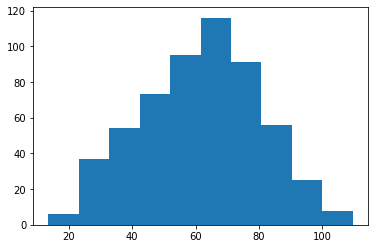

In [58]:
plt.hist(epistasis_dict.values())

(array([4.200e+01, 8.620e+02, 6.314e+03, 7.565e+03, 3.102e+03, 1.770e+03,
        8.980e+02, 3.150e+02, 5.300e+01, 3.000e+00]),
 array([-4.49228257, -3.67238798, -2.85249339, -2.03259881, -1.21270422,
        -0.39280963,  0.42708496,  1.24697954,  2.06687413,  2.88676872,
         3.70666331]),
 <BarContainer object of 10 artists>)

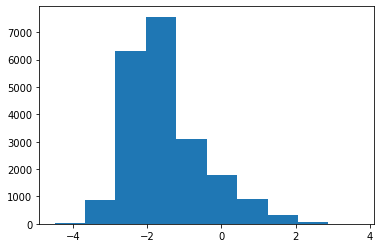

In [59]:
double_mutant_func = []
for i,j in zip(site_list, score_list):
    if len(i) == 2:
        double_mutant_func.append(j)
plt.hist(double_mutant_func)

In [60]:
min(double_mutant_func)

-4.49228256719099

In [38]:
max(double_mutant_func)

3.92565396071468

In [26]:
df_count = pd.read_csv('YAP1_count.csv', engine='python')
df_count = df_count[(df_count['101208_c_0']>=10) & (df_count['110307_c_0']>=10)]
df_count


,accession,hgvs_nt,hgvs_splice,hgvs_pro,101208_c_0,101208_c_1,101208_c_2,101208_c_3,110307_c_0,110307_c_1,110307_c_2,110307_c_3
0,urn:mavedb:00000002-a-2#1,NaN,NaN,p.[Ala11Gly;His23Asp],37.0,17.0,6.0,6.0,48.0,32.0,41.0,15.0
3,urn:mavedb:00000002-a-2#4,NaN,NaN,p.[Arg18Leu;Gln26Glu],33.0,12.0,6.0,12.0,53.0,43.0,46.0,16.0
4,urn:mavedb:00000002-a-2#5,NaN,NaN,p.[Asp25Asn;Thr29Ser],54.0,55.0,29.0,130.0,87.0,97.0,212.0,297.0
5,urn:mavedb:00000002-a-2#6,NaN,NaN,p.[Pro5Gln;Asn22Lys],65.0,45.0,13.0,24.0,80.0,70.0,70.0,33.0
7,urn:mavedb:00000002-a-2#8,NaN,NaN,p.[Pro3Ala;Lys12Gln],19.0,12.0,8.0,31.0,43.0,28.0,51.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30480,urn:mavedb:00000002-a-2#30481,NaN,NaN,p.[Pro5Gln;Glu9Ala],37.0,14.0,4.0,10.0,49.0,40.0,30.0,26.0
30483,urn:mavedb:00000002-a-2#30484,NaN,NaN,p.[Met10Val;His23Tyr],34.0,13.0,5.0,2.0,51.0,40.0,14.0,6.0
30484,urn:mavedb:00000002-a-2#30485,NaN,NaN,p.[Ala6Gly;Gln17Arg],42.0,40.0,20.0,106.0,81.0,112.0,165.0,219.0
30485,urn:mavedb:00000002-a-2#30486,NaN,NaN,p.[Ala6Pro;Thr29Met],14.0,10.0,7.0,6.0,38.0,20.0,29.0,16.0


In [196]:
df_count[df_count['hgvs_pro']=='_wt']

,accession,hgvs_nt,hgvs_splice,hgvs_pro,101208_c_0,101208_c_1,101208_c_2,101208_c_3,110307_c_0,110307_c_1,110307_c_2,110307_c_3
8892,urn:mavedb:00000002-a-2#8893,NaN,NaN,_wt,288136.0,265883.0,177719.0,654418.0,447091.0,540705.0,1053504.0,1303638.0


In [198]:
print(np.log(265883.0/288136.0), np.log(177719.0/288136.0), np.log(654418.0/288136.0))

-0.08037622850092493 -0.4832289396731853 0.8203137001263775


In [24]:
# df_score.loc[~df_score["hgvs_pro"].str.contains(';')]['']
mutant = df_count.loc[~df_score["hgvs_pro"].str.contains(';')]['hgvs_pro']
# score = df_count.loc[~df_score["hgvs_pro"].str.contains(';')]['score']
site = []
mut = []
whole = []
for i,j in zip(mutant,score):
    
    if i[-3:] not in Amino_acid_dict:
        print(i)
    else:
        site.append(re.findall(r'\d+', i))
        mut.append(Amino_acid_dict[i[-3:]])
        whole.append((int(re.findall(r'\d+', i)[0]), Amino_acid_dict[i[-3:]], j))


p.Gln26?
p.His23?
p.Thr13?
_sy
p.Tyr19?
p.Phe20?
p.Ala11?
_wt
p.Ser15?
p.Asp25?
p.Arg18?
p.Asn22?
p.Leu21?
p.Gly16?
p.Lys12?
p.Ile24?
p.Met10?
p.Gln17?
p.Ser14?


In [25]:
sorted(whole)

[(1, '*', -2.55412770476303),
 (1, 'A', 0.829364425931295),
 (1, 'C', 0.533582936101206),
 (1, 'E', 0.63649513690964),
 (1, 'F', 0.298219068003112),
 (1, 'G', 0.805922077204992),
 (1, 'H', 0.0614510891493186),
 (1, 'I', 0.682411974140431),
 (1, 'K', 1.20909916554037),
 (1, 'L', 0.949538934439867),
 (1, 'N', 0.264877629283927),
 (1, 'P', 1.75865890766557),
 (1, 'Q', 0.84555763800677),
 (1, 'R', 1.64221100648468),
 (1, 'S', 0.434944847041659),
 (1, 'T', 1.12030314778659),
 (1, 'V', 1.21537314535487),
 (1, 'Y', 0.181834175507179),
 (2, 'A', 0.486905856030735),
 (2, 'C', -0.0827663863975358),
 (2, 'D', 1.13471260078392),
 (2, 'E', 0.727661819632219),
 (2, 'F', 0.132854452737626),
 (2, 'G', 1.19255472891997),
 (2, 'H', 1.38880765467793),
 (2, 'I', 0.291451915973696),
 (2, 'L', 0.829267495073837),
 (2, 'M', 0.331099930262502),
 (2, 'N', 1.99591992998527),
 (2, 'P', 1.96678564166714),
 (2, 'R', 2.40940571718861),
 (2, 'S', 0.94167363574206),
 (2, 'T', 0.21734872279605),
 (2, 'Y', 0.1098743559

In [29]:
df_count.loc[df_count["hgvs_pro"].str.contains('Ter')]

,accession,hgvs_nt,hgvs_splice,hgvs_pro,101208_c_0,101208_c_1,101208_c_2,101208_c_3,110307_c_0,110307_c_1,110307_c_2,110307_c_3
15,urn:mavedb:00000002-a-2#16,NaN,NaN,p.[Pro3Leu;Trp8Ter],83.0,56.0,7.0,12.0,99.0,117.0,60.0,35.0
41,urn:mavedb:00000002-a-2#42,NaN,NaN,p.[Ser15Tyr;Gln17Ter],30.0,30.0,8.0,8.0,48.0,51.0,56.0,28.0
52,urn:mavedb:00000002-a-2#53,NaN,NaN,p.[Pro5Ala;Tyr19Ter],46.0,17.0,2.0,4.0,77.0,39.0,22.0,25.0
75,urn:mavedb:00000002-a-2#76,NaN,NaN,p.[Ala11Val;Gln17Ter],45.0,26.0,5.0,7.0,72.0,49.0,36.0,14.0
76,urn:mavedb:00000002-a-2#77,NaN,NaN,p.[Lys12Ter;Phe20Ser],27.0,20.0,7.0,8.0,40.0,31.0,32.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30424,urn:mavedb:00000002-a-2#30425,NaN,NaN,p.[Gln17Ter;Pro33Leu],58.0,32.0,7.0,13.0,68.0,64.0,57.0,26.0
30427,urn:mavedb:00000002-a-2#30428,NaN,NaN,p.[Lys12Ter;Arg34Ser],36.0,29.0,3.0,3.0,55.0,46.0,18.0,20.0
30430,urn:mavedb:00000002-a-2#30431,NaN,NaN,p.[Ala6Pro;Gln17Ter],13.0,2.0,1.0,2.0,35.0,20.0,14.0,9.0
30437,urn:mavedb:00000002-a-2#30438,NaN,NaN,p.[Thr28Asn;Trp30Ter],125.0,71.0,19.0,28.0,186.0,139.0,81.0,33.0


In [64]:
print(df_count['101208_c_1'].sum())
print(df_count.loc[df_count["hgvs_pro"].str.contains('Ter')]['101208_c_1'].sum())

print(df_count['101208_c_1'].sum())
print(df_count.loc[df_count["hgvs_pro"].str.contains('Ter')]['101208_c_1'].sum())

print(df_count['101208_c_2'].sum())
print(df_count.loc[df_count["hgvs_pro"].str.contains('Ter')]['101208_c_2'].sum())

print(df_count['101208_c_3'].sum())
print(df_count.loc[df_count["hgvs_pro"].str.contains('Ter')]['101208_c_3'].sum())

1685822.0
84129.0
1685822.0
84129.0
902530.0
21770.0
3008486.0
31041.0


In [171]:
codontab = {
    'TCA': 'S',    # Serina
    'TCC': 'S',    # Serina
    'TCG': 'S',    # Serina
    'TCT': 'S',    # Serina
    'TTC': 'F',    # Fenilalanina
    'TTT': 'F',    # Fenilalanina
    'TTA': 'L',    # Leucina
    'TTG': 'L',    # Leucina
    'TAC': 'Y',    # Tirosina
    'TAT': 'Y',    # Tirosina
    'TAA': '*',    # Stop
    'TAG': '*',    # Stop
    'TGC': 'C',    # Cisteina
    'TGT': 'C',    # Cisteina
    'TGA': '*',    # Stop
    'TGG': 'W',    # Triptofano
    'CTA': 'L',    # Leucina
    'CTC': 'L',    # Leucina
    'CTG': 'L',    # Leucina
    'CTT': 'L',    # Leucina
    'CCA': 'P',    # Prolina
    'CCC': 'P',    # Prolina
    'CCG': 'P',    # Prolina
    'CCT': 'P',    # Prolina
    'CAC': 'H',    # Histidina
    'CAT': 'H',    # Histidina
    'CAA': 'Q',    # Glutamina
    'CAG': 'Q',    # Glutamina
    'CGA': 'R',    # Arginina
    'CGC': 'R',    # Arginina
    'CGG': 'R',    # Arginina
    'CGT': 'R',    # Arginina
    'ATA': 'I',    # Isoleucina
    'ATC': 'I',    # Isoleucina
    'ATT': 'I',    # Isoleucina
    'ATG': 'M',    # Methionina
    'ACA': 'T',    # Treonina
    'ACC': 'T',    # Treonina
    'ACG': 'T',    # Treonina
    'ACT': 'T',    # Treonina
    'AAC': 'N',    # Asparagina
    'AAT': 'N',    # Asparagina
    'AAA': 'K',    # Lisina
    'AAG': 'K',    # Lisina
    'AGC': 'S',    # Serina
    'AGT': 'S',    # Serina
    'AGA': 'R',    # Arginina
    'AGG': 'R',    # Arginina
    'GTA': 'V',    # Valina
    'GTC': 'V',    # Valina
    'GTG': 'V',    # Valina
    'GTT': 'V',    # Valina
    'GCA': 'A',    # Alanina
    'GCC': 'A',    # Alanina
    'GCG': 'A',    # Alanina
    'GCT': 'A',    # Alanina
    'GAC': 'D',    # Acido Aspartico
    'GAT': 'D',    # Acido Aspartico
    'GAA': 'E',    # Acido Glutamico
    'GAG': 'E',    # Acido Glutamico
    'GGA': 'G',    # Glicina
    'GGC': 'G',    # Glicina
    'GGG': 'G',    # Glicina
    'GGT': 'G'     # Glicina
}
single_count = pd.read_csv('single_allele_counts_rep1.csv')
single_count['AA'] = [codontab[i] for i in single_count['codon']]
single_count = single_count.drop('codon', axis=1)

total_count = []
ter_counts = []
# print(df_count.loc[df_count["hgvs_pro"].str.contains('Ter')]['101208_c_1'].sum())

for i in range(4):
    total_count.append(df_single_freq.loc[(df_single_freq['generation']==i)&(df_single_freq['site']==1)]['counts'].sum())
    ter_counts.append(df_count.loc[df_count["hgvs_pro"].str.contains('Ter')]['101208_c_'+str(i)].sum())
df_single_freq = single_count.groupby(['replicate', 'generation', 'site', 'AA']).agg({'counts':'sum'}).reset_index()
df_single_freq

old_freq = []
for gen in range(4):
    raw_counts = df_single_freq.loc[df_single_freq['generation']==gen]['counts']
    freq = [i/total_count[gen] for i in raw_counts]
    old_freq+=freq
df_single_freq['freq'] = old_freq
# new_freq
# df_single_freq
length = df_single_freq.loc[(df_single_freq['generation']==0)].shape[0]
new_freq_inp = [0]* length
new_freq_out = [0]* length

carryover_rate = []
for i in range(4):
    carryover_rate.append(df_count.loc[df_count["hgvs_pro"].str.contains('Ter')]['101208_c_'+str(i)].sum()/df_count['101208_c_'+str(i)].sum())


for gen in range(1,4):
    f_k_un = df_single_freq.loc[df_single_freq['generation']==gen]['freq'].tolist()
    f_k_pre_un = df_single_freq.loc[df_single_freq['generation']==gen-1]['freq'].tolist()
    f_k_inp = [(1-carryover_rate[gen])*i for i in f_k_pre_un]
    f_k_out = [i-carryover_rate[gen]*j for i,j in zip(f_k_un, f_k_pre_un)]
    
    new_freq_inp+=f_k_inp
    new_freq_out+=f_k_out

df_single_freq['NSCOR_inp'] = new_freq_inp
df_single_freq['NSCOR_out'] = new_freq_out

ratio = []
log_ratio = []
for f_out, f_int in zip(df_single_freq['NSCOR_out'], df_single_freq['NSCOR_inp']):
    if f_int == 0:
        ratio.append('NaN')
        log_ratio.append('NaN')
    else:
        ratio.append(f_out/f_int)
        log_ratio.append(np.log2(f_out/f_int))
df_single_freq['specific_ratio'] = ratio
df_single_freq['projected_ratio'] = log_ratio
df_single_freq




AA_list = df_single_freq['AA'].unique()
slope1 = []
for i in range(34):
    for j in AA_list:
        table = df_single_freq.loc[(df_single_freq['AA']==j) & (df_single_freq['site']==i+1)]
        X = table.iloc[1:]['generation'].values.reshape(3, 1)
#         x_list = list(X)
        y = table.iloc[1:]['projected_ratio'].values.reshape(3, 1)
#         print(table.iloc[1:]['specific_ratio'].values)
        if 'NaN' in table.iloc[1:]['projected_ratio'].values:
            slope1.append('nan')
        else:
#             print(y)
            reg = LinearRegression().fit(X, y)
            slope1.append(reg.coef_[0][0])
slope1

[0.2723963288929472,
 1.0490741953671352,
 0.7850203823075028,
 0.9895691524096225,
 0.9652979438004189,
 0.5322740233800488,
 1.007553645377395,
 0.813990816386664,
 0.6599528260651917,
 0.8951590330593787,
 1.1992469513447988,
 'nan',
 0.9150820956387443,
 1.1549109180003023,
 0.8288091228232256,
 1.1458576987372233,
 1.390159574165602,
 0.870753432153748,
 1.1284029064446766,
 'nan',
 0.8102313455827241,
 'nan',
 1.0080199124321365,
 1.9812772339802487,
 0.9938584324013143,
 1.1963161386259815,
 0.9863866767782349,
 0.9728501496848462,
 1.2530115095143364,
 0.9365692030511739,
 'nan',
 1.06540499093461,
 0.6379616678369197,
 1.1592461166485346,
 1.0752777164266356,
 'nan',
 0.6918359210424418,
 0.49463189116499645,
 0.8460983512655792,
 0.9902171529520464,
 'nan',
 0.5534270889625046,
 0.7086277701735335,
 0.9563317385664293,
 'nan',
 'nan',
 1.0916720550653356,
 'nan',
 0.4230822331403116,
 1.4539683234575527,
 0.7653041369064504,
 1.6091821993353235,
 0.9413204951599727,
 'nan',
 

In [172]:
codontab = {
    'TCA': 'S',    # Serina
    'TCC': 'S',    # Serina
    'TCG': 'S',    # Serina
    'TCT': 'S',    # Serina
    'TTC': 'F',    # Fenilalanina
    'TTT': 'F',    # Fenilalanina
    'TTA': 'L',    # Leucina
    'TTG': 'L',    # Leucina
    'TAC': 'Y',    # Tirosina
    'TAT': 'Y',    # Tirosina
    'TAA': '*',    # Stop
    'TAG': '*',    # Stop
    'TGC': 'C',    # Cisteina
    'TGT': 'C',    # Cisteina
    'TGA': '*',    # Stop
    'TGG': 'W',    # Triptofano
    'CTA': 'L',    # Leucina
    'CTC': 'L',    # Leucina
    'CTG': 'L',    # Leucina
    'CTT': 'L',    # Leucina
    'CCA': 'P',    # Prolina
    'CCC': 'P',    # Prolina
    'CCG': 'P',    # Prolina
    'CCT': 'P',    # Prolina
    'CAC': 'H',    # Histidina
    'CAT': 'H',    # Histidina
    'CAA': 'Q',    # Glutamina
    'CAG': 'Q',    # Glutamina
    'CGA': 'R',    # Arginina
    'CGC': 'R',    # Arginina
    'CGG': 'R',    # Arginina
    'CGT': 'R',    # Arginina
    'ATA': 'I',    # Isoleucina
    'ATC': 'I',    # Isoleucina
    'ATT': 'I',    # Isoleucina
    'ATG': 'M',    # Methionina
    'ACA': 'T',    # Treonina
    'ACC': 'T',    # Treonina
    'ACG': 'T',    # Treonina
    'ACT': 'T',    # Treonina
    'AAC': 'N',    # Asparagina
    'AAT': 'N',    # Asparagina
    'AAA': 'K',    # Lisina
    'AAG': 'K',    # Lisina
    'AGC': 'S',    # Serina
    'AGT': 'S',    # Serina
    'AGA': 'R',    # Arginina
    'AGG': 'R',    # Arginina
    'GTA': 'V',    # Valina
    'GTC': 'V',    # Valina
    'GTG': 'V',    # Valina
    'GTT': 'V',    # Valina
    'GCA': 'A',    # Alanina
    'GCC': 'A',    # Alanina
    'GCG': 'A',    # Alanina
    'GCT': 'A',    # Alanina
    'GAC': 'D',    # Acido Aspartico
    'GAT': 'D',    # Acido Aspartico
    'GAA': 'E',    # Acido Glutamico
    'GAG': 'E',    # Acido Glutamico
    'GGA': 'G',    # Glicina
    'GGC': 'G',    # Glicina
    'GGG': 'G',    # Glicina
    'GGT': 'G'     # Glicina
}
single_count = pd.read_csv('single_allele_counts_rep2.csv')
single_count['AA'] = [codontab[i] for i in single_count['codon']]
single_count = single_count.drop('codon', axis=1)

total_count = []
ter_counts = []
# print(df_count.loc[df_count["hgvs_pro"].str.contains('Ter')]['101208_c_1'].sum())

for i in range(4):
    total_count.append(df_single_freq.loc[(df_single_freq['generation']==i)&(df_single_freq['site']==1)]['counts'].sum())
    ter_counts.append(df_count.loc[df_count["hgvs_pro"].str.contains('Ter')]['101208_c_'+str(i)].sum())
df_single_freq = single_count.groupby(['replicate', 'generation', 'site', 'AA']).agg({'counts':'sum'}).reset_index()
df_single_freq

old_freq = []
for gen in range(4):
    raw_counts = df_single_freq.loc[df_single_freq['generation']==gen]['counts']
    freq = [i/total_count[gen] for i in raw_counts]
    old_freq+=freq
df_single_freq['freq'] = old_freq
# new_freq
# df_single_freq
length = df_single_freq.loc[(df_single_freq['generation']==0)].shape[0]
new_freq_inp = [0]* length
new_freq_out = [0]* length

carryover_rate = []
for i in range(4):
    carryover_rate.append(df_count.loc[df_count["hgvs_pro"].str.contains('Ter')]['101208_c_'+str(i)].sum()/df_count['101208_c_'+str(i)].sum())


for gen in range(1,4):
    f_k_un = df_single_freq.loc[df_single_freq['generation']==gen]['freq'].tolist()
    f_k_pre_un = df_single_freq.loc[df_single_freq['generation']==gen-1]['freq'].tolist()
    f_k_inp = [(1-carryover_rate[gen])*i for i in f_k_pre_un]
    f_k_out = [i-carryover_rate[gen]*j for i,j in zip(f_k_un, f_k_pre_un)]
    
    new_freq_inp+=f_k_inp
    new_freq_out+=f_k_out

df_single_freq['NSCOR_inp'] = new_freq_inp
df_single_freq['NSCOR_out'] = new_freq_out

ratio = []
log_ratio = []
for f_out, f_int in zip(df_single_freq['NSCOR_out'], df_single_freq['NSCOR_inp']):
    if f_int == 0:
        ratio.append('NaN')
        log_ratio.append('NaN')
    else:
        ratio.append(f_out/f_int)
        log_ratio.append(np.log2(f_out/f_int))
df_single_freq['specific_ratio'] = ratio
df_single_freq['projected_ratio'] = log_ratio
df_single_freq




AA_list = df_single_freq['AA'].unique()
slope = []
for i in range(34):
    for j in AA_list:
        table = df_single_freq.loc[(df_single_freq['AA']==j) & (df_single_freq['site']==i+1)]
        X = table.iloc[1:]['generation'].values.reshape(3, 1)
#         x_list = list(X)
        y = table.iloc[1:]['projected_ratio'].values.reshape(3, 1)
#         print(table.iloc[1:]['specific_ratio'].values)
        if 'NaN' in table.iloc[1:]['projected_ratio'].values:
            slope.append('nan')
        else:
#             print(y)
            reg = LinearRegression().fit(X, y)
            slope.append(reg.coef_[0][0])
slope

[-0.2332080852606562,
 -1.069510345517237,
 -1.017506835933358,
 -1.0054131451774615,
 -0.9898904580590877,
 -1.6599983654762256,
 -1.0379676880808706,
 -1.0920780972643271,
 -0.8916666549555982,
 -0.8756718815218686,
 -0.8042918798682136,
 'nan',
 -1.0327261799754799,
 -1.0492532921907838,
 -1.1972257812526694,
 -0.9672785106436247,
 -0.6578452433157935,
 -1.1838125009522635,
 -0.9851092730074302,
 'nan',
 -1.0278625267733255,
 'nan',
 -1.0026056950424314,
 -0.8842071612673664,
 -0.9590599806260812,
 -0.836006018786934,
 -1.0435439083375997,
 -0.9588386118567629,
 -1.9325918775496085,
 -0.9906304668820407,
 'nan',
 -1.034198709783944,
 -1.1927718430148087,
 -1.010443485213198,
 -1.1546636705426698,
 'nan',
 -1.7763596188261614,
 -1.2580129970772584,
 -1.0548986875123378,
 -1.0047405067839996,
 'nan',
 -1.6888568194341482,
 -1.3840194152812215,
 -0.9949235168466283,
 'nan',
 'nan',
 -1.0443750396190978,
 'nan',
 -0.6421862280006658,
 -0.42865130928460526,
 -1.4101947356886249,
 -0.8167

In [173]:
slope.count('nan')

154

In [4]:
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.metrics import r2_score
new_slope1 = []
new_slope = []
for i,j in zip(slope1, slope):
    if i == 'nan' or j == 'nan':
        continue
    else:
        new_slope1.append(i)
        new_slope.append(j)
print(st.pearsonr(new_slope1, new_slope))
plt.scatter(slope1, slope)


NameError: name 'slope1' is not defined

(0.9571884797229221, 6.490227418512476e-300)


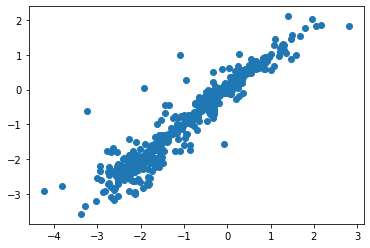

In [166]:
df_score2 = pd.read_csv('YAP1_score_2.csv', engine='python')
df_score2 = df_score2.loc[~df_score2["hgvs_pro"].str.contains(';')]
print(st.pearsonr(df_score2['score_101208'], df_score2['score_110307']))
plt.scatter(df_score2['score_101208'], df_score2['score_110307'])


In [ ]:
df_score2

In [63]:
total_count = []
for i in range(4):
    total_count.append(df_single_freq.loc[(df_single_freq['generation']==i)&(df_single_freq['site']==1)]['counts'].sum())
print(total_count)
total_count = []
for i in range(4):
    total_count.append(df_single_freq.loc[(df_single_freq['generation']==i)&(df_single_freq['site']==3)]['counts'].sum())
print(total_count)

[2642426, 2881603, 4771474, 5517657]
[2642426, 2881603, 4771474, 5517657]


In [3]:
df_count = pd.read_csv('YAP1_count.csv', engine='python')
df_count

df_count

site_list = []
score_list = []
double_mutant = {}
single_mutant = {}
for i,j,k,l,m in zip(df_count['hgvs_pro'].tolist(), df_count['101208_c_0'].tolist(), df_count['101208_c_1'].tolist(), df_count['101208_c_2'].tolist(), df_count['101208_c_3'].tolist()):
    r = re.compile("([a-zA-Z]+)([0-9]+)")
    string_list = re.split(r'(\w+)', i)
    string_list = [i for i in string_list if len(i)>6]
    if len(string_list)==1:
        single_mutant[string_list[0]] = [j,k,l,m]
    if len(string_list)==2:
        double_mutant[str(string_list)] = [j,k,l,m]
#     print(string_list, j)

wt_row = df_count.loc[df_count['hgvs_pro'].str.contains('wt')]
total_single_count = []
total_double_count = []
total_ter_count = []
for i in range(4):
    total_single_count.append(sum([float(v[i]) for v in single_mutant.values()])+wt_row['101208_c_'+str(i)].values[0])
    total_double_count.append(sum([float(v[i]) for v in double_mutant.values()])+wt_row['101208_c_'+str(i)].values[0])
    total_ter_count.append(sum([float(v[i]) for v,x in zip(single_mutant.values(), single_mutant.keys()) if x[-3:]=='Ter']))

total_single_count

carryover_rate = [i/j for i,j in zip(total_ter_count, total_single_count)]

single_count_table = pd.DataFrame.from_dict(single_mutant,orient='index').reset_index()
double_count_table = pd.DataFrame.from_dict(double_mutant,orient='index').reset_index()

double_count_table['mutant1'] = [i.strip('][').split(', ')[0][1:-1] for i in double_count_table['index']]
double_count_table['mutant2'] = [i.strip('][').split(', ')[1][1:-1] for i in double_count_table['index']]
double_count_table = double_count_table.drop('index', axis=1)

double_count_table

for i in range(4):
    double_count_table[[i]]/=total_single_count[i]
    single_count_table[[i]]/=total_double_count[i]
df2 = {'index':'wt', 
       0: wt_row['101208_c_'+str(0)].values[0]/total_single_count[0],
       1: wt_row['101208_c_'+str(1)].values[0]/total_single_count[1],
       2: wt_row['101208_c_'+str(2)].values[0]/total_single_count[2],
       3: wt_row['101208_c_'+str(3)].values[0]/total_single_count[3]}
single_count_table = single_count_table.append(df2, ignore_index = True)
df2 = {'mutant1':'wt', 
       'mutant2':'wt', 
       0: wt_row['101208_c_'+str(0)].values[0]/total_single_count[0],
       1: wt_row['101208_c_'+str(1)].values[0]/total_single_count[1],
       2: wt_row['101208_c_'+str(2)].values[0]/total_single_count[2],
       3: wt_row['101208_c_'+str(3)].values[0]/total_single_count[3]}
double_count_table = double_count_table.append(df2, ignore_index = True)
for i in range(1,4):
    
    NSCOR_input = [k*(1-carryover_rate[i]) for k in single_count_table[i-1]]
    NSCOR_output = [j - k*carryover_rate[i] for k,j in zip(single_count_table[i-1], single_count_table[i])]
    single_count_table['NSCOR_ratio_'+str(i)] = [j/k for k,j in zip(NSCOR_input, NSCOR_output)]
    NSCOR_input = [k*(1-carryover_rate[i]) for k in double_count_table[i-1]]
    NSCOR_output = [j - k*carryover_rate[i] for k,j in zip(double_count_table[i-1], double_count_table[i])]
    double_count_table['NSCOR_ratio_'+str(i)] = [j/k for k,j in zip(NSCOR_input, NSCOR_output)]
    

single_count_table['projected_0'] = 0

single_count_table['projected_1'] = [np.log2(i) for i in single_count_table['NSCOR_ratio_1'].tolist()]
single_count_table['projected_2'] = [np.log2(i*j) for i,j in zip(single_count_table['NSCOR_ratio_1'].tolist(),
                                                                 single_count_table['NSCOR_ratio_2'].tolist())]
single_count_table['projected_3'] = [np.log2(i*j*k) for i,j,k in zip(single_count_table['NSCOR_ratio_1'].tolist(),
                                                                     single_count_table['NSCOR_ratio_2'].tolist(),
                                                                     single_count_table['NSCOR_ratio_3'].tolist())]
double_count_table['projected_0'] = 0

double_count_table['projected_1'] = [np.log2(i) for i in double_count_table['NSCOR_ratio_1'].tolist()]
double_count_table['projected_2'] = [np.log2(i*j) for i,j in zip(double_count_table['NSCOR_ratio_1'].tolist(),
                                                                 double_count_table['NSCOR_ratio_2'].tolist())]
double_count_table['projected_3'] = [np.log2(i*j*k) for i,j,k in zip(double_count_table['NSCOR_ratio_1'].tolist(),
                                                                     double_count_table['NSCOR_ratio_2'].tolist(),
                                                                     double_count_table['NSCOR_ratio_3'].tolist())]

double_count_table

,0,1,2,3,mutant1,mutant2,NSCOR_ratio_1,NSCOR_ratio_2,NSCOR_ratio_3,projected_0,projected_1,projected_2,projected_3
0,3.172151e-05,0.000018,0.000011,3.251853e-06,Ala11Gly,His23Asp,0.550974,0.614062,0.287805,0,-0.859943,-1.563487,-3.360321
1,8.573381e-07,0.000001,0.000006,5.419755e-07,Pro5Ser,Ser15Leu,1.238947,5.335739,0.091677,0,0.309114,2.724803,-0.722498
2,2.829216e-05,0.000013,0.000011,6.503705e-06,Arg18Leu,Gln26Glu,0.429015,0.876377,0.581999,0,-1.220898,-1.411274,-2.192186
3,4.629626e-05,0.000058,0.000054,7.045681e-05,Asp25Asn,Thr29Ser,1.262516,0.925025,1.312409,0,0.336302,0.223866,0.616084
4,5.572698e-05,0.000047,0.000024,1.300741e-05,Pro5Gln,Asn22Lys,0.847332,0.499809,0.536738,0,-0.239001,-1.239552,-2.137262
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20915,2.914949e-05,0.000014,0.000009,1.083951e-06,Met10Val,His23Tyr,0.452837,0.670561,0.111290,0,-1.142936,-1.719496,-4.887105
20916,3.600820e-05,0.000042,0.000037,5.744940e-05,Ala6Gly,Gln17Arg,1.178340,0.876377,1.552836,0,0.236756,0.046380,0.681285
20917,1.200273e-05,0.000011,0.000013,3.251853e-06,Ala6Pro,Thr29Met,0.875304,1.233126,0.245778,0,-0.192144,0.110177,-1.914396
20918,3.858021e-05,0.000034,0.000007,5.961730e-06,Lys12Glu,Arg34Cys,0.871264,0.207473,0.802643,0,-0.198819,-2.467822,-2.784991


In [28]:
df_count

NameError: name 'df_count' is not defined

In [4]:
from sklearn.linear_model import LinearRegression
slope = []
for i in range(single_count_table.shape[0]):
#     print(i)
    X = np.array([1,2,3,4]).reshape(4,1)
    row = single_count_table.iloc[i,:]
    y =  np.array([row['projected_0'], row['projected_1'], row['projected_2'], row['projected_3']]).reshape(4,1)
    reg = LinearRegression().fit(X, y)
    
    if reg.score(X,y)>0.75:
#         reg = LinearRegression().fit(X, y)
        slope.append(reg.coef_[0][0])
    else:
        slope.append(np.nan)
#     print(row)
single_count_table['slope_v'] = slope

slope = []
for i in range(double_count_table.shape[0]):
    X = np.array([1,2,3,4]).reshape(4,1)
    row = double_count_table.iloc[i,:]
    y =  np.array([row['projected_0'], row['projected_1'], row['projected_2'], row['projected_3']]).reshape(4,1)
    reg = LinearRegression().fit(X, y)
    if reg.score(X,y)>0:
#         reg = LinearRegression().fit(X, y)
        slope.append(reg.coef_[0][0])
    else:
        slope.append(np.nan)

double_count_table['slope_v'] = slope

double_count_table = double_count_table.dropna()
single_count_table = single_count_table.dropna()

wt_score = single_count_table.loc[single_count_table['index']=='wt']['slope_v'].values[0]
single_count_table['function_score'] = [2**(i-wt_score) for i in single_count_table['slope_v'].tolist()]
single_count_table

double_count_table['function_score'] = [2**(i-wt_score) for i in double_count_table['slope_v'].tolist()]
double_count_table

predicted_score = []
single_mut_list = single_count_table['index'].tolist()
for i in range(double_count_table.shape[0]-1):
    print(i)
    mut1 = double_count_table.iloc[i]['mutant1']
    mut2 = double_count_table.iloc[i]['mutant2']
    if mut1 in single_mut_list and mut2 in single_mut_list:
        single_score1 = single_count_table.loc[single_count_table['index']==mut1]['function_score'].values[0]
        single_score2 = single_count_table.loc[single_count_table['index']==mut2]['function_score'].values[0]
        predicted_score.append(single_score1*single_score2)
    else:
        predicted_score.append(np.nan)
predicted_score.append(1)
double_count_table['predicted_score'] = predicted_score

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082


3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733


5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484


7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215


8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8933
8934
8935
8936
8937


10439
10440
10441
10442
10443
10444
10445
10446
10447
10448
10449
10450
10451
10452
10453
10454
10455
10456
10457
10458
10459
10460
10461
10462
10463
10464
10465
10466
10467
10468
10469
10470
10471
10472
10473
10474
10475
10476
10477
10478
10479
10480
10481
10482
10483
10484
10485
10486
10487
10488
10489
10490
10491
10492
10493
10494
10495
10496
10497
10498
10499
10500
10501
10502
10503
10504
10505
10506
10507
10508
10509
10510
10511
10512
10513
10514
10515
10516
10517
10518
10519
10520
10521
10522
10523
10524
10525
10526
10527
10528
10529
10530
10531
10532
10533
10534
10535
10536
10537
10538
10539
10540
10541
10542
10543
10544
10545
10546
10547
10548
10549
10550
10551
10552
10553
10554
10555
10556
10557
10558
10559
10560
10561
10562
10563
10564
10565
10566
10567
10568
10569
10570
10571
10572
10573
10574
10575
10576
10577
10578
10579
10580
10581
10582
10583
10584
10585
10586
10587
10588
10589
10590
10591
10592
10593
10594
10595
10596
10597
10598
10599
10600
10601
10602
10603
10604
1060

11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
11974
11975
11976
11977
11978
11979
11980
11981
11982
11983
11984
11985
11986
11987
11988
11989
11990
11991
11992
11993
11994
11995
11996
11997
11998
11999
12000
12001
12002
12003
12004
12005
12006
12007
12008
12009
12010
12011
12012
12013
12014
12015
12016
12017
12018
12019
12020
12021
12022
12023
12024
12025
12026
12027
12028
12029
12030
12031
12032
12033
12034
12035
12036
12037
12038
12039
12040
12041
12042
12043
12044
12045
12046
12047
12048
12049
12050
12051
12052
12053
12054
12055
12056
12057
12058
12059
12060
12061
12062
12063
12064
12065
12066
12067
12068
12069
12070
12071
12072
12073
12074
12075
12076
12077
12078
12079
12080
12081
12082
12083
12084
12085
12086
12087
12088
12089
12090
12091
12092
12093
12094
12095
12096
12097
12098
12099
12100
12101
12102
12103
12104
12105
12106
12107
12108
12109
1211

13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
13443
13444
13445
13446
13447
13448
13449
13450
13451
13452
13453
13454
13455
13456
13457
13458
13459
13460
13461
13462
13463
13464
13465
13466
13467
13468
13469
13470
13471
13472
13473
13474
13475
13476
13477
13478
13479
13480
13481
13482
13483
13484
13485
13486
13487
13488
13489
13490
13491
13492
13493
13494
13495
13496
13497
13498
13499
13500
13501
13502
13503
13504
13505
13506
13507
13508
13509
13510
13511
13512
13513
13514
13515
13516
13517
1351

14765
14766
14767
14768
14769
14770
14771
14772
14773
14774
14775
14776
14777
14778
14779
14780
14781
14782
14783
14784
14785
14786
14787
14788
14789
14790
14791
14792
14793
14794
14795
14796
14797
14798
14799
14800
14801
14802
14803
14804
14805
14806
14807
14808
14809
14810
14811
14812
14813
14814
14815
14816
14817
14818
14819
14820
14821
14822
14823
14824
14825
14826
14827
14828
14829
14830
14831
14832
14833
14834
14835
14836
14837
14838
14839
14840
14841
14842
14843
14844
14845
14846
14847
14848
14849
14850
14851
14852
14853
14854
14855
14856
14857
14858
14859
14860
14861
14862
14863
14864
14865
14866
14867
14868
14869
14870
14871
14872
14873
14874
14875
14876
14877
14878
14879
14880
14881
14882
14883
14884
14885
14886
14887
14888
14889
14890
14891
14892
14893
14894
14895
14896
14897
14898
14899
14900
14901
14902
14903
14904
14905
14906
14907
14908
14909
14910
14911
14912
14913
14914
14915
14916
14917
14918
14919
14920
14921
14922
14923
14924
14925
14926
14927
14928
14929
14930
1493

16154
16155
16156
16157
16158
16159
16160
16161
16162
16163
16164
16165
16166
16167
16168
16169
16170
16171
16172
16173
16174
16175
16176
16177
16178
16179
16180
16181
16182
16183
16184
16185
16186
16187
16188
16189
16190
16191
16192
16193
16194
16195
16196
16197
16198
16199
16200
16201
16202
16203
16204
16205
16206
16207
16208
16209
16210
16211
16212
16213
16214
16215
16216
16217
16218
16219
16220
16221
16222
16223
16224
16225
16226
16227
16228
16229
16230
16231
16232
16233
16234
16235
16236
16237
16238
16239
16240
16241
16242
16243
16244
16245
16246
16247
16248
16249
16250
16251
16252
16253
16254
16255
16256
16257
16258
16259
16260
16261
16262
16263
16264
16265
16266
16267
16268
16269
16270
16271
16272
16273
16274
16275
16276
16277
16278
16279
16280
16281
16282
16283
16284
16285
16286
16287
16288
16289
16290
16291
16292
16293
16294
16295
16296
16297
16298
16299
16300
16301
16302
16303
16304
16305
16306
16307
16308
16309
16310
16311
16312
16313
16314
16315
16316
16317
16318
16319
1632

17579
17580
17581
17582
17583
17584
17585
17586
17587
17588
17589
17590
17591
17592
17593
17594
17595
17596
17597
17598
17599
17600
17601
17602
17603
17604
17605
17606
17607
17608
17609
17610
17611
17612
17613
17614
17615
17616
17617
17618
17619
17620
17621
17622
17623
17624
17625
17626
17627
17628
17629
17630
17631
17632
17633
17634
17635
17636
17637
17638
17639
17640
17641
17642
17643
17644
17645
17646
17647
17648
17649
17650
17651
17652
17653
17654
17655
17656
17657
17658
17659
17660
17661
17662
17663
17664
17665
17666
17667
17668
17669
17670
17671
17672
17673
17674
17675
17676
17677
17678
17679
17680
17681
17682
17683
17684
17685
17686
17687
17688
17689
17690
17691
17692
17693
17694
17695
17696
17697
17698
17699
17700
17701
17702
17703
17704
17705
17706
17707
17708
17709
17710
17711
17712
17713
17714
17715
17716
17717
17718
17719
17720
17721
17722
17723
17724
17725
17726
17727
17728
17729
17730
17731
17732
17733
17734
17735
17736
17737
17738
17739
17740
17741
17742
17743
17744
1774

19009
19010
19011
19012
19013
19014
19015
19016
19017
19018
19019
19020
19021
19022
19023
19024
19025
19026
19027
19028
19029
19030
19031
19032
19033
19034
19035
19036
19037
19038
19039
19040
19041
19042
19043
19044
19045
19046
19047
19048
19049
19050
19051
19052
19053
19054
19055
19056
19057
19058
19059
19060
19061
19062
19063
19064
19065
19066
19067
19068
19069
19070
19071
19072
19073
19074
19075
19076
19077
19078
19079
19080
19081
19082
19083
19084
19085
19086
19087
19088
19089
19090
19091
19092
19093
19094
19095
19096
19097
19098
19099
19100
19101
19102
19103
19104
19105
19106
19107
19108
19109
19110
19111
19112
19113
19114
19115
19116
19117
19118
19119
19120
19121
19122
19123
19124
19125
19126
19127
19128
19129
19130
19131
19132
19133
19134
19135
19136
19137
19138
19139
19140
19141
19142
19143
19144
19145
19146
19147
19148
19149
19150
19151
19152
19153
19154
19155
19156
19157
19158
19159
19160
19161
19162
19163
19164
19165
19166
19167
19168
19169
19170
19171
19172
19173
19174
1917

20420
20421
20422
20423
20424
20425
20426
20427
20428
20429
20430
20431
20432
20433
20434
20435
20436
20437
20438
20439
20440
20441
20442
20443
20444
20445
20446
20447
20448
20449
20450
20451
20452
20453
20454
20455
20456
20457
20458
20459
20460
20461
20462
20463
20464
20465
20466
20467
20468
20469
20470
20471
20472
20473
20474
20475
20476
20477
20478
20479
20480
20481
20482
20483
20484
20485
20486
20487
20488
20489
20490
20491
20492
20493
20494
20495
20496
20497
20498
20499
20500
20501
20502
20503
20504
20505
20506
20507
20508
20509
20510
20511
20512
20513
20514
20515
20516
20517
20518
20519
20520
20521
20522
20523
20524
20525
20526
20527
20528
20529
20530
20531
20532
20533
20534
20535
20536
20537
20538
20539
20540
20541
20542
20543
20544
20545
20546
20547
20548
20549
20550
20551
20552
20553
20554
20555
20556
20557
20558
20559
20560
20561
20562
20563
20564
20565
20566
20567
20568
20569
20570
20571
20572
20573
20574
20575
20576
20577
20578
20579
20580
20581
20582
20583
20584
20585
2058

In [5]:
double_count_table.dropna()

,0,1,2,3,mutant1,mutant2,NSCOR_ratio_1,NSCOR_ratio_2,NSCOR_ratio_3,projected_0,projected_1,projected_2,projected_3,slope_v,function_score,predicted_score
0,0.000032,0.000018,0.000011,0.000003,Ala11Gly,His23Asp,0.550974,0.614062,0.287805,0,-0.859943,-1.563487,-3.360321,-1.078451,0.417133,0.369292
2,0.000028,0.000013,0.000011,0.000007,Arg18Leu,Gln26Glu,0.429015,0.876377,0.581999,0,-1.220898,-1.411274,-2.192186,-0.676694,0.551081,0.678882
4,0.000056,0.000047,0.000024,0.000013,Pro5Gln,Asn22Lys,0.847332,0.499809,0.536738,0,-0.239001,-1.239552,-2.137262,-0.741234,0.526971,0.437396
6,0.000016,0.000013,0.000015,0.000017,Pro3Ala,Lys12Gln,0.770039,1.173668,1.133611,0,-0.376996,-0.145971,0.034954,0.033589,0.901637,1.165582
7,0.000012,0.000019,0.000015,0.000016,Ala6Val,Ile24Asn,1.602590,0.777281,1.096837,0,0.680405,0.316912,0.450261,0.098729,0.943281,1.355654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20915,0.000029,0.000014,0.000009,0.000001,Met10Val,His23Tyr,0.452837,0.670561,0.111290,0,-1.142936,-1.719496,-4.887105,-1.523788,0.306348,0.469568
20916,0.000036,0.000042,0.000037,0.000057,Ala6Gly,Gln17Arg,1.178340,0.876377,1.552836,0,0.236756,0.046380,0.681285,0.185348,1.001650,1.177789
20917,0.000012,0.000011,0.000013,0.000003,Ala6Pro,Thr29Met,0.875304,1.233126,0.245778,0,-0.192144,0.110177,-1.914396,-0.544087,0.604135,0.667205
20918,0.000039,0.000034,0.000007,0.000006,Lys12Glu,Arg34Cys,0.871264,0.207473,0.802643,0,-0.198819,-2.467822,-2.784991,-1.062398,0.421800,0.547697


0.727406518961192

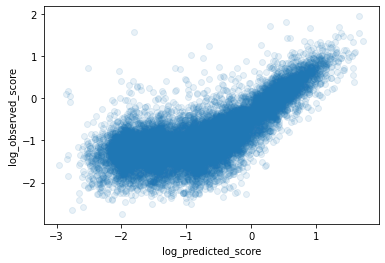

In [6]:
df_clean = double_count_table.dropna()
plt.scatter(np.log2(df_clean['predicted_score']), np.log2(df_clean['function_score']), alpha=0.1)
plt.xlabel('log_predicted_score')
plt.ylabel('log_observed_score')
st.pearsonr(np.log2(df_clean['predicted_score']), np.log2(df_clean['function_score']))[0]


/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.8012462107267903

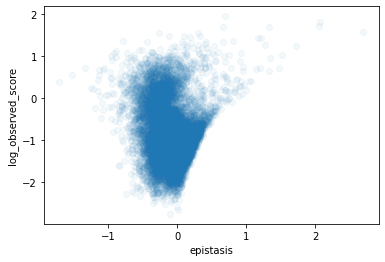

In [7]:
df_clean['epistasis'] = df_clean['function_score'] - df_clean['predicted_score']
plt.scatter(df_clean['epistasis'], np.log2(df_clean['function_score']), alpha=0.05)
plt.xlabel('epistasis')
plt.ylabel('log_observed_score')
st.pearsonr(df_clean['predicted_score'], np.log2(df_clean['function_score']))[0]


<AxesSubplot:>

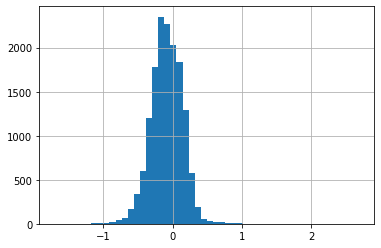

In [8]:
df_clean['epistasis'].hist(bins=50)

In [9]:
len(df_count['hgvs_pro'])

30487

In [10]:
double_count_table

,0,1,2,3,mutant1,mutant2,NSCOR_ratio_1,NSCOR_ratio_2,NSCOR_ratio_3,projected_0,projected_1,projected_2,projected_3,slope_v,function_score,predicted_score
0,3.172151e-05,0.000018,0.000011,3.251853e-06,Ala11Gly,His23Asp,0.550974,0.614062,0.287805,0,-0.859943,-1.563487,-3.360321,-1.078451,0.417133,0.369292
1,8.573381e-07,0.000001,0.000006,5.419755e-07,Pro5Ser,Ser15Leu,1.238947,5.335739,0.091677,0,0.309114,2.724803,-0.722498,0.024820,0.896173,NaN
2,2.829216e-05,0.000013,0.000011,6.503705e-06,Arg18Leu,Gln26Glu,0.429015,0.876377,0.581999,0,-1.220898,-1.411274,-2.192186,-0.676694,0.551081,0.678882
3,4.629626e-05,0.000058,0.000054,7.045681e-05,Asp25Asn,Thr29Ser,1.262516,0.925025,1.312409,0,0.336302,0.223866,0.616084,0.173582,0.993514,NaN
4,5.572698e-05,0.000047,0.000024,1.300741e-05,Pro5Gln,Asn22Lys,0.847332,0.499809,0.536738,0,-0.239001,-1.239552,-2.137262,-0.741234,0.526971,0.437396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20915,2.914949e-05,0.000014,0.000009,1.083951e-06,Met10Val,His23Tyr,0.452837,0.670561,0.111290,0,-1.142936,-1.719496,-4.887105,-1.523788,0.306348,0.469568
20916,3.600820e-05,0.000042,0.000037,5.744940e-05,Ala6Gly,Gln17Arg,1.178340,0.876377,1.552836,0,0.236756,0.046380,0.681285,0.185348,1.001650,1.177789
20917,1.200273e-05,0.000011,0.000013,3.251853e-06,Ala6Pro,Thr29Met,0.875304,1.233126,0.245778,0,-0.192144,0.110177,-1.914396,-0.544087,0.604135,0.667205
20918,3.858021e-05,0.000034,0.000007,5.961730e-06,Lys12Glu,Arg34Cys,0.871264,0.207473,0.802643,0,-0.198819,-2.467822,-2.784991,-1.062398,0.421800,0.547697


In [11]:
def reg_table(EPISTASIS_FILE):
#     EPISTASIS_FILE = './20220215_rep1_-3.txt'
    INDEX_FILE     = './index_matrix.csv'
    SEQUENCE       = "DVPLPAGWEMAKTSSGQRYFLNHIDQTTTWQDPR"
    AA  = sorted(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', '*'])

    with open(EPISTASIS_FILE) as f:
        content = f.readlines()
    content = [float(x.strip()) for x in content]
    df_index = pd.read_csv(INDEX_FILE, header=None)
    df_index.rename(columns = {0 : 'state_1', 1 : 'state_2', 2 : 'mat_index'}, inplace = True)
    index_list = df_index['mat_index'].tolist()
    selection_list = [content[i] for i in index_list]
    df_index['selection_coefficients'] = selection_list
    df_index['site_1'] = df_index['state_1']/21 + 2
    df_index['site_1'] = df_index['site_1'].astype(int)
    df_index['AA_1']   = df_index['state_1']%21
    df_index['AA_1']   = [AA[x] for x in df_index['AA_1'].tolist()]
    df_index['site_2'] = df_index['state_2']/21 + 2
    df_index['site_2'] = df_index['site_2'].astype(int)
    df_index['AA_2']   = df_index['state_2']%21
    df_index['AA_2']   = [AA[x] for x in df_index['AA_2'].tolist()]

    cols = ['site_1', 'AA_1', 'site_2', 'AA_2']
    df_index['all_variant'] = df_index[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis = 1)

    WT_list = []; axis_1 = []; axis_2 = []
    for i in range(len(SEQUENCE)):
        WT_list.append(i * 21 + AA.index(SEQUENCE[i]))
    df_WT_epi = df_index[(~df_index['state_1'].isin(WT_list))&(~df_index['state_2'].isin(WT_list))&(df_index['state_2'] != df_index['state_1'])]
    df_WT_epi = df_WT_epi.sort_values(['site_1', 'site_2'])

    df_WT_epi['absolute_s'] = np.abs(df_WT_epi['selection_coefficients'])
    df_WT_epi = df_WT_epi.groupby(['site_1', 'site_2'], as_index=False)['absolute_s'].agg('sum')
    df_WT_epi['site_1'] += 8
    df_WT_epi['site_2'] += 8
    df_WT_epi_ = df_WT_epi.copy()
    df_WT_epi_ = df_WT_epi_.rename(columns={"site_1":"site_2", "site_2":"site_1"})
    df_WT_epi  = df_WT_epi.append(df_WT_epi_, ignore_index=True, sort=False)
    flights = df_WT_epi.pivot("site_1", "site_2", "absolute_s")


    df_index['site_1'] = df_index['site_1']-1
    df_index['site_2'] = df_index['site_2']-1
    return df_index

/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

Text(0.5, 1.0, 'Pearsonr = 0.58, regularization = 10')

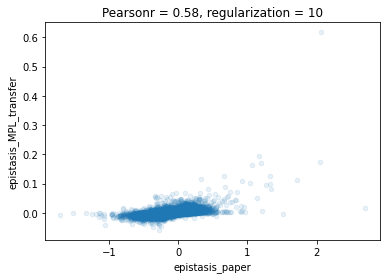

In [12]:
EPISTASIS_FILE = './rep1_-3.txt'
INDEX_FILE     = './index_matrix.csv'
SEQUENCE       = "DVPLPAGWEMAKTSSGQRYFLNHIDQTTTWQDPR"
AA  = sorted(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', '*'])

with open(EPISTASIS_FILE) as f:
    content = f.readlines()
content = [float(x.strip()) for x in content]
df_index = pd.read_csv(INDEX_FILE, header=None)
df_index.rename(columns = {0 : 'state_1', 1 : 'state_2', 2 : 'mat_index'}, inplace = True)
index_list = df_index['mat_index'].tolist()
selection_list = [content[i] for i in index_list]
df_index['selection_coefficients'] = selection_list
df_index['site_1'] = df_index['state_1']/21 + 2
df_index['site_1'] = df_index['site_1'].astype(int)
df_index['AA_1']   = df_index['state_1']%21
df_index['AA_1']   = [AA[x] for x in df_index['AA_1'].tolist()]
df_index['site_2'] = df_index['state_2']/21 + 2
df_index['site_2'] = df_index['site_2'].astype(int)
df_index['AA_2']   = df_index['state_2']%21
df_index['AA_2']   = [AA[x] for x in df_index['AA_2'].tolist()]

cols = ['site_1', 'AA_1', 'site_2', 'AA_2']
df_index['all_variant'] = df_index[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis = 1)

WT_list = []; axis_1 = []; axis_2 = []
for i in range(len(SEQUENCE)):
    WT_list.append(i * 21 + AA.index(SEQUENCE[i]))
df_WT_epi = df_index[(~df_index['state_1'].isin(WT_list))&(~df_index['state_2'].isin(WT_list))&(df_index['state_2'] != df_index['state_1'])]
df_WT_epi = df_WT_epi.sort_values(['site_1', 'site_2'])

df_WT_epi['absolute_s'] = np.abs(df_WT_epi['selection_coefficients'])
df_WT_epi = df_WT_epi.groupby(['site_1', 'site_2'], as_index=False)['absolute_s'].agg('sum')
df_WT_epi['site_1'] += 8
df_WT_epi['site_2'] += 8
df_WT_epi_ = df_WT_epi.copy()
df_WT_epi_ = df_WT_epi_.rename(columns={"site_1":"site_2", "site_2":"site_1"})
df_WT_epi  = df_WT_epi.append(df_WT_epi_, ignore_index=True, sort=False)
flights = df_WT_epi.pivot("site_1", "site_2", "absolute_s")


df_index['site_1'] = df_index['site_1']-1
df_index['site_2'] = df_index['site_2']-1
df_index

df_index.loc[df_index['all_variant']=='']

double_count_table_ = double_count_table.iloc[:-1]
double_count_table_['site_1'] = [int(i[3:-3])+1 for i in double_count_table_['mutant1'].tolist() ]
double_count_table_['site_2'] = [int(i[3:-3])+1 for i in double_count_table_['mutant2'].tolist() ]
double_count_table_['AA_1'] = [Amino_acid_dict[i[-3:]] for i in double_count_table_['mutant1'].tolist()]
double_count_table_['AA_2'] = [Amino_acid_dict[i[-3:]] for i in double_count_table_['mutant2'].tolist()]
double_count_table_['all_variant'] = [str(i)+'_'+str(j)+'_'+str(k)+'_'+str(l) for i,j,k,l in zip(double_count_table_['site_1'], double_count_table_['AA_1'],double_count_table_['site_2'],double_count_table_['AA_2'])]
double_count_table_['epistasis_paper'] = double_count_table_['function_score'] - double_count_table_['predicted_score']


pd.set_option('display.max_columns', 500)
df_merge = pd.merge(double_count_table_, df_index, how="inner", on=["all_variant"])
df_merge = df_merge.rename(columns={'selection_coefficients':'epistasis_MPL'})
df_merge

df_merge['mu1_single'] = [str(i)+'_'+str(j)+'_'+str(i)+'_'+str(j) for i,j in zip(df_merge['site_1_x'], df_merge['AA_1_x'])]
df_merge['mu2_single'] = [str(i)+'_'+str(j)+'_'+str(i)+'_'+str(j) for i,j in zip(df_merge['site_2_x'], df_merge['AA_2_x'])]
# selection = []
# for mut in df_merge['mu1_single']:
#     selection.append(df_index.loc[df_index['all_variant']==mut]['selection_coefficients'].values[0])
# df_merge['single_selection1'] = selection

# selection = []
# for mut in df_merge['mu2_single']:
#     selection.append(df_index.loc[df_index['all_variant']==mut]['selection_coefficients'].values[0])
# df_merge['single_selection2'] = selection
df_temp = df_index[['all_variant', 'selection_coefficients']]
df_temp = df_temp.rename(columns={'all_variant':'mu1_single'})
df_merge = pd.merge(df_temp, df_merge, how="inner", on=["mu1_single"])
df_merge = df_merge.rename(columns={'selection_coefficients':'selection_coefficients_1'})
df_temp = df_index[['all_variant', 'selection_coefficients']]
df_temp = df_temp.rename(columns={'all_variant':'mu2_single'})
df_merge = pd.merge(df_temp, df_merge, how="inner", on=["mu2_single"])
df_merge = df_merge.rename(columns={'selection_coefficients':'selection_coefficients_2'})
df_merge['epistasis_MPL_transfer'] = df_merge['epistasis_MPL']-df_merge['selection_coefficients_1']*df_merge['selection_coefficients_2']
df_merge


df_merge.plot.scatter(x='epistasis_paper', y='epistasis_MPL_transfer', alpha=0.1)
pr = st.pearsonr(df_merge.dropna()['epistasis_paper'], df_merge.dropna()['epistasis_MPL_transfer'])[0]
plt.title('Pearsonr = %.2f, regularization = 10'%pr)
# plt.ylim([-1e-6,4e-6])

In [13]:
df_merge[['epistasis_paper','epistasis_MPL_transfer']].corr()

,epistasis_paper,epistasis_MPL_transfer
epistasis_paper,1.000000,0.575658
epistasis_MPL_transfer,0.575658,1.000000


In [14]:
df_merge[:20]

,mu2_single,selection_coefficients_2,mu1_single,selection_coefficients_1,0,1,2,3,mutant1,mutant2,NSCOR_ratio_1,NSCOR_ratio_2,NSCOR_ratio_3,projected_0,projected_1,projected_2,projected_3,slope_v,function_score,predicted_score,site_1_x,site_2_x,AA_1_x,AA_2_x,all_variant,epistasis_paper,state_1,state_2,mat_index,epistasis_MPL,site_1_y,AA_1_y,site_2_y,AA_2_y,epistasis_MPL_transfer
0,35_S_35_S,0.012913,34_T_34_T,0.020034,0.000020,0.000031,0.000007,4.335804e-06,Pro33Thr,Arg34Ser,1.570969,0.230539,0.581999,0,0.651654,-1.465264,-2.246177,-0.885545,0.476810,0.287980,34,35,T,S,34_T_35_S,0.188829,689,709,38144,0.010507,33,T,34,S,0.010248
1,35_S_35_S,0.012913,34_S_34_S,0.027446,0.000033,0.000031,0.000007,2.167902e-06,Pro33Ser,Arg34Ser,0.937506,0.230539,0.287805,0,-0.093100,-2.210018,-4.006852,-1.413747,0.330628,0.290811,34,35,S,S,34_S_35_S,0.039818,688,709,38137,0.009983,33,S,34,S,0.009628
2,35_S_35_S,0.012913,34_R_34_R,0.032836,0.000034,0.000020,0.000017,8.671607e-06,Pro33Arg,Arg34Ser,0.570753,0.829437,0.516622,0,-0.809060,-1.078856,-2.031674,-0.636482,0.566657,0.368164,34,35,R,S,34_R_35_S,0.198493,687,709,38129,0.002757,33,R,34,S,0.002333
3,35_S_35_S,0.012913,34_Q_34_Q,0.018224,0.000025,0.000027,0.000011,4.877779e-06,Pro33Gln,Arg34Ser,1.107283,0.396138,0.434902,0,0.147024,-1.188899,-2.390137,-0.850633,0.488489,0.302949,34,35,Q,S,34_Q_35_S,0.185540,686,709,38121,0.009727,33,Q,34,S,0.009492
4,35_S_35_S,0.012913,34_L_34_L,0.024075,0.000030,0.000020,0.000019,5.419755e-07,Pro33Leu,Arg34Ser,0.657119,0.923318,0.023032,0,-0.605774,-0.720875,-6.161110,-1.859843,0.242690,0.274872,34,35,L,S,34_L_35_S,-0.032182,682,709,38093,0.006959,33,L,34,S,0.006648
5,35_S_35_S,0.012913,34_A_34_A,0.011437,0.000030,0.000019,0.000004,2.709877e-06,Pro33Ala,Arg34Ser,0.620754,0.182699,0.729095,0,-0.687906,-3.140366,-3.596187,-1.324102,0.351825,0.291996,34,35,A,S,34_A_35_S,0.059829,673,709,38077,0.001929,33,A,34,S,0.001782
6,35_S_35_S,0.012913,33_Y_33_Y,0.018474,0.000023,0.000013,0.000011,3.251853e-06,Asp32Tyr,Arg34Ser,0.531864,0.876377,0.287805,0,-0.910871,-1.101247,-2.898081,-0.888462,0.475847,NaN,33,35,Y,S,33_Y_35_S,NaN,671,709,38067,-0.001187,32,Y,34,S,-0.001426
7,35_S_35_S,0.012913,33_V_33_V,0.003804,0.000046,0.000026,0.000022,8.129632e-06,Asp32Val,Arg34Ser,0.555433,0.840703,0.361354,0,-0.848314,-1.098647,-2.567163,-0.795182,0.507629,NaN,33,35,V,S,33_V_35_S,NaN,669,709,38053,-0.000010,32,V,34,S,-0.000059
8,35_S_35_S,0.012913,33_N_33_N,0.025683,0.000054,0.000053,0.000048,2.276297e-05,Asp32Asn,Arg34Ser,0.976316,0.912052,0.468847,0,-0.034580,-0.167391,-1.260201,-0.391341,0.671607,0.472457,33,35,N,S,33_N_35_S,0.199149,663,709,38022,0.021705,32,N,34,S,0.021373
9,35_S_35_S,0.012913,33_H_33_H,0.008587,0.000025,0.000017,0.000011,1.029753e-05,Asp32His,Arg34Ser,0.668404,0.653409,0.925224,0,-0.581208,-1.195148,-1.307274,-0.453576,0.643251,NaN,33,35,H,S,33_H_35_S,NaN,658,709,37997,-0.002314,32,H,34,S,-0.002425


In [15]:
len(df_index[(df_index['site_1']==8) & 
                                                (df_index['site_2']==28) & 
                                                (df_index['AA_1']=='W') &
                                                (df_index['AA_2']=='G')
        ].values)

# df_index

0

In [16]:
for i in range(34):
    print(i+1, SEQUENCE[i])

1 D
2 V
3 P
4 L
5 P
6 A
7 G
8 W
9 E
10 M
11 A
12 K
13 T
14 S
15 S
16 G
17 Q
18 R
19 Y
20 F
21 L
22 N
23 H
24 I
25 D
26 Q
27 T
28 T
29 T
30 W
31 Q
32 D
33 P
34 R


In [17]:
df_index

,state_1,state_2,mat_index,selection_coefficients,site_1,AA_1,site_2,AA_2,all_variant
0,713,713,38166,-0.004932,34,Y,34,Y,35_Y_35_Y
1,711,711,38165,0.002077,34,V,34,V,35_V_35_V
2,710,710,38164,0.000901,34,T,34,T,35_T_35_T
3,709,709,38163,0.012913,34,S,34,S,35_S_35_S
4,708,708,38162,-0.095516,34,R,34,R,35_R_35_R
...,...,...,...,...,...,...,...,...,...
38162,0,97,4,-0.008397,1,*,5,P,2_*_6_P
38163,0,172,8,-0.008397,1,*,9,E,2_*_10_E
38164,0,132,6,-0.008397,1,*,7,G,2_*_8_G
38165,0,55,2,-0.008397,1,*,3,P,2_*_4_P


In [42]:
EPISTASIS_FILE = './rep2_-3.txt'
INDEX_FILE     = './index_matrix.csv'
SEQUENCE       = "DVPLPAGWEMAKTSSGQRYFLNHIDQTTTWQDPR"
AA  = sorted(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', '*'])

with open(EPISTASIS_FILE) as f:
    content = f.readlines()
content = [float(x.strip()) for x in content]
df_index = pd.read_csv(INDEX_FILE, header=None)
df_index.rename(columns = {0 : 'state_1', 1 : 'state_2', 2 : 'mat_index'}, inplace = True)
index_list = df_index['mat_index'].tolist()
selection_list = [content[i] for i in index_list]
df_index['selection_coefficients'] = selection_list
df_index['site_1'] = df_index['state_1']/21 + 2
df_index['site_1'] = df_index['site_1'].astype(int)
df_index['AA_1']   = df_index['state_1']%21
df_index['AA_1']   = [AA[x] for x in df_index['AA_1'].tolist()]
df_index['site_2'] = df_index['state_2']/21 + 2
df_index['site_2'] = df_index['site_2'].astype(int)
df_index['AA_2']   = df_index['state_2']%21
df_index['AA_2']   = [AA[x] for x in df_index['AA_2'].tolist()]

cols = ['site_1', 'AA_1', 'site_2', 'AA_2']
df_index['all_variant'] = df_index[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis = 1)

WT_list = []; axis_1 = []; axis_2 = []
for i in range(len(SEQUENCE)):
    WT_list.append(i * 21 + AA.index(SEQUENCE[i]))
df_WT_epi = df_index[(~df_index['state_1'].isin(WT_list))&(~df_index['state_2'].isin(WT_list))&(df_index['state_2'] != df_index['state_1'])]
df_WT_epi = df_WT_epi.sort_values(['site_1', 'site_2'])

df_WT_epi['absolute_s'] = np.abs(df_WT_epi['selection_coefficients'])
df_WT_epi = df_WT_epi.groupby(['site_1', 'site_2'], as_index=False)['absolute_s'].agg('sum')
df_WT_epi['site_1'] += 8
df_WT_epi['site_2'] += 8
df_WT_epi_ = df_WT_epi.copy()
df_WT_epi_ = df_WT_epi_.rename(columns={"site_1":"site_2", "site_2":"site_1"})
df_WT_epi  = df_WT_epi.append(df_WT_epi_, ignore_index=True, sort=False)
flights = df_WT_epi.pivot("site_1", "site_2", "absolute_s")


df_index['site_1'] = df_index['site_1']-1
df_index['site_2'] = df_index['site_2']-1
df_index
shift = -1
WT = SEQUENCE
df = df_merge.copy()
df['epistasis_MPL_cons'] = np.zeros(len(df)) 
sijab_list = []
for iter, row in df.iterrows():
    i = row['site_1_y']
    j = row['site_2_y']
    print(j)
    
#     if row['AA_1_y']==WT[i+shift] or row['AA_2_y']==WT[j+shift]:
#         continue
#     print()
#     if i==8 and j==28:
#     print(i,j,row['AA_1_y'],row['AA_2_y'],WT[i+shift],WT[j+shift])

    sijcb_rec = df_index[(df_index['site_1']==i) & 
                                            (df_index['site_2']==j) & 
                                            (df_index['AA_1']==WT[i+shift]) & 
                                            (df_index['AA_2']==row['AA_2_y'])]
    sijac_rec = df_index[(df_index['site_1']==i) & 
                      (df_index['site_2']==j) & 
                      (df_index['AA_1']==row['AA_1_y']) & 
                      (df_index['AA_2']==WT[j+shift])]
    sijcc_rec = df_index[(df_index['site_1']==i) & 
                      (df_index['site_2']==j) & 
                      (df_index['AA_1']==WT[i+shift]) & 
                      (df_index['AA_2']==WT[j+shift])]
    if len(sijcb_rec)==0:
        sijcb=0
    else:
        sijcb=sijcb_rec.iloc[0]['selection_coefficients']
    if len(sijac_rec)==0:
        sijac=0
    else:
        sijac=sijac_rec.iloc[0]['selection_coefficients']
    if len(sijcc_rec)==0:
        sijcc=0
    else:
        sijcc=sijcc_rec.iloc[0]['selection_coefficients']
    sijab = row['epistasis_MPL'] - sijcb
    sijab -= sijac
    sijab += sijcc
#         print(i,j,row['AA_1_y'],row['AA_2_y'])
    #     df[(df['site_1_y']==i) & 
    #        (df['site_2_y']==j) & 
    #        (df['AA_1_y']==row['AA_1_y']) & 
    #        (df['AA_2_y']==row['AA_2_y'])].iloc[0]['epistasis_MPL_cons'] = sijab
    sijab_list.append(sijab)
    
# df['epistasis_MPL_cons'] = sijab_list
# df

df['epistasis_MPL_cons_2'] = sijab_list
df

34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
3

32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
3

30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
2

26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
2

19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
1

14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
1

21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
2
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
2
2
2
2
2
2
2
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
2
2
2
2
2
2
2
2
2
2
2
2
2
2
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6

,mu2_single,selection_coefficients_2,mu1_single,selection_coefficients_1,0,1,2,3,mutant1,mutant2,NSCOR_ratio_1,NSCOR_ratio_2,NSCOR_ratio_3,projected_0,projected_1,projected_2,projected_3,slope_v,function_score,predicted_score,site_1_x,site_2_x,AA_1_x,AA_2_x,all_variant,epistasis_paper,state_1,state_2,mat_index,epistasis_MPL,site_1_y,AA_1_y,site_2_y,AA_2_y,epistasis_MPL_transfer,epistasis_MPL_cons,epistasis_MPL_cons_2
0,35_S_35_S,0.012913,34_T_34_T,0.020034,0.000020,0.000031,0.000007,4.335804e-06,Pro33Thr,Arg34Ser,1.570969,0.230539,0.581999,0,0.651654,-1.465264,-2.246177,-0.885545,0.476810,0.287980,34,35,T,S,34_T_35_S,0.188829,689,709,38144,0.010507,33,T,34,S,0.010248,0.0,0.145763
1,35_S_35_S,0.012913,34_S_34_S,0.027446,0.000033,0.000031,0.000007,2.167902e-06,Pro33Ser,Arg34Ser,0.937506,0.230539,0.287805,0,-0.093100,-2.210018,-4.006852,-1.413747,0.330628,0.290811,34,35,S,S,34_S_35_S,0.039818,688,709,38137,0.009983,33,S,34,S,0.009628,0.0,0.165974
2,35_S_35_S,0.012913,34_R_34_R,0.032836,0.000034,0.000020,0.000017,8.671607e-06,Pro33Arg,Arg34Ser,0.570753,0.829437,0.516622,0,-0.809060,-1.078856,-2.031674,-0.636482,0.566657,0.368164,34,35,R,S,34_R_35_S,0.198493,687,709,38129,0.002757,33,R,34,S,0.002333,0.0,0.131081
3,35_S_35_S,0.012913,34_Q_34_Q,0.018224,0.000025,0.000027,0.000011,4.877779e-06,Pro33Gln,Arg34Ser,1.107283,0.396138,0.434902,0,0.147024,-1.188899,-2.390137,-0.850633,0.488489,0.302949,34,35,Q,S,34_Q_35_S,0.185540,686,709,38121,0.009727,33,Q,34,S,0.009492,0.0,0.136401
4,35_S_35_S,0.012913,34_L_34_L,0.024075,0.000030,0.000020,0.000019,5.419755e-07,Pro33Leu,Arg34Ser,0.657119,0.923318,0.023032,0,-0.605774,-0.720875,-6.161110,-1.859843,0.242690,0.274872,34,35,L,S,34_L_35_S,-0.032182,682,709,38093,0.006959,33,L,34,S,0.006648,0.0,0.177694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19152,11_I_11_I,0.010342,6_R_6_R,0.022378,0.000080,0.000065,0.000033,2.709877e-05,Pro5Arg,Met10Ile,0.814697,0.502366,0.810815,0,-0.295664,-1.288852,-1.591407,-0.576741,0.590615,NaN,6,11,R,I,6_R_11_I,NaN,99,197,9839,0.017653,5,R,10,I,0.017422,0.0,0.015214
19153,11_I_11_I,0.010342,7_S_7_S,0.004376,0.000073,0.000053,0.000065,7.370866e-05,Ala6Ser,Met10Ile,0.714874,1.233126,1.136763,0,-0.484240,-0.181919,0.003012,0.031136,0.900105,NaN,7,11,S,I,7_S_11_I,NaN,121,197,11794,-0.009499,6,S,10,I,-0.009544,0.0,0.009098
19154,11_I_11_I,0.010342,3_D_3_D,-0.022180,0.000033,0.000039,0.000057,5.799137e-05,Val2Asp,Met10Ile,1.173678,1.478994,1.009053,0,0.231036,0.795652,0.808655,0.299058,1.083792,NaN,3,11,D,I,3_D_11_I,NaN,24,197,2865,0.000610,2,D,10,I,0.000839,0.0,-0.030219
19155,11_I_11_I,0.010342,6_Q_6_Q,0.006867,0.000084,0.000057,0.000030,2.059507e-05,Pro5Gln,Met10Ile,0.667508,0.513022,0.692321,0,-0.583142,-1.546049,-2.076536,-0.719252,0.535062,NaN,6,11,Q,I,6_Q_11_I,NaN,98,197,9638,-0.007054,5,Q,10,I,-0.007125,0.0,0.004232


In [43]:
EPISTASIS_FILE = './rep1_-3.txt'
INDEX_FILE     = './index_matrix.csv'
SEQUENCE       = "DVPLPAGWEMAKTSSGQRYFLNHIDQTTTWQDPR"
AA  = sorted(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', '*'])

with open(EPISTASIS_FILE) as f:
    content = f.readlines()
content = [float(x.strip()) for x in content]
df_index = pd.read_csv(INDEX_FILE, header=None)
df_index.rename(columns = {0 : 'state_1', 1 : 'state_2', 2 : 'mat_index'}, inplace = True)
index_list = df_index['mat_index'].tolist()
selection_list = [content[i] for i in index_list]
df_index['selection_coefficients'] = selection_list
df_index['site_1'] = df_index['state_1']/21 + 2
df_index['site_1'] = df_index['site_1'].astype(int)
df_index['AA_1']   = df_index['state_1']%21
df_index['AA_1']   = [AA[x] for x in df_index['AA_1'].tolist()]
df_index['site_2'] = df_index['state_2']/21 + 2
df_index['site_2'] = df_index['site_2'].astype(int)
df_index['AA_2']   = df_index['state_2']%21
df_index['AA_2']   = [AA[x] for x in df_index['AA_2'].tolist()]

cols = ['site_1', 'AA_1', 'site_2', 'AA_2']
df_index['all_variant'] = df_index[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis = 1)

WT_list = []; axis_1 = []; axis_2 = []
for i in range(len(SEQUENCE)):
    WT_list.append(i * 21 + AA.index(SEQUENCE[i]))
df_WT_epi = df_index[(~df_index['state_1'].isin(WT_list))&(~df_index['state_2'].isin(WT_list))&(df_index['state_2'] != df_index['state_1'])]
df_WT_epi = df_WT_epi.sort_values(['site_1', 'site_2'])

df_WT_epi['absolute_s'] = np.abs(df_WT_epi['selection_coefficients'])
df_WT_epi = df_WT_epi.groupby(['site_1', 'site_2'], as_index=False)['absolute_s'].agg('sum')
df_WT_epi['site_1'] += 8
df_WT_epi['site_2'] += 8
df_WT_epi_ = df_WT_epi.copy()
df_WT_epi_ = df_WT_epi_.rename(columns={"site_1":"site_2", "site_2":"site_1"})
df_WT_epi  = df_WT_epi.append(df_WT_epi_, ignore_index=True, sort=False)
flights = df_WT_epi.pivot("site_1", "site_2", "absolute_s")


df_index['site_1'] = df_index['site_1']-1
df_index['site_2'] = df_index['site_2']-1
df_index
shift = -1
WT = SEQUENCE
# df = df_merge.copy()
df['epistasis_MPL_cons_1'] = np.zeros(len(df)) 
sijab_list = []
for iter, row in df.iterrows():
    i = row['site_1_y']
    j = row['site_2_y']
    print(j)
    
#     if row['AA_1_y']==WT[i+shift] or row['AA_2_y']==WT[j+shift]:
#         continue
#     print()
#     if i==8 and j==28:
#     print(i,j,row['AA_1_y'],row['AA_2_y'],WT[i+shift],WT[j+shift])

    sijcb_rec = df_index[(df_index['site_1']==i) & 
                                            (df_index['site_2']==j) & 
                                            (df_index['AA_1']==WT[i+shift]) & 
                                            (df_index['AA_2']==row['AA_2_y'])]
    sijac_rec = df_index[(df_index['site_1']==i) & 
                      (df_index['site_2']==j) & 
                      (df_index['AA_1']==row['AA_1_y']) & 
                      (df_index['AA_2']==WT[j+shift])]
    sijcc_rec = df_index[(df_index['site_1']==i) & 
                      (df_index['site_2']==j) & 
                      (df_index['AA_1']==WT[i+shift]) & 
                      (df_index['AA_2']==WT[j+shift])]
    if len(sijcb_rec)==0:
        sijcb=0
    else:
        sijcb=sijcb_rec.iloc[0]['selection_coefficients']
    if len(sijac_rec)==0:
        sijac=0
    else:
        sijac=sijac_rec.iloc[0]['selection_coefficients']
    if len(sijcc_rec)==0:
        sijcc=0
    else:
        sijcc=sijcc_rec.iloc[0]['selection_coefficients']
    sijab = row['epistasis_MPL'] - sijcb
    sijab -= sijac
    sijab += sijcc
#         print(i,j,row['AA_1_y'],row['AA_2_y'])
    #     df[(df['site_1_y']==i) & 
    #        (df['site_2_y']==j) & 
    #        (df['AA_1_y']==row['AA_1_y']) & 
    #        (df['AA_2_y']==row['AA_2_y'])].iloc[0]['epistasis_MPL_cons'] = sijab
    sijab_list.append(sijab)
    
# df['epistasis_MPL_cons'] = sijab_list
# df

df['epistasis_MPL_cons_1'] = sijab_list
df

34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
3

32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
3

30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
2

26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
2

19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
1

14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
1

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
2
2
2
2
2
2
2
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
2
2
2
2
2
2
2
2
2
2
2
2
2
2
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
11
11
11
11
11
11
11
11
11
11
11
11
11
11


,mu2_single,selection_coefficients_2,mu1_single,selection_coefficients_1,0,1,2,3,mutant1,mutant2,NSCOR_ratio_1,NSCOR_ratio_2,NSCOR_ratio_3,projected_0,projected_1,projected_2,projected_3,slope_v,function_score,predicted_score,site_1_x,site_2_x,AA_1_x,AA_2_x,all_variant,epistasis_paper,state_1,state_2,mat_index,epistasis_MPL,site_1_y,AA_1_y,site_2_y,AA_2_y,epistasis_MPL_transfer,epistasis_MPL_cons,epistasis_MPL_cons_2,epistasis_MPL_cons_1
0,35_S_35_S,0.012913,34_T_34_T,0.020034,0.000020,0.000031,0.000007,4.335804e-06,Pro33Thr,Arg34Ser,1.570969,0.230539,0.581999,0,0.651654,-1.465264,-2.246177,-0.885545,0.476810,0.287980,34,35,T,S,34_T_35_S,0.188829,689,709,38144,0.010507,33,T,34,S,0.010248,0.0,0.145763,0.155797
1,35_S_35_S,0.012913,34_S_34_S,0.027446,0.000033,0.000031,0.000007,2.167902e-06,Pro33Ser,Arg34Ser,0.937506,0.230539,0.287805,0,-0.093100,-2.210018,-4.006852,-1.413747,0.330628,0.290811,34,35,S,S,34_S_35_S,0.039818,688,709,38137,0.009983,33,S,34,S,0.009628,0.0,0.165974,0.177629
2,35_S_35_S,0.012913,34_R_34_R,0.032836,0.000034,0.000020,0.000017,8.671607e-06,Pro33Arg,Arg34Ser,0.570753,0.829437,0.516622,0,-0.809060,-1.078856,-2.031674,-0.636482,0.566657,0.368164,34,35,R,S,34_R_35_S,0.198493,687,709,38129,0.002757,33,R,34,S,0.002333,0.0,0.131081,0.119203
3,35_S_35_S,0.012913,34_Q_34_Q,0.018224,0.000025,0.000027,0.000011,4.877779e-06,Pro33Gln,Arg34Ser,1.107283,0.396138,0.434902,0,0.147024,-1.188899,-2.390137,-0.850633,0.488489,0.302949,34,35,Q,S,34_Q_35_S,0.185540,686,709,38121,0.009727,33,Q,34,S,0.009492,0.0,0.136401,0.138648
4,35_S_35_S,0.012913,34_L_34_L,0.024075,0.000030,0.000020,0.000019,5.419755e-07,Pro33Leu,Arg34Ser,0.657119,0.923318,0.023032,0,-0.605774,-0.720875,-6.161110,-1.859843,0.242690,0.274872,34,35,L,S,34_L_35_S,-0.032182,682,709,38093,0.006959,33,L,34,S,0.006648,0.0,0.177694,0.182529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19152,11_I_11_I,0.010342,6_R_6_R,0.022378,0.000080,0.000065,0.000033,2.709877e-05,Pro5Arg,Met10Ile,0.814697,0.502366,0.810815,0,-0.295664,-1.288852,-1.591407,-0.576741,0.590615,NaN,6,11,R,I,6_R_11_I,NaN,99,197,9839,0.017653,5,R,10,I,0.017422,0.0,0.015214,0.036752
19153,11_I_11_I,0.010342,7_S_7_S,0.004376,0.000073,0.000053,0.000065,7.370866e-05,Ala6Ser,Met10Ile,0.714874,1.233126,1.136763,0,-0.484240,-0.181919,0.003012,0.031136,0.900105,NaN,7,11,S,I,7_S_11_I,NaN,121,197,11794,-0.009499,6,S,10,I,-0.009544,0.0,0.009098,0.002403
19154,11_I_11_I,0.010342,3_D_3_D,-0.022180,0.000033,0.000039,0.000057,5.799137e-05,Val2Asp,Met10Ile,1.173678,1.478994,1.009053,0,0.231036,0.795652,0.808655,0.299058,1.083792,NaN,3,11,D,I,3_D_11_I,NaN,24,197,2865,0.000610,2,D,10,I,0.000839,0.0,-0.030219,-0.057146
19155,11_I_11_I,0.010342,6_Q_6_Q,0.006867,0.000084,0.000057,0.000030,2.059507e-05,Pro5Gln,Met10Ile,0.667508,0.513022,0.692321,0,-0.583142,-1.546049,-2.076536,-0.719252,0.535062,NaN,6,11,Q,I,6_Q_11_I,NaN,98,197,9638,-0.007054,5,Q,10,I,-0.007125,0.0,0.004232,0.002251


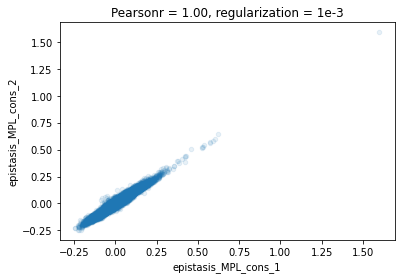

Text(0.5, 1.0, 'Pearsonr = 0.58, regularization = 1e-3')

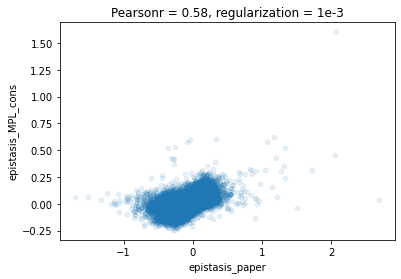

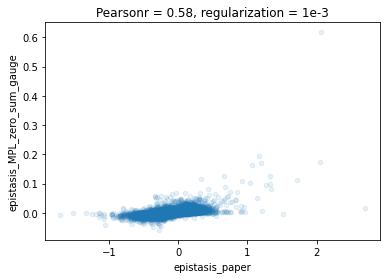

In [44]:
df.plot.scatter(x='epistasis_MPL_cons_1', y='epistasis_MPL_cons_2', alpha=0.1)
pr = st.pearsonr(df['epistasis_MPL_cons_1'], df['epistasis_MPL_cons_1'])[0]
plt.title('Pearsonr = %.2f, regularization = 1e-3'%pr)
plt.show()
df.plot.scatter(x='epistasis_paper', y='epistasis_MPL_cons_1', alpha=0.1)
plt.ylabel('epistasis_MPL_cons')
pr = st.pearsonr(df.dropna()['epistasis_paper'], df.dropna()['epistasis_MPL_transfer'])[0]
plt.title('Pearsonr = %.2f, regularization = 1e-3'%pr)

df_merge.plot.scatter(x='epistasis_paper', y='epistasis_MPL_transfer', alpha=0.1)
pr = st.pearsonr(df_merge.dropna()['epistasis_paper'], df_merge.dropna()['epistasis_MPL_transfer'])[0]
plt.ylabel('epistasis_MPL_zero_sum_gauge')

plt.title('Pearsonr = %.2f, regularization = 1e-3'%pr)

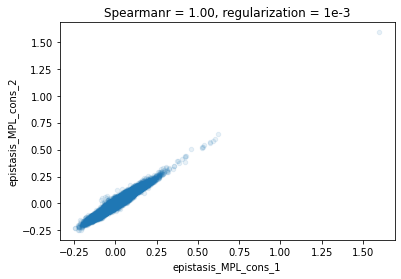

Text(0.5, 1.0, 'Pearsonr = 0.53, Spearmanr = 0.57, regularization = 1e-3')

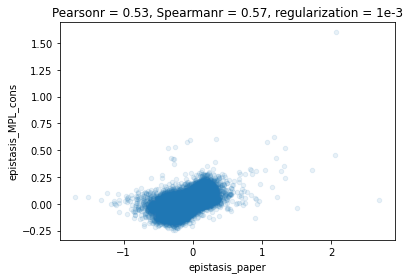

In [111]:
import scipy.stats as st
df_merged.plot.scatter(x='epistasis_MPL_cons_1', y='epistasis_MPL_cons_2', alpha=0.1)
pr = st.spearmanr(df_merged['epistasis_MPL_cons_1'], df_merged['epistasis_MPL_cons_1'])[0]
plt.title('Spearmanr = %.2f, regularization = 1e-3'%pr)
plt.show()
df_merged.plot.scatter(x='epistasis_paper', y='epistasis_MPL_cons_1', alpha=0.1)
plt.ylabel('epistasis_MPL_cons')
pr = st.spearmanr(df_merged.dropna()['epistasis_paper'], df_merged.dropna()['epistasis_MPL_cons_1'])[0]
pr1 = st.pearsonr(df_merged.dropna()['epistasis_paper'], df_merged.dropna()['epistasis_MPL_cons_1'])[0]
# plt.title('Spearmanr = %.2f, regularization = 1e-3'%pr)
plt.title('Pearsonr = %.2f, Spearmanr = %.2f, regularization = 1e-3'%(pr1,pr))

# df_merged.plot.scatter(x='epistasis_paper', y='epistasis_MPL_transfer', alpha=0.1)
# pr = st.spearmanr(df_merged.dropna()['epistasis_paper'], df_merged.dropna()['epistasis_MPL_transfer'])[0]
# pr1 = st.pearsonr(df_merged.dropna()['epistasis_paper'], df_merged.dropna()['epistasis_MPL_transfer'])[0]
# plt.ylabel('epistasis_MPL_zero_sum_gauge')

# plt.title('Pearsonr = %.2f, Spearmanr = %.2f, regularization = 1e-3'%(pr1,pr))

In [112]:
df_merged

,Unnamed: 0,mu2_single,selection_coefficients_2,mu1_single,selection_coefficients_1,0,1,2,3,mutant1,...,site_1_y,AA_1_y,site_2_y,AA_2_y,epistasis_MPL_transfer,epistasis_MPL_cons,epistasis_MPL_cons_2,epistasis_MPL_cons_1,distance,log_dist
0,0,35_S_35_S,0.012913,34_T_34_T,0.020034,0.000020,0.000031,0.000007,4.335804e-06,Pro33Thr,...,33,T,34,S,0.010248,0.0,0.145763,0.155797,3.823838,1.341255
1,1,35_S_35_S,0.012913,34_S_34_S,0.027446,0.000033,0.000031,0.000007,2.167902e-06,Pro33Ser,...,33,S,34,S,0.009628,0.0,0.165974,0.177629,3.823838,1.341255
2,2,35_S_35_S,0.012913,34_R_34_R,0.032836,0.000034,0.000020,0.000017,8.671607e-06,Pro33Arg,...,33,R,34,S,0.002333,0.0,0.131081,0.119203,3.823838,1.341255
3,3,35_S_35_S,0.012913,34_Q_34_Q,0.018224,0.000025,0.000027,0.000011,4.877779e-06,Pro33Gln,...,33,Q,34,S,0.009492,0.0,0.136401,0.138648,3.823838,1.341255
4,4,35_S_35_S,0.012913,34_L_34_L,0.024075,0.000030,0.000020,0.000019,5.419755e-07,Pro33Leu,...,33,L,34,S,0.006648,0.0,0.177694,0.182529,3.823838,1.341255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19152,19152,11_I_11_I,0.010342,3_I_3_I,-0.009393,0.000082,0.000069,0.000078,8.346422e-05,Val2Ile,...,2,I,10,I,-0.009006,0.0,-0.023691,-0.056455,14.800216,2.694642
19153,19153,11_I_11_I,0.010342,3_G_3_G,-0.021934,0.000046,0.000066,0.000065,6.774693e-05,Val2Gly,...,2,G,10,I,-0.014065,0.0,-0.056506,-0.087861,14.800216,2.694642
19154,19154,11_I_11_I,0.010342,3_F_3_F,-0.007910,0.000063,0.000058,0.000069,6.232718e-05,Val2Phe,...,2,F,10,I,0.009579,0.0,-0.008294,-0.031612,14.800216,2.694642
19155,19155,11_I_11_I,0.010342,3_A_3_A,-0.016722,0.000053,0.000038,0.000048,4.335804e-05,Val2Ala,...,2,A,10,I,-0.006237,0.0,-0.031928,-0.062960,14.800216,2.694642


In [48]:
df.to_csv('merge_score.csv')

In [19]:
df_single = df_index.copy()
df_single = df_single.loc[(df_single['site_1']==df_single['site_2']) & (df_single['AA_1']==df_single['AA_2'])]
df_single

a_sites = df_single['site_1']
a_AAs = df_single['AA_1']

partner_score=[]
for a_site, a_AA in zip(a_sites, a_AAs):
    print(a_site, a_AA)
    a_epistasis = df_index.loc[((df_index['site_1']==a_site) & (df_index['AA_1']==a_AA)) & ((df_index['site_2']==a_site) & (df_index['AA_2']==a_AA))]['selection_coefficients'].values[0]
    df_partner = df_index.loc[((df_index['site_1']==a_site) & (df_index['AA_1']==a_AA)) | ((df_index['site_2']==a_site) & (df_index['AA_2']==a_AA))]
#     df_partner = df_partner.loc[~df_partner['all_variant'].str.contains(a_site+'_'+ a_AA+'_'+a_site+'_'+ a_AA)]
    
    site1 = df_partner['site_1'].tolist()
    site2 = df_partner['site_2'].tolist()
    AA1 = df_partner['AA_1'].tolist()
    AA2 = df_partner['AA_2'].tolist()
    b_epistasis_list=[]
    for i in range(len(AA1)):
        if site1[i]==a_site:
            b_site = site2[i]
            b_aa = AA2[i]
        else:
            b_site = site1[i]
            b_aa = AA1[i]       
        b_epistasis = df_index.loc[((df_index['site_1']==b_site) & (df_index['AA_1']==b_aa)) & ((df_index['site_2']==b_site) & (df_index['AA_2']==b_aa))]['selection_coefficients'].values[0]
        b_epistasis_list.append(b_epistasis)
        #     partner_selection = df_partner['selection_coefficients']
    df_partner['b_epistasis'] = b_epistasis_list
    df_partner['partner_score'] = (df_partner['selection_coefficients']-a_epistasis*df_partner['b_epistasis'])/df_partner['b_epistasis']
    partner_score.append(df_partner['partner_score'].mean())
df_single['partner_score'] = partner_score


34 Y


/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


34 V
34 T
34 S
34 R
34 Q
34 P
34 N
34 M
34 L
34 I
34 H
34 G
34 F
34 D
34 C
34 A
34 *
33 W
33 V
33 T
33 S
33 R
33 Q
33 P
33 M
33 L
33 K
33 H
33 G
33 F
33 A
33 *
32 Y
32 V
32 T
32 S
32 R
32 Q
32 P
32 N
32 L
32 K
32 I
32 H
32 G
32 F
32 E
32 D
32 C
32 A
32 *
31 Y
31 W
31 V
31 T
31 S
31 R
31 Q
31 P
31 N
31 M
31 L
31 K
31 H
31 G
31 E
31 D
31 A
31 *
30 Y
30 W
30 S
30 R
30 Q
30 L
30 K
30 G
30 F
30 E
30 C
30 *
29 W
29 V
29 T
29 S
29 R
29 Q
29 P
29 N
29 M
29 L
29 K
29 I
29 G
29 E
29 A
28 Y
28 V
28 T
28 S
28 R
28 P
28 N
28 L
28 K
28 I
28 H
28 G
28 F
28 C
28 A
27 Y
27 V
27 T
27 S
27 R
27 P
27 N
27 M
27 L
27 K
27 I
27 H
27 G
27 F
27 D
27 C
27 A
27 *
26 Y
26 W
26 V
26 T
26 S
26 R
26 Q
26 P
26 N
26 M
26 L
26 K
26 H
26 G
26 E
26 D
26 A
26 *
25 Y
25 V
25 T
25 S
25 R
25 Q
25 P
25 N
25 L
25 K
25 I
25 H
25 G
25 F
25 E
24 V
24 L
24 D
24 A
23 R
23 L
23 A
23 *
22 V
22 T
22 K
22 D
22 *
21 T
21 H
19 T
19 S
19 R
19 Q
19 N
19 L
19 H
19 G
19 F
19 D
19 C
19 *
18 Y
18 W
18 V
18 T
18 S
18 R
18 Q
18 P
18 N
18 L
18 I


In [123]:
from Bio.PDB import PDBParser

# create parser
parser = PDBParser()

# read structure from file
structure = parser.get_structure('1k9q', '1k9q.pdb')

def dis_model(model_i):
    model = structure[model_i]
    chain = model['A']

    # this example uses only the first residue of a single chain.
    # it is easy to extend this to multiple chains and residues.
    site_1 = []
    site_2 = []
    distance_ = []
    for residue1 in chain:
        for residue2 in chain:
            if residue1 != residue2:
                if residue1.get_full_id()[3][1]-9>0 and residue2.get_full_id()[3][1]-9>0 and residue1.get_full_id()[3][1]-9<35 and residue2.get_full_id()[3][1]-9<35 and residue2.get_full_id()[3][1]>residue1.get_full_id()[3][1]:
                    site_1.append(residue1.get_full_id()[3][1]-9)
                    site_2.append(residue2.get_full_id()[3][1]-9)
                    # compute distance between CA atoms
                    try:
                        distance = residue1['CA'] - residue2['CA']
                    except KeyError:
                        ## no CA atom, e.g. for H_NAG
                        continue
                    distance_.append(distance)
    return distance_

df_distance = pd.DataFrame()
df_distance['site_1_y'] = site_1
df_distance['site_2_y'] = site_2

for i in range(20):
    df_distance['distance_'+str(i)] = dis_model(i)



,site_1_y,site_2_y,distance_0,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,distance_7,distance_8,distance_9,distance_10,distance_11,distance_12,distance_13,distance_14,distance_15,distance_16,distance_17,distance_18,distance_19
0,1,2,3.824948,3.826278,3.825091,3.823818,3.822845,3.824481,3.824722,3.824133,3.823356,3.824363,3.824629,3.823561,3.824710,3.823831,3.823547,3.824445,3.826215,3.823984,3.834919,3.827281
1,1,3,7.038612,6.716002,6.974946,6.347547,6.896030,6.162024,6.896895,6.920156,6.706114,7.017968,6.173958,6.273227,6.571287,6.759963,6.562328,6.821269,6.445107,6.752842,5.958313,6.087059
2,1,4,10.131727,9.078335,10.193382,9.573298,8.963236,9.587696,10.291893,10.227581,9.567126,9.826061,9.064250,9.103836,10.147946,10.246559,9.771586,9.031629,9.642034,9.966204,8.747035,8.711029
3,1,5,13.046857,12.732935,13.883781,11.175123,12.636315,11.538848,13.100956,11.980033,12.889470,12.772831,10.965586,10.811431,11.800274,13.781222,11.346128,12.693716,13.010208,13.735582,12.205050,12.266712
4,1,6,16.014847,14.900593,16.306698,13.293196,14.976763,14.103485,15.903941,14.635831,15.826015,15.736534,12.194688,11.911786,13.837975,16.283543,13.423670,14.947189,15.550195,16.057295,14.638237,14.352395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,31,33,6.462316,6.288900,6.467546,6.658671,6.443269,6.372148,5.906998,6.898389,6.451128,6.050427,6.435463,6.113420,6.840838,6.471778,6.591622,6.257444,6.637982,6.437463,6.178844,6.411450
557,31,34,6.460209,8.733000,6.246078,9.074659,8.756266,8.442452,8.567687,8.804723,8.353269,8.629813,8.492867,9.199288,8.847178,6.329618,8.457711,8.275073,9.094283,6.413366,8.604850,8.744126
558,32,33,3.821015,3.818938,3.819870,3.814759,3.819282,3.815386,3.820725,3.814790,3.818094,3.821708,3.815104,3.815611,3.817448,3.820438,3.821959,3.819164,3.821649,3.818337,3.823457,3.814338
559,32,34,5.661690,5.471193,5.384982,5.652874,5.346591,5.377401,5.483799,5.391632,6.625716,5.497800,5.399240,6.509787,5.323910,5.494754,5.478263,5.500454,5.357149,5.582661,5.484227,5.611843


<AxesSubplot:>

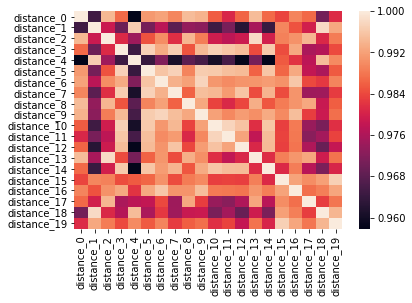

In [126]:
import seaborn as sns

sns.heatmap(df_distance.drop(['site_1_y', 'site_2_y'],axis=1).corr())

In [70]:
df_merged

,mu2_single,selection_coefficients_2,mu1_single,selection_coefficients_1,0,1,2,3,mutant1,mutant2,NSCOR_ratio_1,NSCOR_ratio_2,NSCOR_ratio_3,projected_0,projected_1,projected_2,projected_3,slope_v,function_score,predicted_score,site_1_x,site_2_x,AA_1_x,AA_2_x,all_variant,epistasis_paper,state_1,state_2,mat_index,epistasis_MPL,site_1_y,AA_1_y,site_2_y,AA_2_y,epistasis_MPL_transfer,epistasis_MPL_cons,epistasis_MPL_cons_2,epistasis_MPL_cons_1,distance
0,35_S_35_S,0.012913,34_T_34_T,0.020034,0.000020,0.000031,0.000007,4.335804e-06,Pro33Thr,Arg34Ser,1.570969,0.230539,0.581999,0,0.651654,-1.465264,-2.246177,-0.885545,0.476810,0.287980,34,35,T,S,34_T_35_S,0.188829,689,709,38144,0.010507,33,T,34,S,0.010248,0.0,0.145763,0.155797,3.823838
1,35_S_35_S,0.012913,34_S_34_S,0.027446,0.000033,0.000031,0.000007,2.167902e-06,Pro33Ser,Arg34Ser,0.937506,0.230539,0.287805,0,-0.093100,-2.210018,-4.006852,-1.413747,0.330628,0.290811,34,35,S,S,34_S_35_S,0.039818,688,709,38137,0.009983,33,S,34,S,0.009628,0.0,0.165974,0.177629,3.823838
2,35_S_35_S,0.012913,34_R_34_R,0.032836,0.000034,0.000020,0.000017,8.671607e-06,Pro33Arg,Arg34Ser,0.570753,0.829437,0.516622,0,-0.809060,-1.078856,-2.031674,-0.636482,0.566657,0.368164,34,35,R,S,34_R_35_S,0.198493,687,709,38129,0.002757,33,R,34,S,0.002333,0.0,0.131081,0.119203,3.823838
3,35_S_35_S,0.012913,34_Q_34_Q,0.018224,0.000025,0.000027,0.000011,4.877779e-06,Pro33Gln,Arg34Ser,1.107283,0.396138,0.434902,0,0.147024,-1.188899,-2.390137,-0.850633,0.488489,0.302949,34,35,Q,S,34_Q_35_S,0.185540,686,709,38121,0.009727,33,Q,34,S,0.009492,0.0,0.136401,0.138648,3.823838
4,35_S_35_S,0.012913,34_L_34_L,0.024075,0.000030,0.000020,0.000019,5.419755e-07,Pro33Leu,Arg34Ser,0.657119,0.923318,0.023032,0,-0.605774,-0.720875,-6.161110,-1.859843,0.242690,0.274872,34,35,L,S,34_L_35_S,-0.032182,682,709,38093,0.006959,33,L,34,S,0.006648,0.0,0.177694,0.182529,3.823838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19152,11_I_11_I,0.010342,3_I_3_I,-0.009393,0.000082,0.000069,0.000078,8.346422e-05,Val2Ile,Met10Ile,0.827955,1.137079,1.072320,0,-0.272376,-0.087044,0.013692,0.022641,0.894821,NaN,3,11,I,I,3_I_11_I,NaN,29,197,3579,-0.009104,2,I,10,I,-0.009006,0.0,-0.023691,-0.056455,14.800216
19153,11_I_11_I,0.010342,3_G_3_G,-0.021934,0.000046,0.000066,0.000065,6.774693e-05,Val2Gly,Met10Ile,1.451072,0.975474,1.044302,0,0.537119,0.501295,0.563834,0.165568,0.988010,NaN,3,11,G,I,3_G_11_I,NaN,27,197,3328,-0.014292,2,G,10,I,-0.014065,0.0,-0.056506,-0.087861,14.800216
19154,11_I_11_I,0.010342,3_F_3_F,-0.007910,0.000063,0.000058,0.000069,6.232718e-05,Val2Phe,Met10Ile,0.925118,1.184479,0.907996,0,-0.112290,0.131962,-0.007279,0.022241,0.894573,NaN,3,11,F,I,3_F_11_I,NaN,26,197,3107,0.009497,2,F,10,I,0.009579,0.0,-0.008294,-0.031612,14.800216
19155,11_I_11_I,0.010342,3_A_3_A,-0.016722,0.000053,0.000038,0.000048,4.335804e-05,Val2Ala,Met10Ile,0.705213,1.272765,0.898822,0,-0.503868,-0.155902,-0.309795,-0.058142,0.846093,NaN,3,11,A,I,3_A_11_I,NaN,22,197,2632,-0.006410,2,A,10,I,-0.006237,0.0,-0.031928,-0.062960,14.800216


<AxesSubplot:xlabel='epistasis_MPL_cons_1', ylabel='distance'>

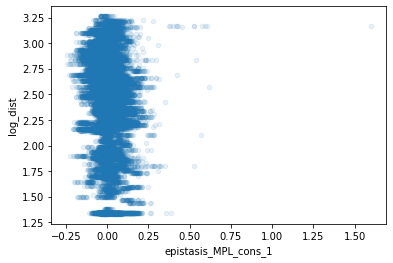

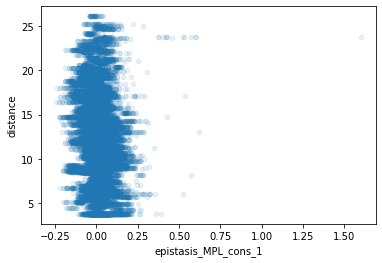

In [72]:
df_merged = pd.merge(df, df_distance, on=['site_1_y', 'site_2_y'])
df_merged['log_dist'] = np.log(df_merged['distance'])
df_merged.plot.scatter('epistasis_MPL_cons_1', 'log_dist', alpha=0.1)
df_merged.plot.scatter('epistasis_MPL_cons_1', 'distance', alpha=0.1)


In [163]:
df_merged.sort_values('epistasis_MPL_cons_1').iloc[-site_i:]

,mu2_single,selection_coefficients_2,mu1_single,selection_coefficients_1,0,1,2,3,mutant1,mutant2,NSCOR_ratio_1,NSCOR_ratio_2,NSCOR_ratio_3,projected_0,projected_1,projected_2,projected_3,slope_v,function_score,predicted_score,site_1_x,site_2_x,AA_1_x,AA_2_x,all_variant,epistasis_paper,state_1,state_2,mat_index,epistasis_MPL,site_1_y,AA_1_y,site_2_y,AA_2_y,epistasis_MPL_transfer,epistasis_MPL_cons,epistasis_MPL_cons_2,epistasis_MPL_cons_1,distance,log_dist
18267,22_R_22_R,0.012177,3_D_3_D,-0.022180,1.200273e-05,0.000013,0.000056,0.000068,Val2Asp,Leu21Arg,1.057126,4.443867,1.229223,0,0.080147,2.231962,2.529710,0.974094,1.730423,NaN,3,22,D,R,3_D_22_R,NaN,24,435,2942,0.006619,2,D,21,R,0.006889,0.0,0.283493,0.273511,17.088579,2.838410
4973,31_C_31_C,0.033756,17_D_17_D,0.013808,5.658431e-05,0.000051,0.000172,0.000080,Gly16Asp,Trp30Cys,0.891833,3.440511,0.458627,0,-0.165154,1.617469,0.492863,0.326121,1.104315,0.349692,17,31,D,C,17_D_31_C,0.754623,318,611,26633,0.073752,16,D,30,C,0.073286,0.0,0.290571,0.273679,10.411454,2.342906
6627,29_A_29_A,0.009328,20_*_20_*,0.035537,3.600820e-05,0.000035,0.000011,0.000005,Tyr19Ter,Thr28Ala,0.966215,0.308822,0.434902,0,-0.049584,-1.744735,-2.945973,-1.053307,0.424467,0.214561,20,29,*,A,20_*_29_A,0.209906,378,568,29938,0.002306,19,*,28,A,0.001974,0.0,0.265084,0.273829,6.052414,1.800457
4469,32_H_32_H,-0.009593,3_Y_3_Y,-0.007851,8.573381e-07,0.000012,0.000007,0.000014,Val2Tyr,Gln31His,13.966441,0.633140,1.905868,0,3.803893,3.144488,4.074936,1.156540,1.963694,1.545919,3,32,Y,H,3_Y_32_H,0.417775,41,637,4721,-0.002883,2,Y,31,H,-0.002958,0.0,0.292053,0.275442,13.051066,2.568870
6606,29_S_29_S,0.032018,20_*_20_*,0.035537,1.200273e-04,0.000096,0.000061,0.000025,Tyr19Ter,Thr28Ser,0.793485,0.631358,0.403700,0,-0.333726,-0.997197,-2.305842,-0.758100,0.520847,0.375413,20,29,*,S,20_*_29_S,0.145433,378,583,29943,0.016645,19,*,28,S,0.015507,0.0,0.270918,0.275619,6.052414,1.800457
2057,34_T_34_T,0.020034,21_S_21_S,0.005486,2.314813e-05,0.000007,0.000013,0.000002,Phe20Ser,Pro33Thr,0.296170,1.768250,0.119695,0,-1.755505,-0.933182,-3.995746,-1.116492,0.406278,0.249578,21,34,S,T,21_S_34_T,0.156700,415,689,31501,0.002284,20,S,33,T,0.002174,0.0,0.284873,0.277867,8.183858,2.102164
11985,23_D_23_D,0.012126,6_T_6_T,0.013806,3.000683e-05,0.000026,0.000184,0.000066,Pro5Thr,Asn22Asp,0.875304,7.048134,0.353182,0,-0.192144,2.625098,1.123581,0.618798,1.352687,0.496125,6,23,T,D,6_T_23_D,0.856563,101,444,10336,0.070283,5,T,22,D,0.070116,0.0,0.260052,0.277917,8.886145,2.184493
9198,26_E_26_E,-0.013928,16_T_16_T,0.004090,1.543209e-05,0.000042,0.000074,0.000193,Ser15Thr,Asp25Glu,2.794530,1.768250,2.611931,0,1.482605,2.304928,3.690044,1.189246,2.008719,1.328066,16,26,T,E,16_T_26_E,0.680653,311,508,26102,0.087000,15,T,25,E,0.087057,0.0,0.315549,0.279534,25.026199,3.219923
4470,32_H_32_H,-0.009593,3_L_3_L,-0.013827,2.572014e-05,0.000075,0.000126,0.000233,Val2Leu,Gln31His,2.978371,1.692880,1.853951,0,1.574524,2.334004,3.224607,1.043330,1.815491,1.934757,3,32,L,H,3_L_32_H,-0.119266,31,637,3927,-0.002588,2,L,31,H,-0.002720,0.0,0.301320,0.280204,13.051066,2.568870
6607,29_P_29_P,0.008552,20_S_20_S,0.015553,2.743482e-05,0.000028,0.000022,0.000002,Tyr19Ser,Thr28Pro,1.040080,0.777281,0.067161,0,0.056694,-0.306798,-4.203038,-1.297261,0.358431,0.234293,20,29,S,P,20_S_29_P,0.124139,394,580,30541,0.002931,19,S,28,P,0.002798,0.0,0.265275,0.282211,6.052414,1.800457


In [241]:
df_merged.to_csv('merged_table.csv')
df_distance.to_csv('distance.csv')


In [2]:
df_merged = pd.read_csv('merged_table.csv')
df_merged.loc[(df_merged['site_1_y']==df_merged['site_2_y'])&(df_merged['AA_1_y']==df_merged['AA_2_y'])]

,Unnamed: 0,mu2_single,selection_coefficients_2,mu1_single,selection_coefficients_1,0,1,2,3,mutant1,...,site_1_y,AA_1_y,site_2_y,AA_2_y,epistasis_MPL_transfer,epistasis_MPL_cons,epistasis_MPL_cons_2,epistasis_MPL_cons_1,distance,log_dist


In [3]:
df_epistasis = df_merged.dropna().copy()
df_ = df_epistasis[~((df_epistasis["site_1_y"]==14)&(df_epistasis["site_2_y"]==24))]
df_[(df["site_1_y"]==14)&(df["site_1_y"]==24)]

NameError: name 'df' is not defined

Text(0, 0.5, 'Frequency')

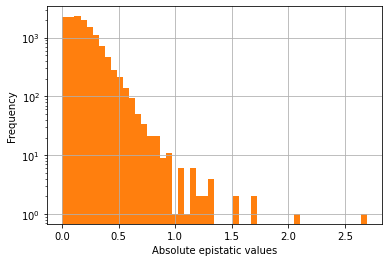

In [4]:
df_epistasis = df_merged.dropna().copy()
df_epistasis = df_epistasis[~((df_epistasis["site_1_y"]==14)&(df_epistasis["site_2_y"]==24))]
df_epistasis['epistasis_MPL_absolute'] = np.abs(df_epistasis['epistasis_MPL_cons_1'])
df_epistasis['epistasis_MPL_absolute'].hist(bins=100)
df_epistasis['epistasis_paper_absolute'] = np.abs(df_epistasis['epistasis_paper'])
df_epistasis['epistasis_paper_absolute'].hist(bins=50)
plt.yscale('log')
plt.xlabel('Absolute epistatic values')
plt.ylabel('Frequency')
# plt.xscale('log')

/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


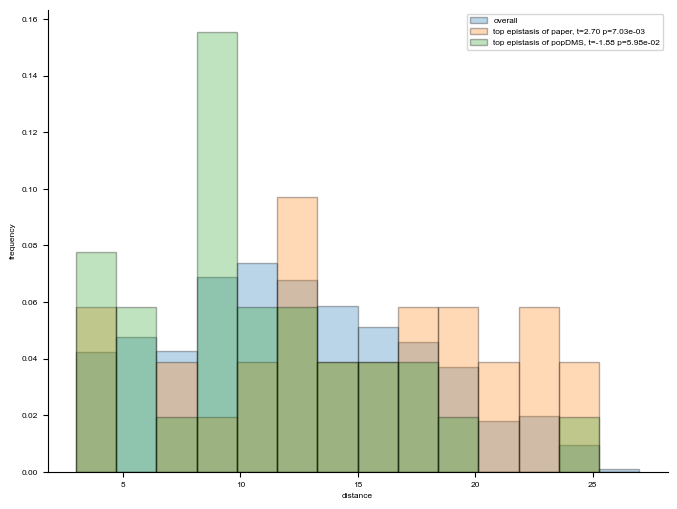

In [49]:
import matplotlib as mpl
import scipy.stats as st
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
df_merged = pd.read_csv('merged_table.csv')
df_merged.loc[(df_merged['site_1_y']==df_merged['site_2_y'])&(df_merged['AA_1_y']==df_merged['AA_2_y'])]
df_epistasis = df_merged.dropna().copy()
# df_epistasis = df_epistasis[~((df_epistasis["site_1_y"]==14)&(df_epistasis["site_2_y"]==24))]
df_epistasis['epistasis_MPL_absolute'] = np.abs(df_epistasis['epistasis_MPL_cons_1'])
# df_epistasis['epistasis_MPL_absolute'].hist(bins=100)
df_epistasis['epistasis_paper_absolute'] = np.abs(df_epistasis['epistasis_paper'])
# df_epistasis['epistasis_paper_absolute'].hist(bins=50)

df_epistasis = df_epistasis[['site_1_y','site_2_y','epistasis_MPL_cons_1','epistasis_MPL_absolute', 'epistasis_paper','epistasis_paper_absolute', 'distance']].sort_values('epistasis_MPL_absolute')
df_unique = df_epistasis[['site_1_y','site_2_y','distance','epistasis_MPL_absolute','epistasis_paper_absolute']]

# df_unique.groupby(['site_1_y','site_2_y']).sum('')
df_MPL = df_unique.groupby(['site_1_y','site_2_y','distance'])['epistasis_MPL_absolute','epistasis_paper_absolute'].agg('sum').reset_index().sort_values('epistasis_MPL_absolute')
df_func = df_unique.groupby(['site_1_y','site_2_y','distance'])['epistasis_MPL_absolute','epistasis_paper_absolute'].agg('sum').reset_index().sort_values('epistasis_paper_absolute')

t_test_2=df_unique['distance'].tolist()
t_test_1=df_MPL['distance'].iloc[-30:].tolist()
t_test_3=df_func['distance'].iloc[-30:].tolist()

bins = np.linspace(3, 27, 15)
x=st.ttest_ind(a=t_test_1, b=t_test_2, equal_var=True)
y=st.ttest_ind(a=t_test_3, b=t_test_2, equal_var=True)
plt.figure(figsize=(8,6))
plt.hist(t_test_2, bins, label='overall', density=True, alpha=0.3, edgecolor='k')
plt.hist(t_test_3, bins, label='top epistasis of paper, t=%.2f p=%.2e'%(y[0],y[1]), density=True, alpha=0.3, edgecolor='k')
plt.hist(t_test_1, bins, label='top epistasis of popDMS, t=%.2f p=%.2e'%(x[0],x[1]), density=True, alpha=0.3, edgecolor='k')
# plt.yscale('log')
plt.xlabel('distance')
plt.ylabel('frequency')


# plt.title('MPL t=%.2f p=%.2e; paper ' %(x[0],x[1],y[0],y[1]))
plt.legend()
plt.show()

/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:63: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:114: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:115: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


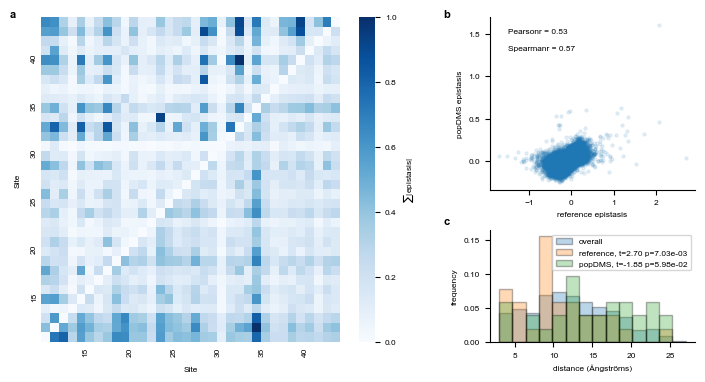

In [100]:
import matplotlib
import seaborn as sns
df_merged = pd.read_csv('merged_table.csv')
df_merged.loc[(df_merged['site_1_y']==df_merged['site_2_y'])&(df_merged['AA_1_y']==df_merged['AA_2_y'])]
matplotlib.rc_file_defaults()
matplotlib.rc('text', usetex=False)

TEXT_FONTSIZE = 6
SERIAL_FONTSIZE = 8
TEXT_FONT = 'Arial'
FIG_DPI = 400
CM = 1/2.54
SERIAL_FONT = {
    'family': TEXT_FONT,
    'size': SERIAL_FONTSIZE,
    'weight': 'bold'
}

FONT = {
    'family': TEXT_FONT,
    'weight': 'normal',
    'size': TEXT_FONTSIZE
}

REGION_FONT = {
    'family': TEXT_FONT,
    'weight': 'bold',
    'size': TEXT_FONTSIZE
}

FIG2_SIZE_X         = 20
FIG2_SIZE_Y         = 15
FIG2_BOX_ARG         = dict(left = 0.12, right = 0.95, bottom = 0.3, top = 0.85)
FIG2_B_REPLICATE_NUM = 3
# FIG2_B_SAMPLE_DIR    = './outputs/virus_protein/HIVEnv/BF520/selection_coefficients/'
FIG2_B_SCATTER_SIZE  = 7
FIG2_B_SCATTER_ALPHA = 0.4
FIG2_B_CORR_DIGIT    = 2

FIG2_C_REPLICATE_NUM = 3
# FIG2_C_SAMPLE_DIR    = './data/virus_protein/HIVEnv/BF520/pref/'
FIG2_C_SCATTER_SIZE  = 7
FIG2_C_SCATTER_ALPHA = 0.4
FIG2_C_CORR_DIGIT    = 2

matplotlib.rc('font', **FONT)
PERFORMANCE_FIG_SIZE = (FIG2_SIZE_X * CM, FIG2_SIZE_Y * CM)
fig = plt.figure(figsize = PERFORMANCE_FIG_SIZE)
# fig.text(0.0, 0.88, s = 'a', **SERIAL_FONT, transform = fig.transFigure)
# fig.text(0.0, 0.56, s = 'b', **SERIAL_FONT, transform = fig.transFigure)
# fig.text(0.5, 0.56, s = 'c', **SERIAL_FONT, transform = fig.transFigure)
gs  = fig.add_gridspec(11, 12, wspace = 1.3, **FIG2_BOX_ARG)
gs.update(wspace=0.5, hspace=0.5)
ax  = fig.add_subplot(gs[:11,:7])
ax2 = fig.add_subplot(gs[:6,8:])
ax3 = fig.add_subplot(gs[7:,8:])


df_new = df_merged.copy()[['site_1_y','site_2_y','epistasis_paper','epistasis_MPL_cons_1']].dropna()
df_new['epistasis_paper'] = np.abs(df_new['epistasis_paper'])
df_new['epistasis_MPL_cons_1'] = np.abs(df_new['epistasis_MPL_cons_1'])

df_new=df_new.groupby(['site_1_y', 'site_2_y'])['epistasis_paper', 'epistasis_MPL_cons_1'].agg('sum').reset_index()
# df_new['epistasis_paper']=(df_new['epistasis_paper']-df_new['epistasis_paper'].mean())/df_new['epistasis_paper'].std()
# df_new['epistasis_MPL_cons_1']=(df_new['epistasis_MPL_cons_1']-df_new['epistasis_MPL_cons_1'].mean())/df_new['epistasis_MPL_cons_1'].std()

df_new['epistasis_paper']=(df_new['epistasis_paper']-df_new['epistasis_paper'].min())/(df_new['epistasis_paper'].max()-df_new['epistasis_paper'].min())
df_new['epistasis_MPL_cons_1']=(df_new['epistasis_MPL_cons_1']-df_new['epistasis_MPL_cons_1'].min())/(df_new['epistasis_MPL_cons_1'].max()-df_new['epistasis_MPL_cons_1'].min())

x_list = [i+2 for i in range(34)]
df_heatmap = pd.DataFrame(columns=x_list)
df_heatmap
for i in (x_list):
    df_heatmap[i]=np.zeros(36)
for index, row in df_new.iterrows():
    df_heatmap.loc[row['site_1_y']+1,row['site_2_y']+1]=row['epistasis_paper']
    df_heatmap.loc[row['site_2_y']+1,row['site_1_y']+1]=row['epistasis_MPL_cons_1']
df_heatmap=df_heatmap.iloc[2:]
df_heatmap

SEQUENCE       = "DVPLPAGWEMAKTSSGQRYFLNHIDQTTTWQDPR"
sns.heatmap(df_heatmap,cmap='Blues',cbar_kws={'label': r'$\sum$|epistasis|'},ax=ax)
ax.set_xlabel('site',fontsize = TEXT_FONTSIZE)
ax.set_ylabel('site',fontsize = TEXT_FONTSIZE)
# plt.title('lower left MPL, upper right paper')
ax.set_xlabel('Site', labelpad = 7)
ax.set_ylabel('Site', labelpad = 7)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([i for i in range(1,len(SEQUENCE)) if (i)%5 == 0])
ax.set_xticklabels([i + 10 for i in range(1,len(SEQUENCE)) if (i)%5 == 0])
ax.set_yticks([i for i in range(1,len(SEQUENCE)) if (i)%5 == 0])
ax.set_yticklabels([i + 10 for i in range(1,len(SEQUENCE)) if (i)%5 == 0])
ax.tick_params(axis = u'both', which = u'both', length = 0)
ax.invert_yaxis()


df_merged = pd.read_csv('merged_table.csv')
df_merged.loc[(df_merged['site_1_y']==df_merged['site_2_y'])&(df_merged['AA_1_y']==df_merged['AA_2_y'])]
df_epistasis = df_merged.dropna().copy()
# df_epistasis = df_epistasis[~((df_epistasis["site_1_y"]==14)&(df_epistasis["site_2_y"]==24))]
df_epistasis['epistasis_MPL_absolute'] = np.abs(df_epistasis['epistasis_MPL_cons_1'])
# df_epistasis['epistasis_MPL_absolute'].hist(bins=100)
df_epistasis['epistasis_paper_absolute'] = np.abs(df_epistasis['epistasis_paper'])
# df_epistasis['epistasis_paper_absolute'].hist(bins=50)

df_epistasis = df_epistasis[['site_1_y','site_2_y','epistasis_MPL_cons_1','epistasis_MPL_absolute', 'epistasis_paper','epistasis_paper_absolute', 'distance']].sort_values('epistasis_MPL_absolute')
df_unique = df_epistasis[['site_1_y','site_2_y','distance','epistasis_MPL_absolute','epistasis_paper_absolute']]

# df_unique.groupby(['site_1_y','site_2_y']).sum('')
df_MPL = df_unique.groupby(['site_1_y','site_2_y','distance'])['epistasis_MPL_absolute','epistasis_paper_absolute'].agg('sum').reset_index().sort_values('epistasis_MPL_absolute')
df_func = df_unique.groupby(['site_1_y','site_2_y','distance'])['epistasis_MPL_absolute','epistasis_paper_absolute'].agg('sum').reset_index().sort_values('epistasis_paper_absolute')

t_test_2=df_unique['distance'].tolist()
t_test_1=df_MPL['distance'].iloc[-30:].tolist()
t_test_3=df_func['distance'].iloc[-30:].tolist()

bins = np.linspace(3, 27, 15)
x=st.ttest_ind(a=t_test_1, b=t_test_2, equal_var=True)
y=st.ttest_ind(a=t_test_3, b=t_test_2, equal_var=True)
ax3.hist(t_test_2, bins, label='overall', density=True, alpha=0.3, edgecolor='k')
# ax3.hist(t_test_1, bins, label='top epistasis of paper, t=%.2f p=%.2e'%(y[0],y[1]), density=True, alpha=0.3, edgecolor='k')
# ax3.hist(t_test_3, bins, label='top epistasis of popDMS, t=%.2f p=%.2e'%(x[0],x[1]), density=True, alpha=0.3, edgecolor='k')
ax3.hist(t_test_1, bins, label='reference, t=%.2f p=%.2e'%(y[0],y[1]), density=True, alpha=0.3, edgecolor='k')
ax3.hist(t_test_3, bins, label='popDMS, t=%.2f p=%.2e'%(x[0],x[1]), density=True, alpha=0.3, edgecolor='k')
ax3.set_xlabel('distance (Ångströms)', fontsize = TEXT_FONTSIZE)
ax3.set_ylabel('frequency',fontsize = TEXT_FONTSIZE)


ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.legend()
# plt.show()


df_epistasis.plot.scatter(x='epistasis_paper', y='epistasis_MPL_cons_1', alpha=0.1, ax=ax2, s=5)
pr = st.pearsonr(df_epistasis.dropna()['epistasis_paper'], df_epistasis.dropna()['epistasis_MPL_cons_1'])[0]
sr = st.spearmanr(df_epistasis.dropna()['epistasis_paper'], df_epistasis.dropna()['epistasis_MPL_cons_1'])[0]

ax2.set_ylabel('popDMS epistasis')
ax2.set_xlabel('reference epistasis')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.text(-1.5, 1.5, s = 'Pearsonr = %.2f'%pr)
ax2.text(-1.5, 1.3, s = 'Spearmanr = %.2f'%sr)
ax2.set_yticks([0,0.5,1,1.5])
# ax2.set_ylim([-1,2])
# ax2.set_xlim([-1,2])

# plt.title('Pearsonr = %.2f, regularization = 1e-3'%pr)
fig.text(0.08, 0.85, s = 'a', **SERIAL_FONT, transform = fig.transFigure)
fig.text(0.63, 0.85, s = 'b', **SERIAL_FONT, transform = fig.transFigure)
fig.text(0.63, 0.5, s = 'c', **SERIAL_FONT, transform = fig.transFigure)

fig.savefig('Fig4_epistasis.pdf', dpi = 400)

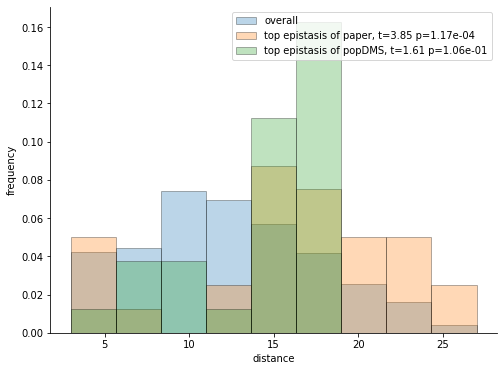

In [91]:
df_epistasis = df_merged.dropna().copy()

df_epistasis = df_epistasis[['site_1_y','site_2_y','epistasis_MPL_cons_1', 'epistasis_paper','distance']].sort_values('epistasis_MPL_cons_1')
df_unique = df_epistasis[['site_1_y','site_2_y','distance','epistasis_MPL_cons_1', 'epistasis_paper']]
df_MPL = df_unique.sort_values('epistasis_MPL_cons_1')
df_func = df_unique.sort_values('epistasis_paper')

t_test_all=df_unique['distance'].tolist()
t_test_MPL=df_MPL['distance'].iloc[:30].tolist()
t_test_paper=df_func['distance'].iloc[:30].tolist()

bins = np.linspace(3, 27, 10)
x=st.ttest_ind(a=t_test_MPL, b=t_test_all, equal_var=True)
y=st.ttest_ind(a=t_test_paper, b=t_test_all, equal_var=True)
plt.figure(figsize=(8,6))
plt.hist(t_test_all, bins, label='overall', density=True, alpha=0.3, edgecolor='k')
plt.hist(t_test_paper, bins, label='top epistasis of paper, t=%.2f p=%.2e'%(y[0],y[1]), density=True, alpha=0.3, edgecolor='k')
plt.hist(t_test_MPL, bins, label='top epistasis of popDMS, t=%.2f p=%.2e'%(x[0],x[1]), density=True, alpha=0.3, edgecolor='k')
# plt.yscale('log')
plt.xlabel('distance')
plt.ylabel('frequency')


# plt.title('MPL t=%.2f p=%.2e; paper ' %(x[0],x[1],y[0],y[1]))
plt.legend()
plt.show()


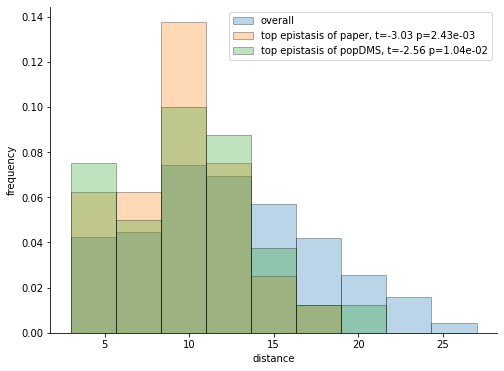

In [92]:
df_epistasis = df_merged.dropna().copy()

df_epistasis = df_epistasis[['site_1_y','site_2_y','epistasis_MPL_cons_1', 'epistasis_paper','distance']].sort_values('epistasis_MPL_cons_1')
df_unique = df_epistasis[['site_1_y','site_2_y','distance','epistasis_MPL_cons_1', 'epistasis_paper']]
df_MPL = df_unique.sort_values('epistasis_MPL_cons_1')
df_func = df_unique.sort_values('epistasis_paper')

t_test_all=df_unique['distance'].tolist()
t_test_MPL=unique(df_MPL['distance'].tolist())[-30:]
t_test_paper=unique(df_func['distance'].tolist())[-30:]

bins = np.linspace(3, 27, 10)
x=st.ttest_ind(a=t_test_MPL, b=t_test_all, equal_var=True)
y=st.ttest_ind(a=t_test_paper, b=t_test_all, equal_var=True)
plt.figure(figsize=(8,6))
plt.hist(t_test_all, bins, label='overall', density=True, alpha=0.3, edgecolor='k')
plt.hist(t_test_paper, bins, label='top epistasis of paper, t=%.2f p=%.2e'%(y[0],y[1]), density=True, alpha=0.3, edgecolor='k')
plt.hist(t_test_MPL, bins, label='top epistasis of popDMS, t=%.2f p=%.2e'%(x[0],x[1]), density=True, alpha=0.3, edgecolor='k')
# plt.yscale('log')
plt.xlabel('distance')
plt.ylabel('frequency')


# plt.title('MPL t=%.2f p=%.2e; paper ' %(x[0],x[1],y[0],y[1]))
plt.legend()
plt.show()


In [83]:
df_MPL

,site_1_y,site_2_y,distance,epistasis_MPL_cons_1,epistasis_paper
5398,2,30,16.411118,-0.244189,-0.263473
5463,1,30,17.957400,-0.241051,-0.285535
4750,25,30,14.714239,-0.228163,-0.286844
5396,2,30,16.411118,-0.228002,-0.228998
5401,2,30,16.411118,-0.226920,-0.310140
...,...,...,...,...,...
10182,14,24,23.799595,0.575295,-0.078170
10177,14,24,23.799595,0.594134,-0.040152
10180,14,24,23.799595,0.603215,0.338406
4473,2,31,13.051066,0.620815,1.169941


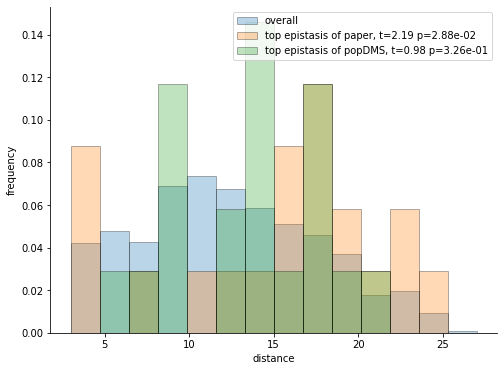

In [90]:
df_epistasis = df_merged.dropna().copy()

df_epistasis = df_epistasis[['site_1_y','site_2_y','epistasis_MPL_cons_1', 'epistasis_paper','distance']].sort_values('epistasis_MPL_cons_1')
df_unique = df_epistasis[['site_1_y','site_2_y','distance','epistasis_MPL_cons_1', 'epistasis_paper']]
df_MPL = df_unique.sort_values('epistasis_MPL_cons_1')
df_func = df_unique.sort_values('epistasis_paper')

t_test_all=df_unique['distance'].tolist()
t_test_MPL=unique(df_MPL['distance'].tolist())[:20]
t_test_paper=unique(df_func['distance'].tolist())[:20]

bins = np.linspace(3, 27, 15)
x=st.ttest_ind(a=t_test_MPL, b=t_test_all, equal_var=True)
y=st.ttest_ind(a=t_test_paper, b=t_test_all, equal_var=True)
plt.figure(figsize=(8,6))
plt.hist(t_test_all, bins, label='overall', density=True, alpha=0.3, edgecolor='k')
plt.hist(t_test_paper, bins, label='top epistasis of paper, t=%.2f p=%.2e'%(y[0],y[1]), density=True, alpha=0.3, edgecolor='k')
plt.hist(t_test_MPL, bins, label='top epistasis of popDMS, t=%.2f p=%.2e'%(x[0],x[1]), density=True, alpha=0.3, edgecolor='k')
# plt.yscale('log')
plt.xlabel('distance')
plt.ylabel('frequency')


# plt.title('MPL t=%.2f p=%.2e; paper ' %(x[0],x[1],y[0],y[1]))
plt.legend()
plt.show()


In [69]:
np.unique(np.array([1,3,2,4,4,1,2,3,5,3,4,6,9,6,7,8]))

def unique(list1):
 
    # initialize a null list
    unique_list = []
 
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    return unique_list
unique([(1,2),(2,3),(1,3),(1,2),(3,4),(1,2)])
t_test_MPL

[16.411118,
 17.9574,
 14.714239,
 17.00363,
 6.6770964,
 14.77689,
 14.274402,
 13.046857,
 8.681089,
 8.706445,
 13.903024,
 13.819354,
 5.165586,
 18.294344,
 9.333203,
 17.349361,
 18.812803,
 11.824366,
 20.286812,
 9.135572]

/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()
/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


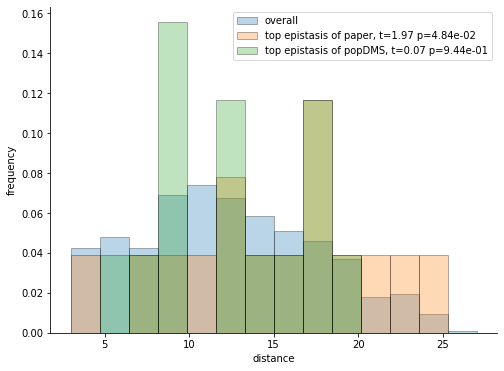

In [55]:
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

df_epistasis = df_merged.dropna().copy()
# df_epistasis = df_epistasis[~((df_epistasis["site_1_y"]==14)&(df_epistasis["site_2_y"]==24))]
# df_epistasis['epistasis_MPL_absolute'] = np.abs(df_epistasis['epistasis_MPL_cons_1'])
# df_epistasis['epistasis_MPL_absolute'].hist(bins=100)
# df_epistasis['epistasis_paper_absolute'] = np.abs(df_epistasis['epistasis_paper'])
# df_epistasis['epistasis_paper_absolute'].hist(bins=50)

df_epistasis = df_epistasis[['site_1_y','site_2_y','epistasis_MPL_cons_1', 'epistasis_paper','distance']].sort_values('epistasis_MPL_cons_1')
df_unique = df_epistasis[['site_1_y','site_2_y','distance','epistasis_MPL_cons_1', 'epistasis_paper']]

# df_unique.groupby(['site_1_y','site_2_y']).sum('')
df_MPL = df_unique.groupby(['site_1_y','site_2_y','distance'])['epistasis_MPL_cons_1', 'epistasis_paper'].agg('sum').reset_index().sort_values('epistasis_MPL_cons_1')
df_func = df_unique.groupby(['site_1_y','site_2_y','distance'])['epistasis_MPL_cons_1', 'epistasis_paper'].agg('sum').reset_index().sort_values('epistasis_paper')

t_test_all=df_unique['distance'].tolist()
# t_test_1=df_MPL['distance'].iloc[-40:].tolist()
# t_test_3=df_func['distance'].iloc[-40:].tolist()
t_test_MPL=df_MPL['distance'].iloc[:15].tolist()
#1
t_test_paper=df_func['distance'].iloc[:15].tolist()
#3


bins = np.linspace(3, 27, 15)
x=st.ttest_ind(a=t_test_MPL, b=t_test_all, equal_var=True)
y=st.ttest_ind(a=t_test_paper, b=t_test_all, equal_var=True)
plt.figure(figsize=(8,6))
plt.hist(t_test_all, bins, label='overall', density=True, alpha=0.3, edgecolor='k')
plt.hist(t_test_paper, bins, label='top epistasis of paper, t=%.2f p=%.2e'%(y[0],y[1]), density=True, alpha=0.3, edgecolor='k')
plt.hist(t_test_MPL, bins, label='top epistasis of popDMS, t=%.2f p=%.2e'%(x[0],x[1]), density=True, alpha=0.3, edgecolor='k')
# plt.yscale('log')
plt.xlabel('distance')
plt.ylabel('frequency')


# plt.title('MPL t=%.2f p=%.2e; paper ' %(x[0],x[1],y[0],y[1]))
plt.legend()
plt.show()

In [56]:
df_MPL

,site_1_y,site_2_y,distance,epistasis_MPL_cons_1,epistasis_paper
53,2,23,18.812803,-6.174866,-10.138784
524,25,34,17.003630,-5.569610,-8.724139
496,23,25,5.165586,-5.205232,-6.731278
226,8,25,8.706445,-5.131124,-7.074489
32,1,34,8.681089,-5.041445,-6.925485
...,...,...,...,...,...
454,19,33,10.366712,6.964859,8.632465
505,23,34,15.239888,7.032834,5.312404
554,30,34,9.792397,7.107900,5.833514
360,14,24,23.799595,7.140650,-3.520372


/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()
/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


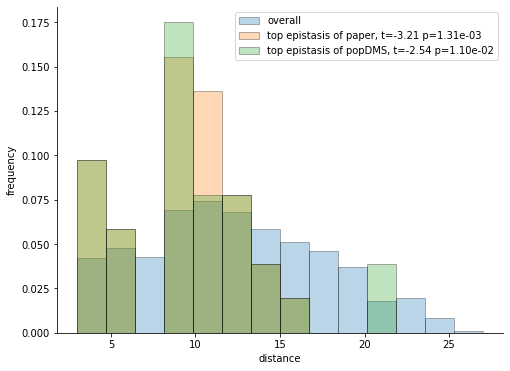

In [53]:
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

df_epistasis = df_merged.dropna().copy()
# df_epistasis = df_epistasis[~((df_epistasis["site_1_y"]==14)&(df_epistasis["site_2_y"]==24))]
# df_epistasis['epistasis_MPL_absolute'] = np.abs(df_epistasis['epistasis_MPL_cons_1'])
# df_epistasis['epistasis_MPL_absolute'].hist(bins=100)
# df_epistasis['epistasis_paper_absolute'] = np.abs(df_epistasis['epistasis_paper'])
# df_epistasis['epistasis_paper_absolute'].hist(bins=50)

df_epistasis = df_epistasis[['site_1_y','site_2_y','epistasis_MPL_cons_1', 'epistasis_paper','distance']].sort_values('epistasis_MPL_cons_1')
df_unique = df_epistasis[['site_1_y','site_2_y','distance','epistasis_MPL_cons_1', 'epistasis_paper']]

# df_unique.groupby(['site_1_y','site_2_y']).sum('')
df_MPL = df_unique.groupby(['site_1_y','site_2_y','distance'])['epistasis_MPL_cons_1', 'epistasis_paper'].agg('sum').reset_index().sort_values('epistasis_MPL_cons_1')
df_func = df_unique.groupby(['site_1_y','site_2_y','distance'])['epistasis_MPL_cons_1', 'epistasis_paper'].agg('sum').reset_index().sort_values('epistasis_paper')

t_test_all=df_unique['distance'].tolist()
# t_test_1=df_MPL['distance'].iloc[-40:].tolist()
# t_test_3=df_func['distance'].iloc[-40:].tolist()
t_test_MPL=df_MPL['distance'].iloc[-30:].tolist()
#1
t_test_paper=df_func['distance'].iloc[-30:].tolist()
#3


bins = np.linspace(3, 27, 15)
x=st.ttest_ind(a=t_test_MPL, b=t_test_all, equal_var=True)
y=st.ttest_ind(a=t_test_paper, b=t_test_all, equal_var=True)
plt.figure(figsize=(8,6))
plt.hist(t_test_all, bins, label='overall', density=True, alpha=0.3, edgecolor='k')
plt.hist(t_test_paper, bins, label='top epistasis of paper, t=%.2f p=%.2e'%(y[0],y[1]), density=True, alpha=0.3, edgecolor='k')
plt.hist(t_test_MPL, bins, label='top epistasis of popDMS, t=%.2f p=%.2e'%(x[0],x[1]), density=True, alpha=0.3, edgecolor='k')
# plt.yscale('log')
plt.xlabel('distance')
plt.ylabel('frequency')


# plt.title('MPL t=%.2f p=%.2e; paper ' %(x[0],x[1],y[0],y[1]))
plt.legend()
plt.show()

In [51]:
df_unique

,site_1_y,site_2_y,distance,epistasis_MPL_cons_1,epistasis_paper
5398,2,30,16.411118,-0.244189,-0.263473
5463,1,30,17.957400,-0.241051,-0.285535
4750,25,30,14.714239,-0.228163,-0.286844
5396,2,30,16.411118,-0.228002,-0.228998
5401,2,30,16.411118,-0.226920,-0.310140
...,...,...,...,...,...
10182,14,24,23.799595,0.575295,-0.078170
10177,14,24,23.799595,0.594134,-0.040152
10180,14,24,23.799595,0.603215,0.338406
4473,2,31,13.051066,0.620815,1.169941


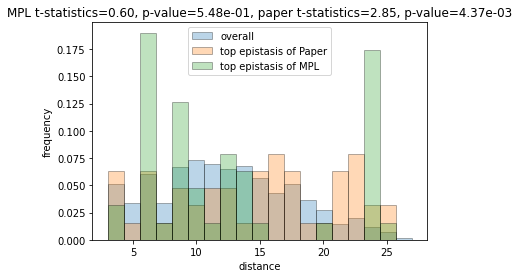

,site_1_y,site_2_y,epistasis_MPL_cons_1,epistasis_MPL_absolute,epistasis_paper,epistasis_paper_absolute,distance
11985,5,22,0.277917,0.277917,0.856563,0.856563,8.886145
19111,3,10,-0.065940,0.065940,-0.867324,0.867324,11.815188
16543,2,9,0.057286,0.057286,-0.874365,0.874365,15.014010
13365,2,18,-0.008467,0.008467,-0.878465,0.878465,15.645312
8714,2,26,0.082656,0.082656,-0.887959,0.887959,22.007840
12837,1,19,-0.131267,0.131267,0.893530,0.893530,18.294344
13357,2,18,-0.052295,0.052295,-0.897212,0.897212,15.645312
11295,4,23,0.057273,0.057273,0.902290,0.902290,12.157323
8717,2,26,0.027561,0.027561,-0.904734,0.904734,22.007840
8976,22,25,0.049693,0.049693,0.912468,0.912468,5.421668


In [23]:
import scipy.stats as stats

# df_epistasis_top = df_epistasis.loc[df_epistasis['epistasis_MPL_absolute']>0.25]
df_epistasis_top = df_epistasis.sort_values('epistasis_MPL_absolute').iloc[-50:]

t_test_1 = df_epistasis_top['distance']
t_test_2 = df_epistasis['distance']

# df_epistasis_top = df_epistasis.loc[df_epistasis['epistasis_paper_absolute']>1]
df_epistasis_top = df_epistasis.sort_values('epistasis_paper_absolute').iloc[-50:]
t_test_3 = df_epistasis_top['distance']

bins = np.linspace(3, 27, 20)
plt.hist(t_test_2, bins, label='overall', density=True, alpha=0.3, edgecolor='k')
plt.hist(t_test_3, bins, label='top epistasis of Paper', density=True, alpha=0.3, edgecolor='k')
plt.hist(t_test_1, bins, label='top epistasis of MPL', density=True, alpha=0.3, edgecolor='k')
# plt.yscale('log')
plt.xlabel('distance')
plt.ylabel('frequency')
x=stats.ttest_ind(a=t_test_1, b=t_test_2, equal_var=True)
y=stats.ttest_ind(a=t_test_3, b=t_test_2, equal_var=True)
plt.title('MPL t-statistics=%.2f, p-value=%.2e, paper t-statistics=%.2f, p-value=%.2e' %(x[0],x[1],y[0],y[1]))
plt.legend()
plt.show()


# df_epistasis_top = df_epistasis.loc[df_epistasis['epistasis_paper_absolute']>1]
# df_epistasis_top = df_epistasis.sort_values('epistasis_paper_absolute').iloc[-50:]
# t_test_1 = df_epistasis_top['distance']
# t_test_2 = df_epistasis['distance']
# bins = np.linspace(3, 27, 20)
# plt.hist(t_test_2, bins, label='overall', density=True)
# plt.hist(t_test_1, bins, label='top epistasis', density=True)
# # plt.yscale('log')
# plt.xlabel('distance')
# plt.ylabel('frequency')
# x=stats.ttest_ind(a=t_test_1, b=t_test_2, equal_var=True)
# plt.title('Paper top epistasis distance vs. overall distancet-statistics=%.2f, p-value=%.2e' %(x[0],x[1]))
# plt.legend()

df_epistasis_top


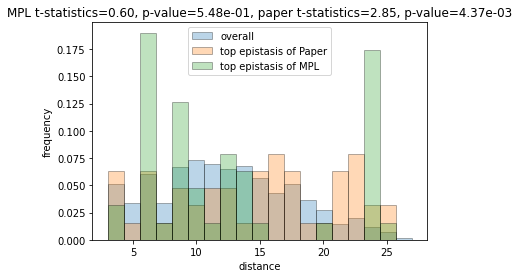

,site_1_y,site_2_y,epistasis_MPL_cons_1,epistasis_MPL_absolute,epistasis_paper,epistasis_paper_absolute,distance
11985,5,22,0.277917,0.277917,0.856563,0.856563,8.886145
19111,3,10,-0.065940,0.065940,-0.867324,0.867324,11.815188
16543,2,9,0.057286,0.057286,-0.874365,0.874365,15.014010
13365,2,18,-0.008467,0.008467,-0.878465,0.878465,15.645312
8714,2,26,0.082656,0.082656,-0.887959,0.887959,22.007840
12837,1,19,-0.131267,0.131267,0.893530,0.893530,18.294344
13357,2,18,-0.052295,0.052295,-0.897212,0.897212,15.645312
11295,4,23,0.057273,0.057273,0.902290,0.902290,12.157323
8717,2,26,0.027561,0.027561,-0.904734,0.904734,22.007840
8976,22,25,0.049693,0.049693,0.912468,0.912468,5.421668


In [24]:
# df_epistasis_top = df_epistasis.loc[df_epistasis['epistasis_MPL_absolute']>0.25]
df_epistasis_top = df_epistasis.sort_values('epistasis_MPL_absolute').iloc[-50:]

t_test_1 = df_epistasis_top['distance']
t_test_2 = df_epistasis['distance']

# df_epistasis_top = df_epistasis.loc[df_epistasis['epistasis_paper_absolute']>1]
df_epistasis_top = df_epistasis.sort_values('epistasis_paper_absolute').iloc[-50:]
t_test_3 = df_epistasis_top['distance']

bins = np.linspace(3, 27, 20)
plt.hist(t_test_2, bins, label='overall', density=True, alpha=0.3, edgecolor='k')
plt.hist(t_test_3, bins, label='top epistasis of Paper', density=True, alpha=0.3, edgecolor='k')
plt.hist(t_test_1, bins, label='top epistasis of MPL', density=True, alpha=0.3, edgecolor='k')
# plt.yscale('log')
plt.xlabel('distance')
plt.ylabel('frequency')
x=stats.ttest_ind(a=t_test_1, b=t_test_2, equal_var=True)
y=stats.ttest_ind(a=t_test_3, b=t_test_2, equal_var=True)
plt.title('MPL t-statistics=%.2f, p-value=%.2e, paper t-statistics=%.2f, p-value=%.2e' %(x[0],x[1],y[0],y[1]))
plt.legend()
plt.show()


# df_epistasis_top = df_epistasis.loc[df_epistasis['epistasis_paper_absolute']>1]
# df_epistasis_top = df_epistasis.sort_values('epistasis_paper_absolute').iloc[-50:]
# t_test_1 = df_epistasis_top['distance']
# t_test_2 = df_epistasis['distance']
# bins = np.linspace(3, 27, 20)
# plt.hist(t_test_2, bins, label='overall', density=True)
# plt.hist(t_test_1, bins, label='top epistasis', density=True)
# # plt.yscale('log')
# plt.xlabel('distance')
# plt.ylabel('frequency')
# x=stats.ttest_ind(a=t_test_1, b=t_test_2, equal_var=True)
# plt.title('Paper top epistasis distance vs. overall distancet-statistics=%.2f, p-value=%.2e' %(x[0],x[1]))
# plt.legend()

df_epistasis_top

In [61]:
df_merged.columns

Index(['Unnamed: 0', 'mu2_single', 'selection_coefficients_2', 'mu1_single',
       'selection_coefficients_1', '0', '1', '2', '3', 'mutant1', 'mutant2',
       'NSCOR_ratio_1', 'NSCOR_ratio_2', 'NSCOR_ratio_3', 'projected_0',
       'projected_1', 'projected_2', 'projected_3', 'slope_v',
       'function_score', 'predicted_score', 'site_1_x', 'site_2_x', 'AA_1_x',
       'AA_2_x', 'all_variant', 'epistasis_paper', 'state_1', 'state_2',
       'mat_index', 'epistasis_MPL', 'site_1_y', 'AA_1_y', 'site_2_y',
       'AA_2_y', 'epistasis_MPL_transfer', 'epistasis_MPL_cons',
       'epistasis_MPL_cons_2', 'epistasis_MPL_cons_1', 'distance', 'log_dist'],
      dtype='object')

array([[<AxesSubplot:title={'center':'epistasis_paper'}>,
        <AxesSubplot:title={'center':'epistasis_MPL_cons_1'}>]],
      dtype=object)

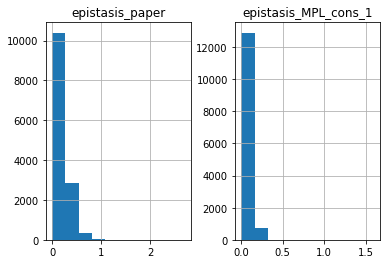

In [86]:
df_new

In [103]:
df_merged
df_new = df_merged.copy()[['site_1_y','site_2_y','epistasis_paper','epistasis_MPL_cons_1']].dropna()
df_new['epistasis_paper'] = np.abs(df_new['epistasis_paper'])
df_new['epistasis_MPL_cons_1'] = np.abs(df_new['epistasis_MPL_cons_1'])

df_new=df_new.groupby(['site_1_y', 'site_2_y'])['epistasis_paper', 'epistasis_MPL_cons_1'].agg('sum').reset_index()
# df_new['epistasis_paper']=(df_new['epistasis_paper']-df_new['epistasis_paper'].mean())/df_new['epistasis_paper'].std()
# df_new['epistasis_MPL_cons_1']=(df_new['epistasis_MPL_cons_1']-df_new['epistasis_MPL_cons_1'].mean())/df_new['epistasis_MPL_cons_1'].std()

df_new['epistasis_paper']=(df_new['epistasis_paper']-df_new['epistasis_paper'].min())/(df_new['epistasis_paper'].max()-df_new['epistasis_paper'].min())
df_new['epistasis_MPL_cons_1']=(df_new['epistasis_MPL_cons_1']-df_new['epistasis_MPL_cons_1'].min())/(df_new['epistasis_MPL_cons_1'].max()-df_new['epistasis_MPL_cons_1'].min())

x_list = [i+2 for i in range(34)]
df_heatmap = pd.DataFrame(columns=x_list)
df_heatmap
for i in (x_list):
    df_heatmap[i]=np.zeros(36)
for index, row in df_new.iterrows():
    df_heatmap.loc[row['site_1_y']+1,row['site_2_y']+1]=row['epistasis_paper']
    df_heatmap.loc[row['site_2_y']+1,row['site_1_y']+1]=row['epistasis_MPL_cons_1']
df_heatmap=df_heatmap.iloc[2:]
df_heatmap

import seaborn as sns
plt.figure(figsize = (12,10))
sns.heatmap(df_heatmap,cmap='Blues',cbar_kws={'label': 'sum of absolute mutational effects'})
plt.xlabel('site')
plt.ylabel('site')
plt.title('lower left MPL, upper right paper')

#upper right paper
# lower left MPL

/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,2,3,4,5,6,7,8,9,10,11,...,26,27,28,29,30,31,32,33,34,35
2,0.000000,0.724346,0.804390,0.290570,0.561486,0.388892,0.289826,0.385578,0.654688,0.647995,...,0.789262,0.345923,0.222906,0.226258,0.346528,0.282029,0.293309,0.258493,0.307017,0.329868
3,0.429040,0.000000,0.521052,0.374939,0.574617,0.479130,0.351035,0.320425,0.526839,0.620846,...,1.000000,0.409812,0.201498,0.226618,0.426574,0.301441,0.364566,0.219975,0.372140,0.411229
4,0.204680,0.592035,0.000000,0.237985,0.517246,0.398494,0.270784,0.234250,0.532705,0.664257,...,0.819635,0.321147,0.169733,0.201662,0.303827,0.184099,0.289139,0.185912,0.255351,0.285645
5,0.094384,0.034669,0.051850,0.000000,0.138718,0.121878,0.049103,0.151881,0.249603,0.134299,...,0.274039,0.108344,0.069140,0.098230,0.207287,0.152405,0.137742,0.060112,0.153179,0.123311
6,0.551520,0.573851,0.351745,0.140766,0.000000,0.241861,0.060482,0.165119,0.423566,0.222886,...,0.605732,0.181116,0.087267,0.123226,0.160275,0.181129,0.223727,0.060971,0.165116,0.143698
7,0.147979,0.229727,0.098999,0.015616,0.202527,0.000000,0.145115,0.135568,0.320153,0.244315,...,0.391367,0.222922,0.114724,0.156230,0.183453,0.101828,0.178535,0.113104,0.226720,0.142946
8,0.316478,0.300561,0.186381,0.029248,0.104631,0.069062,0.000000,0.099085,0.212774,0.160958,...,0.379689,0.106341,0.054351,0.098606,0.075123,0.160803,0.170908,0.040178,0.134367,0.124003
9,0.535869,0.331293,0.162048,0.099048,0.535751,0.041529,0.235020,0.000000,0.357155,0.132588,...,0.338634,0.259395,0.088956,0.274498,0.131830,0.275120,0.203886,0.085096,0.286723,0.223148
10,0.285713,0.204090,0.208671,0.049473,0.186960,0.083247,0.112182,0.257454,0.000000,0.418101,...,0.685260,0.277959,0.158224,0.245225,0.291481,0.236746,0.315560,0.209129,0.307168,0.324865
11,0.134321,0.187480,0.222779,0.020605,0.032646,0.079030,0.079046,0.020928,0.083453,0.000000,...,0.566573,0.174240,0.134746,0.072074,0.157153,0.065232,0.164681,0.113170,0.106148,0.136656


Text(0.5, 1.0, 'distance distribution')

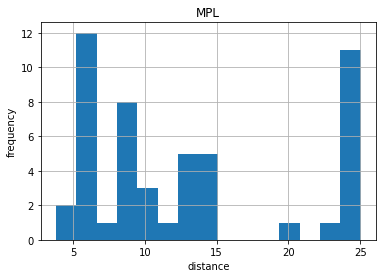

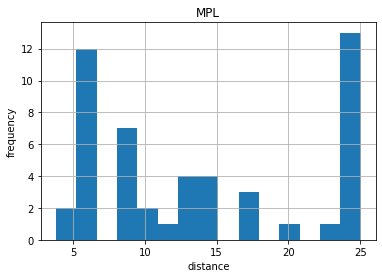

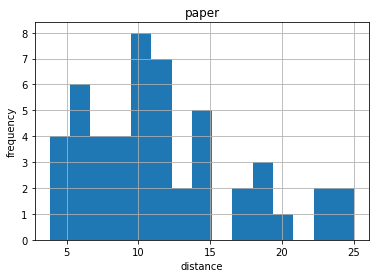

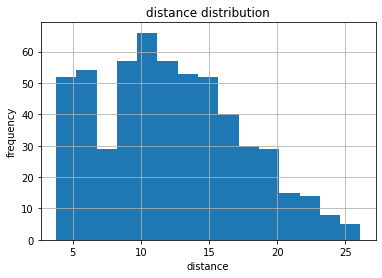

In [238]:
site_i = 50

df_merged.dropna().sort_values('epistasis_MPL_cons_1').iloc[-site_i:].hist('distance', bins=15)
plt.xlabel('distance')
plt.ylabel('frequency')
plt.title('MPL')
df_merged.sort_values('epistasis_MPL_cons_1').iloc[-site_i:].hist('distance', bins=15)
plt.xlabel('distance')
plt.ylabel('frequency')
plt.title('MPL')
df_merged.dropna().sort_values('epistasis_paper').iloc[-site_i:].hist('distance', bins=15)
plt.xlabel('distance')
plt.ylabel('frequency')
plt.title('paper')


df_distance.hist('distance_0',bins=15)
plt.xlabel('distance')
plt.ylabel('frequency')
plt.title('distance distribution')

In [228]:
df_merged

,mu2_single,selection_coefficients_2,mu1_single,selection_coefficients_1,0,1,2,3,mutant1,mutant2,NSCOR_ratio_1,NSCOR_ratio_2,NSCOR_ratio_3,projected_0,projected_1,projected_2,projected_3,slope_v,function_score,predicted_score,site_1_x,site_2_x,AA_1_x,AA_2_x,all_variant,epistasis_paper,state_1,state_2,mat_index,epistasis_MPL,site_1_y,AA_1_y,site_2_y,AA_2_y,epistasis_MPL_transfer,epistasis_MPL_cons,epistasis_MPL_cons_2,epistasis_MPL_cons_1,distance,log_dist
0,35_S_35_S,0.012913,34_T_34_T,0.020034,0.000020,0.000031,0.000007,4.335804e-06,Pro33Thr,Arg34Ser,1.570969,0.230539,0.581999,0,0.651654,-1.465264,-2.246177,-0.885545,0.476810,0.287980,34,35,T,S,34_T_35_S,0.188829,689,709,38144,0.010507,33,T,34,S,0.010248,0.0,0.145763,0.155797,3.823838,1.341255
1,35_S_35_S,0.012913,34_S_34_S,0.027446,0.000033,0.000031,0.000007,2.167902e-06,Pro33Ser,Arg34Ser,0.937506,0.230539,0.287805,0,-0.093100,-2.210018,-4.006852,-1.413747,0.330628,0.290811,34,35,S,S,34_S_35_S,0.039818,688,709,38137,0.009983,33,S,34,S,0.009628,0.0,0.165974,0.177629,3.823838,1.341255
2,35_S_35_S,0.012913,34_R_34_R,0.032836,0.000034,0.000020,0.000017,8.671607e-06,Pro33Arg,Arg34Ser,0.570753,0.829437,0.516622,0,-0.809060,-1.078856,-2.031674,-0.636482,0.566657,0.368164,34,35,R,S,34_R_35_S,0.198493,687,709,38129,0.002757,33,R,34,S,0.002333,0.0,0.131081,0.119203,3.823838,1.341255
3,35_S_35_S,0.012913,34_Q_34_Q,0.018224,0.000025,0.000027,0.000011,4.877779e-06,Pro33Gln,Arg34Ser,1.107283,0.396138,0.434902,0,0.147024,-1.188899,-2.390137,-0.850633,0.488489,0.302949,34,35,Q,S,34_Q_35_S,0.185540,686,709,38121,0.009727,33,Q,34,S,0.009492,0.0,0.136401,0.138648,3.823838,1.341255
4,35_S_35_S,0.012913,34_L_34_L,0.024075,0.000030,0.000020,0.000019,5.419755e-07,Pro33Leu,Arg34Ser,0.657119,0.923318,0.023032,0,-0.605774,-0.720875,-6.161110,-1.859843,0.242690,0.274872,34,35,L,S,34_L_35_S,-0.032182,682,709,38093,0.006959,33,L,34,S,0.006648,0.0,0.177694,0.182529,3.823838,1.341255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19152,11_I_11_I,0.010342,3_I_3_I,-0.009393,0.000082,0.000069,0.000078,8.346422e-05,Val2Ile,Met10Ile,0.827955,1.137079,1.072320,0,-0.272376,-0.087044,0.013692,0.022641,0.894821,NaN,3,11,I,I,3_I_11_I,NaN,29,197,3579,-0.009104,2,I,10,I,-0.009006,0.0,-0.023691,-0.056455,14.800216,2.694642
19153,11_I_11_I,0.010342,3_G_3_G,-0.021934,0.000046,0.000066,0.000065,6.774693e-05,Val2Gly,Met10Ile,1.451072,0.975474,1.044302,0,0.537119,0.501295,0.563834,0.165568,0.988010,NaN,3,11,G,I,3_G_11_I,NaN,27,197,3328,-0.014292,2,G,10,I,-0.014065,0.0,-0.056506,-0.087861,14.800216,2.694642
19154,11_I_11_I,0.010342,3_F_3_F,-0.007910,0.000063,0.000058,0.000069,6.232718e-05,Val2Phe,Met10Ile,0.925118,1.184479,0.907996,0,-0.112290,0.131962,-0.007279,0.022241,0.894573,NaN,3,11,F,I,3_F_11_I,NaN,26,197,3107,0.009497,2,F,10,I,0.009579,0.0,-0.008294,-0.031612,14.800216,2.694642
19155,11_I_11_I,0.010342,3_A_3_A,-0.016722,0.000053,0.000038,0.000048,4.335804e-05,Val2Ala,Met10Ile,0.705213,1.272765,0.898822,0,-0.503868,-0.155902,-0.309795,-0.058142,0.846093,NaN,3,11,A,I,3_A_11_I,NaN,22,197,2632,-0.006410,2,A,10,I,-0.006237,0.0,-0.031928,-0.062960,14.800216,2.694642


In [6]:
df_single_variant = pd.read_csv('single_allele_counts_rep1.csv')
df_double_variant = pd.read_csv('double_allele_counts_rep1.csv')
codon_list = df_single_variant['codon']
aa_list = [codon2aa(codon) for codon in codon_list]
df_single_variant['AA_1'] = aa_list
codon_list = df_double_variant['codon_1']
aa_list = [codon2aa(codon) for codon in codon_list]
df_double_variant['AA_1'] = aa_list
codon_list = df_double_variant['codon_2']
aa_list = [codon2aa(codon) for codon in codon_list]
df_double_variant['AA_2'] = aa_list
df_single_variant = df_single_variant.drop(['codon'],axis=1)
df_double_variant = df_double_variant.drop(['codon_1', 'codon_2'],axis=1)
df_single_variant= df_single_variant.groupby(['replicate', 'generation', 'site', 'AA_1']).sum()
df_single_variant = pd.DataFrame(df_single_variant).reset_index(col_level=1)
df_double_variant= df_double_variant.groupby(['replicate', 'generation', 'site_1','site_2', 'AA_1', 'AA_2']).sum()
df_double_variant = pd.DataFrame(df_double_variant).reset_index(col_level=1)

df_single_variant_gen0 = df_single_variant.loc[df_single_variant['generation']==0]
df_single_variant_gen1 = df_single_variant.loc[df_single_variant['generation']==1]
df_single_variant_gen2 = df_single_variant.loc[df_single_variant['generation']==2]
df_single_variant_gen3 = df_single_variant.loc[df_single_variant['generation']==3]
df_double_variant_gen0 = df_double_variant.loc[df_double_variant['generation']==0]
df_double_variant_gen1 = df_double_variant.loc[df_double_variant['generation']==1]
df_double_variant_gen2 = df_double_variant.loc[df_double_variant['generation']==2]
df_double_variant_gen3 = df_double_variant.loc[df_double_variant['generation']==3]

df_single_variant_gen0['frequency'] = df_single_variant_gen0['counts']*34/df_single_variant_gen0['counts'].sum()
df_single_variant_gen1['frequency'] = df_single_variant_gen1['counts']*34/df_single_variant_gen1['counts'].sum()
df_single_variant_gen2['frequency'] = df_single_variant_gen2['counts']*34/df_single_variant_gen2['counts'].sum()
df_single_variant_gen3['frequency'] = df_single_variant_gen3['counts']*34/df_single_variant_gen3['counts'].sum()

df_single = df_single_variant_gen0.copy()
df_single = df_single.append(df_single_variant_gen1)
df_single = df_single.append(df_single_variant_gen2)
df_single = df_single.append(df_single_variant_gen3)

df_double_variant_gen0['frequency'] = df_double_variant_gen0['counts']*561/df_double_variant_gen0['counts'].sum()
df_double_variant_gen1['frequency'] = df_double_variant_gen1['counts']*561/df_double_variant_gen1['counts'].sum()
df_double_variant_gen2['frequency'] = df_double_variant_gen2['counts']*561/df_double_variant_gen2['counts'].sum()
df_double_variant_gen3['frequency'] = df_double_variant_gen3['counts']*561/df_double_variant_gen3['counts'].sum()
df_double = df_double_variant_gen0.copy()
df_double = df_double.append(df_double_variant_gen1)
df_double = df_double.append(df_double_variant_gen2)
df_double = df_double.append(df_double_variant_gen3)

/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [187]:
df_double_variant_gen0
df_double_variant_gen1

,replicate,generation,site_1,site_2,AA_1,AA_2,counts,frequency
37607,1,1,1,2,*,V,11,0.000008
37608,1,1,1,2,A,A,15,0.000011
37609,1,1,1,2,A,D,9,0.000007
37610,1,1,1,2,A,F,33,0.000024
37611,1,1,1,2,A,G,15,0.000011
...,...,...,...,...,...,...,...,...
75209,1,1,33,34,T,L,25,0.000018
75210,1,1,33,34,T,R,5078,0.003675
75211,1,1,33,34,T,S,21,0.000015
75212,1,1,33,34,V,R,18,0.000013


In [114]:
df_merged.sort_values('epistasis_MPL_cons_1')

,Unnamed: 0,mu2_single,selection_coefficients_2,mu1_single,selection_coefficients_1,0,1,2,3,mutant1,...,site_1_y,AA_1_y,site_2_y,AA_2_y,epistasis_MPL_transfer,epistasis_MPL_cons,epistasis_MPL_cons_2,epistasis_MPL_cons_1,distance,log_dist
5398,5398,31_*_31_*,0.064827,3_G_3_G,-0.021934,0.000069,0.000058,0.000037,0.000020,Val2Gly,...,2,G,30,*,-0.009866,0.0,-0.226858,-0.244189,16.411118,2.797959
5463,5463,31_*_31_*,0.064827,2_V_2_V,-0.038959,0.000123,0.000101,0.000043,0.000031,Asp1Val,...,1,V,30,*,-0.012025,0.0,-0.230308,-0.241051,17.957400,2.888002
4750,4750,31_*_31_*,0.064827,26_N_26_N,-0.019457,0.000145,0.000109,0.000048,0.000022,Asp25Asn,...,25,N,30,*,-0.018404,0.0,-0.243379,-0.228163,14.714239,2.688816
5396,5396,31_*_31_*,0.064827,3_L_3_L,-0.013827,0.000090,0.000066,0.000033,0.000018,Val2Leu,...,2,L,30,*,-0.005031,0.0,-0.213891,-0.228002,16.411118,2.797959
5401,5401,31_*_31_*,0.064827,3_D_3_D,-0.022180,0.000054,0.000041,0.000026,0.000011,Val2Asp,...,2,D,30,*,-0.010087,0.0,-0.223170,-0.226920,16.411118,2.797959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10182,10182,25_M_25_M,0.012447,15_C_15_C,0.009903,0.000024,0.000032,0.000015,0.000009,Ser14Cys,...,14,C,24,M,-0.020562,0.0,0.561721,0.575295,23.799595,3.169669
10177,10177,25_M_25_M,0.012447,15_T_15_T,-0.001523,0.000012,0.000011,0.000024,0.000023,Ser14Thr,...,14,T,24,M,-0.008551,0.0,0.583061,0.594134,23.799595,3.169669
10180,10180,25_M_25_M,0.012447,15_I_15_I,-0.008571,0.000029,0.000036,0.000139,0.000137,Ser14Ile,...,14,I,24,M,-0.010183,0.0,0.595740,0.603215,23.799595,3.169669
4473,4473,32_H_32_H,-0.009593,3_F_3_F,-0.007910,0.000051,0.000079,0.000629,0.001015,Val2Phe,...,2,F,31,H,0.193618,0.0,0.643057,0.620815,13.051066,2.568870


In [220]:
df_merged.loc[(df_merged['site_1_y']==2) & (df_merged['site_2_y']==31)].sort_values('epistasis_MPL_cons_1')

,mu2_single,selection_coefficients_2,mu1_single,selection_coefficients_1,0,1,2,3,mutant1,mutant2,NSCOR_ratio_1,NSCOR_ratio_2,NSCOR_ratio_3,projected_0,projected_1,projected_2,projected_3,slope_v,function_score,predicted_score,site_1_x,site_2_x,AA_1_x,AA_2_x,all_variant,epistasis_paper,state_1,state_2,mat_index,epistasis_MPL,site_1_y,AA_1_y,site_2_y,AA_2_y,epistasis_MPL_transfer,epistasis_MPL_cons,epistasis_MPL_cons_2,epistasis_MPL_cons_1,distance,log_dist
4477,32_E_32_E,0.005741,3_I_3_I,-0.009393,3.343619e-05,0.000028,0.000032,0.000012,Val2Ile,Gln31Glu,0.847332,1.107604,0.391638,0,-0.239001,-0.091560,-1.443966,-0.418445,0.659107,0.916984,3,32,I,E,3_I_32_E,-0.257877,29,634,3727,-0.004352,2,I,31,E,-0.004298,0.0,0.066667,0.036990,13.051066,2.56887
4481,32_E_32_E,0.005741,3_D_3_D,-0.022180,1.457475e-05,0.000005,0.000006,0.000004,Val2Asp,Gln31Glu,0.340536,1.054752,0.680063,0,-1.554123,-1.477219,-2.033479,-0.602353,0.580222,1.242696,3,32,D,E,3_D_32_E,-0.662474,24,634,3001,-0.008105,2,D,31,E,-0.007978,0.0,0.049659,0.037195,13.051066,2.56887
4480,32_E_32_E,0.005741,3_A_3_A,-0.016722,9.430719e-06,0.000006,0.000006,0.000004,Val2Ala,Gln31Glu,0.660424,0.876377,0.680063,0,-0.598535,-0.788910,-1.345170,-0.422589,0.657217,0.978239,3,32,A,E,3_A_32_E,-0.321022,22,634,2762,-0.002899,2,A,31,E,-0.002803,0.0,0.054438,0.038398,13.051066,2.56887
4487,32_*_32_*,0.011721,3_D_3_D,-0.022180,1.543209e-05,0.000026,0.000007,0.000004,Val2Asp,Gln31Ter,1.733905,0.269904,0.581999,0,0.794025,-1.095456,-1.876368,-0.751858,0.523105,0.811936,3,32,D,*,3_D_32_*,-0.288831,24,630,3000,-0.010171,2,D,31,*,-0.009911,0.0,0.050358,0.040166,13.051066,2.56887
4478,32_E_32_E,0.005741,3_G_3_G,-0.021934,1.800410e-05,0.000019,0.000030,0.000017,Val2Gly,Gln31Glu,1.057126,1.570056,0.563612,0,0.080147,0.730963,-0.096264,0.036202,0.903272,1.257798,3,32,G,E,3_G_32_E,-0.354526,27,634,3469,-0.016298,2,G,31,E,-0.016172,0.0,0.095636,0.043297,13.051066,2.56887
4483,32_*_32_*,0.011721,3_I_3_I,-0.009393,3.257885e-05,0.000033,0.000020,0.000014,Val2Ile,Gln31Ter,1.004493,0.617447,0.688978,0,0.006468,-0.689146,-1.226616,-0.437546,0.650438,0.599127,3,32,I,*,3_I_32_*,0.051311,29,630,3726,-0.001094,2,I,31,*,-0.000984,0.0,0.072689,0.045285,13.051066,2.56887
4486,32_*_32_*,0.011721,3_A_3_A,-0.016722,1.114540e-05,0.000022,0.000011,0.000006,Val2Ala,Gln31Ter,2.022177,0.494146,0.532966,0,1.015910,-0.001080,-0.908963,-0.374388,0.679545,0.639149,3,32,A,*,3_A_32_*,0.040397,22,630,2761,0.001594,2,A,31,*,0.001790,0.0,0.061696,0.047928,13.051066,2.56887
4484,32_*_32_*,0.011721,3_G_3_G,-0.021934,2.657748e-05,0.000017,0.000020,0.000005,Val2Gly,Gln31Ter,0.623100,1.210830,0.261061,0,-0.682463,-0.406467,-2.344010,-0.675604,0.551498,0.821803,3,32,G,*,3_G_32_*,-0.270306,27,630,3468,-0.014270,2,G,31,*,-0.014013,0.0,0.100428,0.050361,13.051066,2.56887
4476,32_E_32_E,0.005741,3_L_3_L,-0.013827,1.543209e-05,0.000016,0.000026,0.000023,Val2Leu,Gln31Glu,1.026822,1.649334,0.876192,0,0.038186,0.760069,0.569388,0.243005,1.042491,1.099182,3,32,L,E,3_L_32_E,-0.056691,31,634,3926,-0.006951,2,L,31,E,-0.006871,0.0,0.079039,0.050601,13.051066,2.56887
4464,32_K_32_K,0.014664,3_I_3_I,-0.009393,2.914949e-05,0.000033,0.000011,0.000028,Val2Ile,Gln31Lys,1.126646,0.329746,2.494254,0,0.172034,-1.428539,-0.109931,-0.193037,0.770568,NaN,3,32,I,K,3_I_32_K,NaN,29,639,3729,-0.004105,2,I,31,K,-0.003967,0.0,0.065782,0.052222,13.051066,2.56887


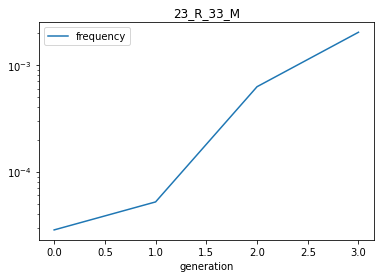

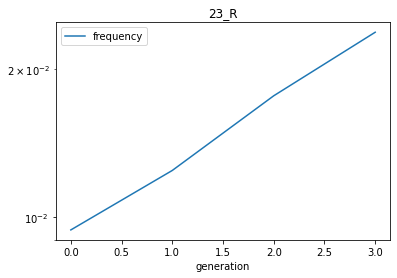

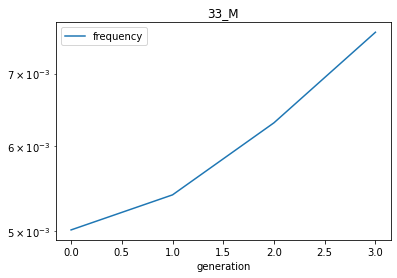

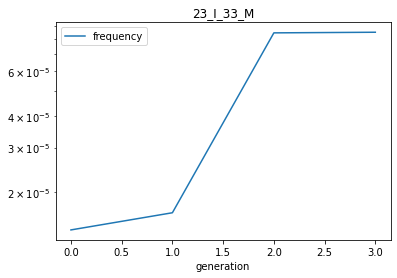

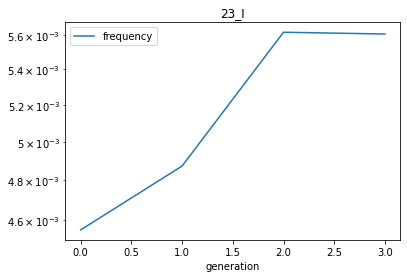

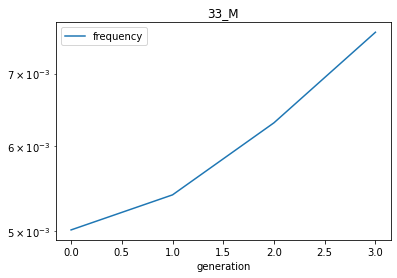

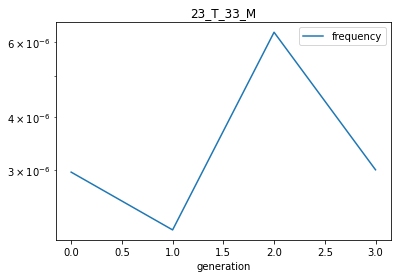

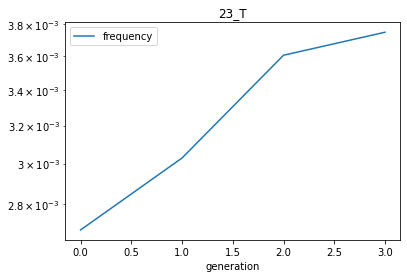

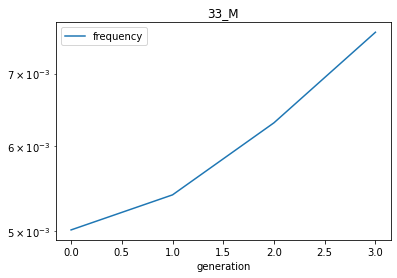

In [221]:
df_traj_23_33 = df_double.loc[(df_double['site_1']==14) & (df_double['site_2']==24)]
df_traj_23_33[(df_traj_23_33['AA_1']=='R') & (df_traj_23_33['AA_2']=='M')].plot(x='generation',y='frequency')
plt.title('23_R_33_M')
plt.yscale('log')
df_traj_23_33 = df_single.loc[(df_single['site']==14)&(df_single['AA_1']=='R')]
df_traj_23_33.plot(x='generation',y='frequency')
plt.title('23_R')
plt.yscale('log')
df_traj_23_33 = df_single.loc[(df_single['site']==24)&(df_single['AA_1']=='M')]
df_traj_23_33.plot(x='generation',y='frequency')
plt.title('33_M')
plt.yscale('log')

df_traj_23_33 = df_double.loc[(df_double['site_1']==14) & (df_double['site_2']==24)]
df_traj_23_33[(df_traj_23_33['AA_1']=='I') & (df_traj_23_33['AA_2']=='M')].plot(x='generation',y='frequency')
plt.title('23_I_33_M')
plt.yscale('log')
df_traj_23_33 = df_single.loc[(df_single['site']==14)&(df_single['AA_1']=='I')]
df_traj_23_33.plot(x='generation',y='frequency')
plt.title('23_I')
plt.yscale('log')
df_traj_23_33 = df_single.loc[(df_single['site']==24)&(df_single['AA_1']=='M')]
df_traj_23_33.plot(x='generation',y='frequency')
plt.title('33_M')
plt.yscale('log')

df_traj_23_33 = df_double.loc[(df_double['site_1']==14) & (df_double['site_2']==24)]
df_traj_23_33[(df_traj_23_33['AA_1']=='T') & (df_traj_23_33['AA_2']=='M')].plot(x='generation',y='frequency')
plt.title('23_T_33_M')
plt.yscale('log')
df_traj_23_33 = df_single.loc[(df_single['site']==14)&(df_single['AA_1']=='T')]
df_traj_23_33.plot(x='generation',y='frequency')
plt.title('23_T')
plt.yscale('log')
df_traj_23_33 = df_single.loc[(df_single['site']==24)&(df_single['AA_1']=='M')]
df_traj_23_33.plot(x='generation',y='frequency')
plt.title('33_M')
plt.yscale('log')



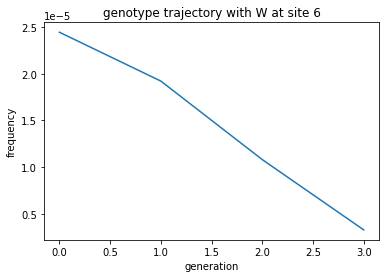

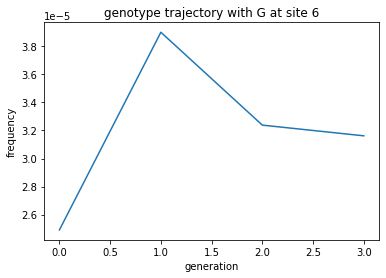

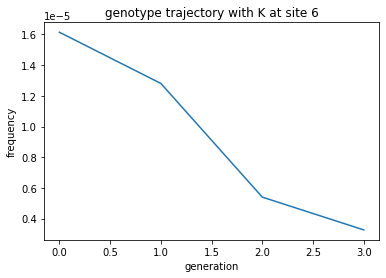

In [56]:
AA  = sorted(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', '*'])
# 'Trp'
# 'Pro'

df_count = pd.read_csv('YAP1_count.csv', engine='python')
# df_count = df_count[(df_count['101208_c_0']>=10) & (df_count['110307_c_0']>=10)]
df_count['gen0'] = df_count['101208_c_0']/df_count['101208_c_0'].sum()
df_count['gen1'] = df_count['101208_c_1']/df_count['101208_c_1'].sum()
df_count['gen2'] = df_count['101208_c_2']/df_count['101208_c_2'].sum()
df_count['gen3'] = df_count['101208_c_3']/df_count['101208_c_3'].sum()
x=df_count[df_count['hgvs_pro'].str.contains('p.Pro5Trp')][['gen0','gen1','gen2','gen3']].T[4956].tolist()
plt.plot(x)
plt.ylabel('frequency')
plt.xlabel('generation')
plt.title('genotype trajectory with W at site 6')
plt.show()

x=df_count[df_count['hgvs_pro'].str.contains('p.Pro5Gly')][['gen0','gen1','gen2','gen3']].T[25673].tolist()
plt.plot(x)
plt.ylabel('frequency')
plt.xlabel('generation')
plt.title('genotype trajectory with G at site 6')
plt.show()

x=df_count[df_count['hgvs_pro'].str.contains('p.Pro5Lys')][['gen0','gen1','gen2','gen3']].T[4224].tolist()
plt.plot(x)
plt.ylabel('frequency')
plt.xlabel('generation')
plt.title('genotype trajectory with K at site 6')
plt.show()

/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:9: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  if __name__ == '__main__':
/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:9: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  if __name__ == '__main__':
/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:9: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  if __name__ == '__main__':
/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:9: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are ret

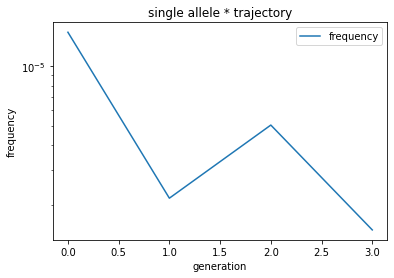

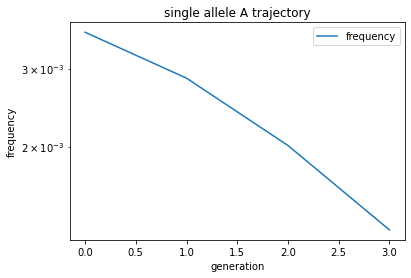

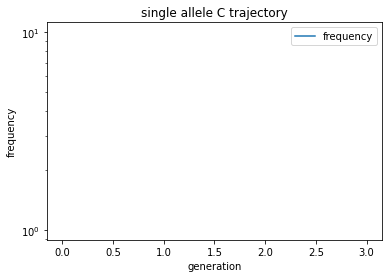

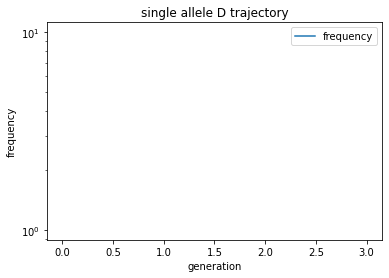

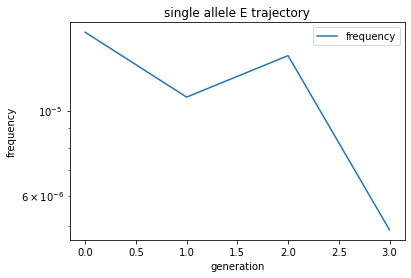

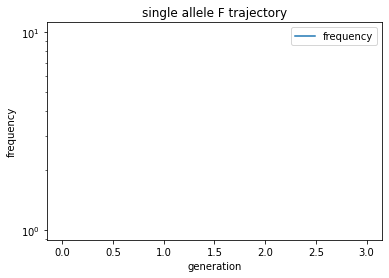

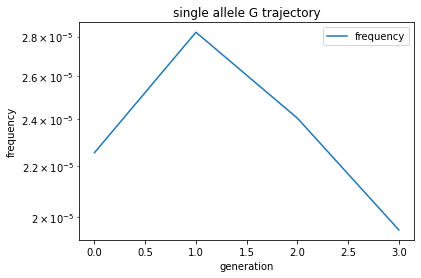

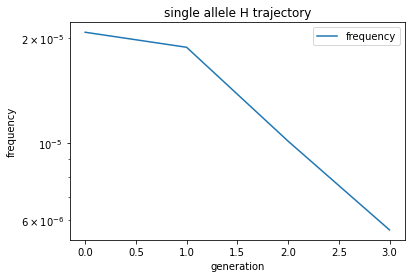

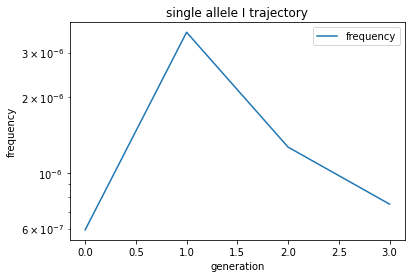

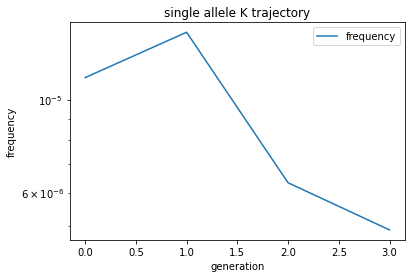

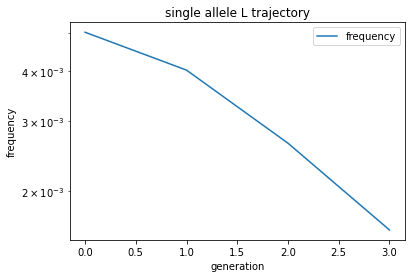

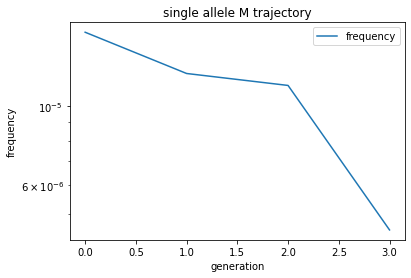

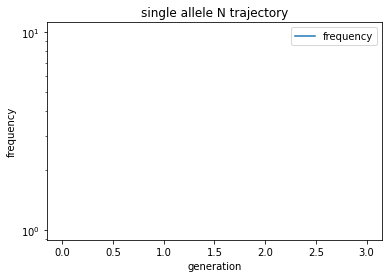

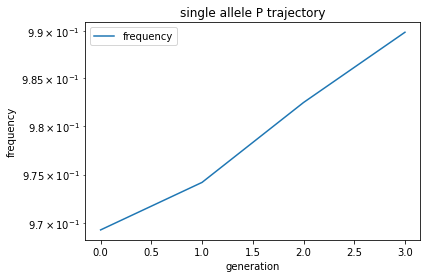

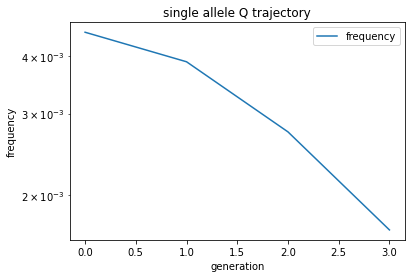

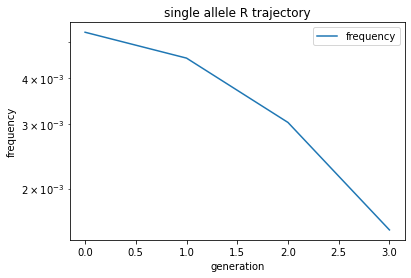

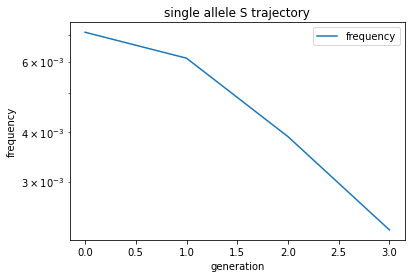

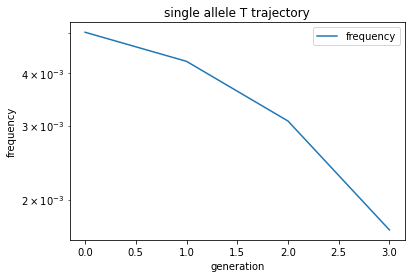

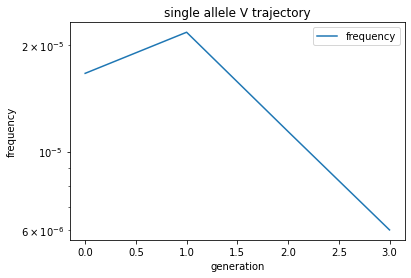

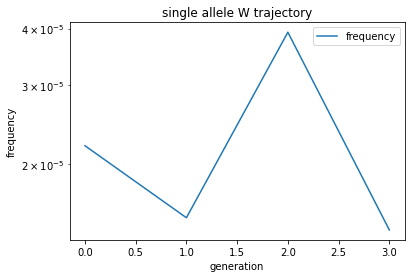

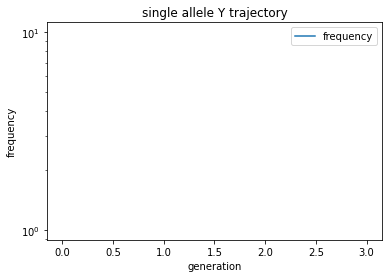

In [54]:
df_single

df_traj_28 = df_single.loc[(df_single['site']==5)]
# df_traj_28[df_traj_28['AA_1']=='P'].plot(x='generation',y='frequency')
# df_traj_28[df_traj_28['AA_1']=='W'].plot(x='generation',y='frequency')

for aa in AA:
    df_traj_28[df_traj_28['AA_1']==aa].plot(x='generation',y='frequency')
    plt.yscale('log')
    plt.ylabel('frequency')
    plt.title('single allele '+aa+' trajectory')
# df_enrich = pd.read_csv('/Users/zhenchenhong/Downloads/paper-DMS-inference/data/human_protein/YAP1/pref/enrichment.csv.gz')
# df_enrich = df_enrich[~df_enrich['hgvs_pro'].str.contains('\[')]
# df_enrich = df_enrich[ df_enrich['hgvs_pro'].str.contains('p.')]
# df_enrich = df_enrich[ df_enrich['hgvs_pro'].str.contains('33')]
# df_enrich.sort_values('score_101208')

In [223]:
df_merged.loc[df_merged['all_variant']=='15_R_25_M']


,mu2_single,selection_coefficients_2,mu1_single,selection_coefficients_1,0,1,2,3,mutant1,mutant2,NSCOR_ratio_1,NSCOR_ratio_2,NSCOR_ratio_3,projected_0,projected_1,projected_2,projected_3,slope_v,function_score,predicted_score,site_1_x,site_2_x,AA_1_x,AA_2_x,all_variant,epistasis_paper,state_1,state_2,mat_index,epistasis_MPL,site_1_y,AA_1_y,site_2_y,AA_2_y,epistasis_MPL_transfer,epistasis_MPL_cons,epistasis_MPL_cons_2,epistasis_MPL_cons_1,distance,log_dist
10178,25_M_25_M,0.012447,15_R_15_R,-0.008504,0.000062,0.000113,0.00094,0.002966,Ser14Arg,Ile24Met,1.857645,8.436455,3.169389,0,0.893474,3.970111,5.634316,1.997959,3.518568,1.451396,15,25,R,M,15_R_25_M,2.067172,288,494,24511,0.617065,14,R,24,M,0.617171,0.0,1.589733,1.599507,23.799595,3.169669


Text(0, 0.5, 'frequency')

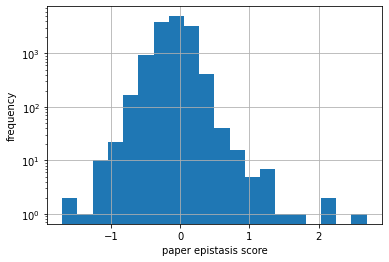

In [226]:
df_merged['epistasis_paper'].hist(bins=20)
plt.yscale('log')
plt.xlabel('paper epistasis score')
plt.ylabel('frequency')

In [206]:
df_traj_23_33 = df_single.loc[(df_single['site']==14)&(df_single['AA_1']=='R')]
df_traj_23_33

,replicate,generation,site,AA_1,counts,frequency
288,1,0,14,R,15869,0.009421
1002,1,1,14,R,17202,0.012449
1716,1,2,14,R,13952,0.017664
2430,1,3,14,R,63303,0.023788


In [207]:
df_traj_23_33 = df_double.loc[(df_double['site_1']==14) & (df_double['site_2']==24)]
x=df_traj_23_33[(df_traj_23_33['AA_1']=='R') & (df_traj_23_33['AA_2']=='M')]['frequency']
df_traj_23_33 = df_single.loc[(df_single['site']==14)&(df_single['AA_1']=='R')]
y=df_traj_23_33['frequency']
df_traj_23_33 = df_single.loc[(df_single['site']==24)&(df_single['AA_1']=='M')]
z=df_traj_23_33['frequency']

[i-j*k for i,j,k in zip(x,y,z)]

[-1.8743628385340222e-05,
 -1.5164558758939676e-05,
 0.0005128325836052585,
 0.001836823304018625]

In [208]:
df_traj_23_33 = df_double.loc[(df_double['site_1']==14) & (df_double['site_2']==24)]
x=df_traj_23_33[(df_traj_23_33['AA_1']=='I') & (df_traj_23_33['AA_2']=='M')]['frequency']
df_traj_23_33 = df_single.loc[(df_single['site']==14)&(df_single['AA_1']=='I')]
y=df_traj_23_33['frequency']
df_traj_23_33 = df_single.loc[(df_single['site']==24)&(df_single['AA_1']=='M')]
z=df_traj_23_33['frequency']

[i-j*k for i,j,k in zip(x,y,z)]

[-8.587398293302088e-06,
 -9.689097337050995e-06,
 4.9429668627505864e-05,
 4.2444457530375296e-05]

In [209]:
df_traj_23_33 = df_double.loc[(df_double['site_1']==14) & (df_double['site_2']==24)]
x=df_traj_23_33[(df_traj_23_33['AA_1']=='T') & (df_traj_23_33['AA_2']=='M')]['frequency']
df_traj_23_33 = df_single.loc[(df_single['site']==14)&(df_single['AA_1']=='T')]
y=df_traj_23_33['frequency']
df_traj_23_33 = df_single.loc[(df_single['site']==24)&(df_single['AA_1']=='M')]
z=df_traj_23_33['frequency']

[i-j*k for i,j,k in zip(x,y,z)]

[-1.0472316933378232e-05,
 -1.4194671253231008e-05,
 -1.6393883708923736e-05,
 -2.5658624775843275e-05]

In [215]:
df_traj_23_33 = df_double.loc[(df_double['site_1']==14) & (df_double['site_2']==24)]
x=df_traj_23_33[(df_traj_23_33['AA_1']=='R') & (df_traj_23_33['AA_2']=='T')]['frequency']
df_traj_23_33 = df_single.loc[(df_single['site']==14)&(df_single['AA_1']=='R')]
y=df_traj_23_33['frequency']
df_traj_23_33 = df_single.loc[(df_single['site']==24)&(df_single['AA_1']=='T')]
z=df_traj_23_33['frequency']

[i-j*k for i,j,k in zip(x,y,z)]

[-5.158492332665871e-06,
 -1.4811395052714806e-05,
 -1.8527825413298143e-05,
 -3.349301164929547e-05]

In [5]:
def codon2aa(c, noq=False):              # Returns the amino acid character corresponding to the input codon.
        
    if c[0]=='-' and c[1]=='-' and c[2]=='-': return '-'        # If all nucleotides are missing, return gap
    
    elif c[0]=='-' or c[1]=='-' or c[2]=='-':                   # Else if some nucleotides are missing, return '?'
        if noq: return '-'
        else:   return '?'
   
    # If the first or second nucleotide is ambiguous, AA cannot be determined, return 'X'
    elif c[0] in ['W', 'S', 'M', 'K', 'R', 'Y'] or c[1] in ['W', 'S', 'M', 'K', 'R', 'Y']: return 'X'     
                                                    
    elif c[0]=='T':                                             # Else go to tree
        if c[1]=='T':
            if    c[2] in ['T', 'C', 'Y']: return 'F'
            elif  c[2] in ['A', 'G', 'R']: return 'L'
            else:                          return 'X'
        elif c[1]=='C':                    return 'S'
        elif c[1]=='A':
            if    c[2] in ['T', 'C', 'Y']: return 'Y'
            elif  c[2] in ['A', 'G', 'R']: return '*'
            else:                          return 'X'
        elif c[1]=='G':
            if    c[2] in ['T', 'C', 'Y']: return 'C'
            elif  c[2]=='A':               return '*'
            elif  c[2]=='G':               return 'W'
            else:                          return 'X'
        else:                              return 'X'
        
    elif c[0]=='C':
        if   c[1]=='T':                    return 'L'
        elif c[1]=='C':                    return 'P'
        elif c[1]=='A':
            if    c[2] in ['T', 'C', 'Y']: return 'H'
            elif  c[2] in ['A', 'G', 'R']: return 'Q'
            else:                          return 'X'
        elif c[1]=='G':                    return 'R'
        else:                              return 'X'
        
    elif c[0]=='A':
        if c[1]=='T':
            if    c[2] in ['T', 'C', 'Y']: return 'I'
            elif  c[2] in ['A', 'M', 'W']: return 'I'
            elif  c[2]=='G':               return 'M'
            else:                          return 'X'
        elif c[1]=='C':                    return 'T'
        elif c[1]=='A':
            if    c[2] in ['T', 'C', 'Y']: return 'N'
            elif  c[2] in ['A', 'G', 'R']: return 'K'
            else:                          return 'X'
        elif c[1]=='G':
            if    c[2] in ['T', 'C', 'Y']: return 'S'
            elif  c[2] in ['A', 'G', 'R']: return 'R'
            else:                          return 'X'
        else:                              return 'X'
        
    elif c[0]=='G':
        if   c[1]=='T':                    return 'V'
        elif c[1]=='C':                    return 'A'
        elif c[1]=='A':
            if    c[2] in ['T', 'C', 'Y']: return 'D'
            elif  c[2] in ['A', 'G', 'R']: return 'E'
            else:                          return 'X'
        elif c[1]=='G':                    return 'G'
        else:                              return 'X'

    else:                                  return 'X'


In [149]:
codon2aa


<AxesSubplot:xlabel='epistasis_paper', ylabel='distance'>

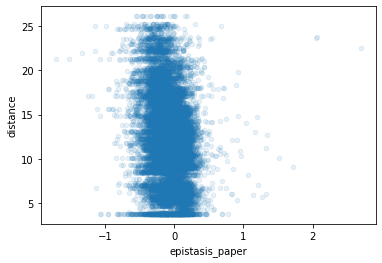

In [69]:
df_merged.plot.scatter('epistasis_paper', 'distance', alpha=0.1)

Text(0.5, 1.0, 'Pearsonr = 0.58, regularization = 1e-3')

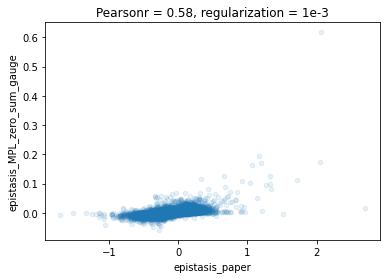

In [90]:
df_merge.plot.scatter(x='epistasis_paper', y='epistasis_MPL_transfer', alpha=0.1)
pr = st.pearsonr(df_merge.dropna()['epistasis_paper'], df_merge.dropna()['epistasis_MPL_transfer'])[0]
plt.ylabel('epistasis_MPL_zero_sum_gauge')

plt.title('Pearsonr = %.2f, regularization = 1e-3'%pr)

In [14]:

epistasis_gauge = []
for i, j, state_i, state_j in zip(df_merge['site_1_y'], df_merge['site_2_y'], df_merge['AA_1_y'], df_merge['AA_2_y']):
    wt_i = SEQUENCE[intt[i]-1]
    

,state_1,state_2,mat_index,selection_coefficients,site_1,AA_1,site_2,AA_2,all_variant
0,713,713,38166,-0.004932,34,Y,34,Y,35_Y_35_Y
1,711,711,38165,0.002077,34,V,34,V,35_V_35_V
2,710,710,38164,0.000901,34,T,34,T,35_T_35_T
3,709,709,38163,0.012913,34,S,34,S,35_S_35_S
4,708,708,38162,-0.095516,34,R,34,R,35_R_35_R
...,...,...,...,...,...,...,...,...,...
38162,0,97,4,-0.008397,1,*,5,P,2_*_6_P
38163,0,172,8,-0.008397,1,*,9,E,2_*_10_E
38164,0,132,6,-0.008397,1,*,7,G,2_*_8_G
38165,0,55,2,-0.008397,1,*,3,P,2_*_4_P


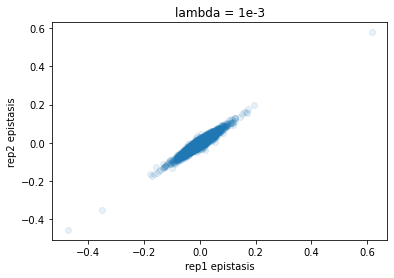

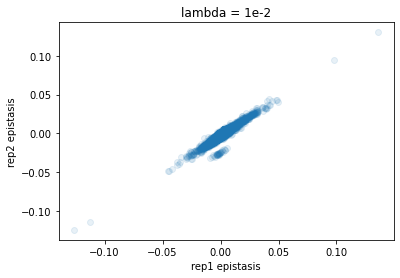

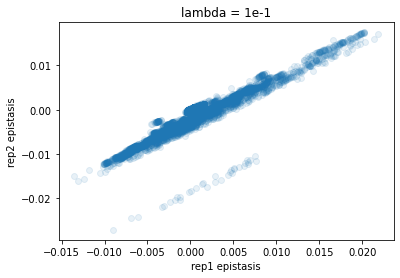

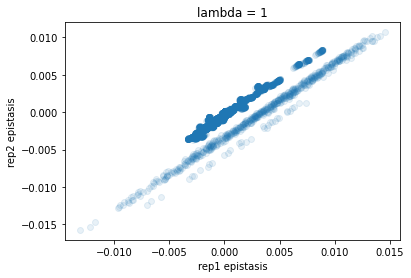

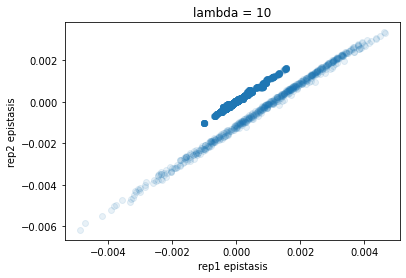

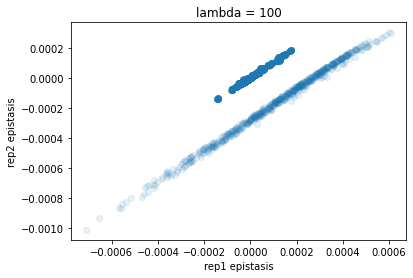

In [185]:
def reg_table(EPISTASIS_FILE):
#     EPISTASIS_FILE = './20220215_rep1_-3.txt'
    INDEX_FILE     = './index_matrix.csv'
    SEQUENCE       = "DVPLPAGWEMAKTSSGQRYFLNHIDQTTTWQDPR"
    AA  = sorted(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', '*'])

    with open(EPISTASIS_FILE) as f:
        content = f.readlines()
    content = [float(x.strip()) for x in content]
    df_index = pd.read_csv(INDEX_FILE, header=None)
    df_index.rename(columns = {0 : 'state_1', 1 : 'state_2', 2 : 'mat_index'}, inplace = True)
    index_list = df_index['mat_index'].tolist()
    selection_list = [content[i] for i in index_list]
    df_index['selection_coefficients'] = selection_list
    df_index['site_1'] = df_index['state_1']/21 + 2
    df_index['site_1'] = df_index['site_1'].astype(int)
    df_index['AA_1']   = df_index['state_1']%21
    df_index['AA_1']   = [AA[x] for x in df_index['AA_1'].tolist()]
    df_index['site_2'] = df_index['state_2']/21 + 2
    df_index['site_2'] = df_index['site_2'].astype(int)
    df_index['AA_2']   = df_index['state_2']%21
    df_index['AA_2']   = [AA[x] for x in df_index['AA_2'].tolist()]

    cols = ['site_1', 'AA_1', 'site_2', 'AA_2']
    df_index['all_variant'] = df_index[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis = 1)

    WT_list = []; axis_1 = []; axis_2 = []
    for i in range(len(SEQUENCE)):
        WT_list.append(i * 21 + AA.index(SEQUENCE[i]))
    df_WT_epi = df_index[(~df_index['state_1'].isin(WT_list))&(~df_index['state_2'].isin(WT_list))&(df_index['state_2'] != df_index['state_1'])]
    df_WT_epi = df_WT_epi.sort_values(['site_1', 'site_2'])

    df_WT_epi['absolute_s'] = np.abs(df_WT_epi['selection_coefficients'])
    df_WT_epi = df_WT_epi.groupby(['site_1', 'site_2'], as_index=False)['absolute_s'].agg('sum')
    df_WT_epi['site_1'] += 8
    df_WT_epi['site_2'] += 8
    df_WT_epi_ = df_WT_epi.copy()
    df_WT_epi_ = df_WT_epi_.rename(columns={"site_1":"site_2", "site_2":"site_1"})
    df_WT_epi  = df_WT_epi.append(df_WT_epi_, ignore_index=True, sort=False)
    flights = df_WT_epi.pivot("site_1", "site_2", "absolute_s")


    df_index['site_1'] = df_index['site_1']-1
    df_index['site_2'] = df_index['site_2']-1
    return df_index


x=[-3, -2, -1, 0, 1, 2]
y=[]

EPISTASIS_FILE = 'rep1_-3.txt'
rep_1 = reg_table(EPISTASIS_FILE)['selection_coefficients']

EPISTASIS_FILE = 'rep2_-3.txt'
rep_2 = reg_table(EPISTASIS_FILE)['selection_coefficients']

y.append(st.pearsonr(rep_1, rep_2)[0])

plt.scatter(rep_1, rep_2, alpha=0.1)
plt.title('lambda = 1e-3')
plt.xlabel('rep1 epistasis')
plt.ylabel('rep2 epistasis')
plt.show()

EPISTASIS_FILE = 'rep1_-2.txt'
rep_1 = reg_table(EPISTASIS_FILE)['selection_coefficients']

EPISTASIS_FILE = 'rep2_-2.txt'
rep_2 = reg_table(EPISTASIS_FILE)['selection_coefficients']

y.append(st.pearsonr(rep_1, rep_2)[0])

plt.scatter(rep_1, rep_2, alpha=0.1)
plt.title('lambda = 1e-2')
plt.xlabel('rep1 epistasis')
plt.ylabel('rep2 epistasis')
plt.show()

EPISTASIS_FILE = 'rep1_-1.txt'
rep_1 = reg_table(EPISTASIS_FILE)['selection_coefficients']

EPISTASIS_FILE = 'rep2_-1.txt'
rep_2 = reg_table(EPISTASIS_FILE)['selection_coefficients']

y.append(st.pearsonr(rep_1, rep_2)[0])

plt.scatter(rep_1, rep_2, alpha=0.1)
plt.title('lambda = 1e-1')
plt.xlabel('rep1 epistasis')
plt.ylabel('rep2 epistasis')
plt.show()

EPISTASIS_FILE = 'rep1_0.txt'
rep_1 = reg_table(EPISTASIS_FILE)['selection_coefficients']

EPISTASIS_FILE = 'rep2_0.txt'
rep_2 = reg_table(EPISTASIS_FILE)['selection_coefficients']

y.append(st.pearsonr(rep_1, rep_2)[0])

plt.scatter(rep_1, rep_2, alpha=0.1)
plt.title('lambda = 1')
plt.xlabel('rep1 epistasis')
plt.ylabel('rep2 epistasis')
plt.show()

EPISTASIS_FILE = 'rep1_1.txt'
rep_1 = reg_table(EPISTASIS_FILE)['selection_coefficients']

EPISTASIS_FILE = 'rep2_1.txt'
rep_2 = reg_table(EPISTASIS_FILE)['selection_coefficients']

y.append(st.pearsonr(rep_1, rep_2)[0])

plt.scatter(rep_1, rep_2, alpha=0.1)
plt.title('lambda = 10')
plt.xlabel('rep1 epistasis')
plt.ylabel('rep2 epistasis')
plt.show()

EPISTASIS_FILE = 'rep1_2.txt'
rep_1 = reg_table(EPISTASIS_FILE)['selection_coefficients']

EPISTASIS_FILE = 'rep2_2.txt'
rep_2 = reg_table(EPISTASIS_FILE)['selection_coefficients']

y.append(st.pearsonr(rep_1, rep_2)[0])

plt.scatter(rep_1, rep_2, alpha=0.1)
plt.title('lambda = 100')
plt.xlabel('rep1 epistasis')
plt.ylabel('rep2 epistasis')
plt.show()




In [180]:
loc_list = []
list_1 = list(rep_1.values)
list_2 = list(rep_2.values)
for i in range(len(rep_1)):
#     i=int(i)
    if np.abs(list_1[i]-list_2[i])>0.0002:
        loc_list.append(i)

In [182]:
reg_table(EPISTASIS_FILE).iloc[loc_list]

,state_1,state_2,mat_index,selection_coefficients,site_1,AA_1,site_2,AA_2,all_variant
4,708,708,38162,-3.270631e-07,34,R,34,R,35_R_35_R
64,685,708,38110,2.264053e-04,33,P,34,R,34_P_35_R
65,685,685,38096,-1.871269e-05,33,P,33,P,34_P_34_P
219,654,708,37947,1.833529e-04,32,D,34,R,33_D_35_R
235,654,685,37927,1.636007e-04,32,D,33,P,33_D_34_P
...,...,...,...,...,...,...,...,...,...
37890,97,507,9444,-4.235524e-04,5,P,25,D,6_P_26_D
37893,97,132,9152,8.980046e-05,5,P,7,G,6_P_8_G
37910,97,97,9130,-5.832230e-05,5,P,5,P,6_P_6_P
37926,97,350,9323,-1.981604e-05,5,P,17,Q,6_P_18_Q


In [183]:
SEQUENCE

'DVPLPAGWEMAKTSSGQRYFLNHIDQTTTWQDPR'

Text(0, 0.5, 'correlation between selections coefficients across replicates')

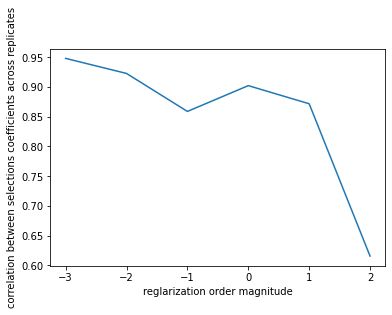

In [159]:
plt.plot(x,y)
plt.xlabel('reglarization order magnitude')
plt.ylabel('correlation between selections coefficients across replicates')

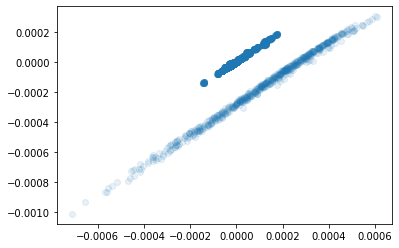

In [710]:
seq = []
sequence = [i for i in SEQUENCE]
for i,j,k,l in zip(df_merge['site_1_y'], df_merge['AA_1_y'], df_merge['site_2_y'], df_merge['AA_2_y']):
    temp = sequence.copy()
    temp[i-1] = j
    temp[k-1] = l
    seq.append(''.join(temp))

df_merge['genotype'] = seq
df_merge

,0,1,2,3,mutant1,mutant2,NSCOR_ratio_1,NSCOR_ratio_2,NSCOR_ratio_3,projected_0,projected_1,projected_2,projected_3,slope_v,function_score,predicted_score,site_1_x,site_2_x,AA_1_x,AA_2_x,all_variant,epistasis,state_1,state_2,mat_index,selection_coefficients,site_1_y,AA_1_y,site_2_y,AA_2_y,genotype
0,2.829216e-05,0.000013,0.000011,0.000007,Arg18Leu,Gln26Glu,0.429015,0.876377,0.581999,0,-1.220898,-1.411274,-2.192186,-0.676694,0.551081,0.678882,18,26,L,E,18_L_26_E,-0.127801,346,508,28081,0.000167,17,L,25,E,DVPLPAGWEMAKTSSGLRYFLNHIEQTTTWQDPR
1,4.629626e-05,0.000058,0.000054,0.000070,Asp25Asn,Thr29Ser,1.262516,0.925025,1.312409,0,0.336302,0.223866,0.616084,0.173582,0.993514,1.326684,25,29,N,S,25_N_29_S,-0.333170,495,583,34633,-0.001501,24,N,28,S,DVPLPAGWEMAKTSSGQRYFLNHNDQTSTWQDPR
2,8.573381e-07,0.000005,0.000004,0.000001,Pro3His,Gly16Ser,6.329945,0.698003,0.287805,0,2.662193,2.143498,0.346664,0.052130,0.913299,0.922484,3,16,H,S,3_H_16_S,-0.009185,28,310,3508,0.001701,2,H,15,S,DHPLPAGWEMAKTSSGQRYFLNHIDQTTTWQDPR
3,4.115223e-05,0.000031,0.000017,0.000003,Pro5Leu,Trp8Cys,0.735150,0.538081,0.157053,0,-0.443889,-1.337994,-4.008670,-1.292012,0.359738,0.348432,5,8,L,C,5_L_8_C,0.011306,73,128,7078,-0.012050,4,L,7,C,DVPLPACWEMAKTSSGQRYFLNHIDQTTTWQDPR
4,2.143345e-05,0.000022,0.000020,0.000021,Val2Gly,Arg18Leu,1.035307,0.918848,1.036661,0,0.050059,-0.072044,-0.020100,-0.018240,0.869821,1.815150,2,18,G,L,2_G_18_L,-0.945330,6,346,1232,-0.003565,1,G,17,L,GVPLPAGWEMAKTSSGLRYFLNHIDQTTTWQDPR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,1.457475e-05,0.000015,0.000002,0.000002,Leu4Pro,Gln26His,1.014344,0.111915,0.876192,0,0.020547,-3.138972,-3.329654,-1.314848,0.354088,0.548202,4,26,P,H,4_P_26_H,-0.194114,55,511,5707,0.029249,3,P,25,H,DVPLPAGWEMAKTSSGQRYFLNHIHQTTTWQDPR
3586,3.343619e-05,0.000042,0.000022,0.000004,Trp8Cys,Thr28Ile,1.271582,0.519628,0.189741,0,0.346624,-0.597824,-2.995719,-0.993161,0.442537,0.179209,8,28,C,I,8_C_28_I,0.263328,128,554,12672,0.008935,7,C,27,I,DVPLPACWEMAKTSSGQRYFLNHIDQITTWQDPR
3587,1.628942e-05,0.000043,0.000017,0.000007,Glu9Gly,Thr27Pro,2.712657,0.376059,0.418558,0,1.439707,0.028737,-1.227764,-0.509426,0.618825,0.823875,9,27,G,P,9_G_27_P,-0.205050,153,538,14732,0.003420,8,G,26,P,DVPLPAGGEMAKTSSGQRYFLNHIDPTTTWQDPR
3588,2.314813e-05,0.000018,0.000009,0.000005,Pro5Ala,His23Asn,0.767558,0.509136,0.523160,0,-0.381652,-1.355529,-2.290205,-0.784449,0.511420,0.375322,5,23,A,N,5_A_23_N,0.136098,64,453,6836,-0.002528,4,A,22,N,DVPAPAGWEMAKTSSGQRYFLNHIDQTTTWQDPR


In [57]:
df_merge

NameError: name 'df_merge' is not defined

In [717]:
min(df_merge['site_1_y'].unique())

1

In [715]:
fitness_list = []
length = len(SEQUENCE)
x=0
for genotype in df_merge['genotype']:
    x+=1
    print(x)
    fitness = 1
    for i in range(length-1):
        for j in range(i+1,length):
            mut1=genotype[i]
            mut2=genotype[j]
            state1=i*21+AA.index(mut1)
            state2=j*21+AA.index(mut2)
            fitness+=df_index[(df_index['state_1']==state1) & (df_index['state_2']==state1)]['selection_coefficients']
            fitness+=df_index[(df_index['state_1']==state2) & (df_index['state_2']==state2)]['selection_coefficients']
            fitness+=df_index[(df_index['state_1']==state1) & (df_index['state_2']==state2)]['selection_coefficients']
            fitness_list.append(fitness)
df_merge['fitness_MPL'] = fitness_list
df_merge

1
2
3
4
5
6


KeyboardInterrupt: 

In [749]:
wt_state_list = [i*21+AA.index(SEQUENCE[i]) for i in range(length)]

wt_df_1mut = df_index.loc[(df_index['state_1'].isin(wt_state_list))|(df_index['state_2'].isin(wt_state_list))]
wt_df_1mut = wt_df_1mut.loc[(~wt_df_1mut['AA_1'].isin(['*']))]

wt_df = df_index.loc[(df_index['state_1'].isin(wt_state_list))&(df_index['state_2'].isin(wt_state_list))]
wt_df = wt_df.loc[(~wt_df['AA_1'].isin(['*']))]
wt_df

,state_1,state_2,mat_index,selection_coefficients,site_1,AA_1,site_2,AA_2,all_variant
4,708,708,38162,-0.095516,34,R,34,R,35_R_35_R
64,685,708,38110,0.090824,33,P,34,R,34_P_35_R
65,685,685,38096,-0.121697,33,P,33,P,34_P_34_P
219,654,708,37947,0.117219,32,D,34,R,33_D_35_R
235,654,685,37927,0.021028,32,D,33,P,33_D_34_P
...,...,...,...,...,...,...,...,...,...
37890,97,507,9444,-0.078876,5,P,25,D,6_P_26_D
37893,97,132,9152,0.013185,5,P,7,G,6_P_8_G
37910,97,97,9130,-0.068015,5,P,5,P,6_P_6_P
37926,97,350,9323,-0.004743,5,P,17,Q,6_P_18_Q


In [729]:
SEQUENCE

'DVPLPAGWEMAKTSSGQRYFLNHIDQTTTWQDPR'

In [752]:
fitness_list = []
length = len(SEQUENCE)
x=0

# wt_state_list = [i*21+AA.index(SEQUENCE[i]) for i in range(length)]

# wt_df = df_index.loc[(df_index['state_1'].isin(wt_state_list))|(df_index['state_2'].isin(wt_state_list))]


for genotype, site1, site2, mut1, mut2 in zip(df_merge['genotype'], 
                                              df_merge['site_1_y'], 
                                              df_merge['site_2_y'],
                                              df_merge['AA_1_y'],
                                              df_merge['AA_2_y']):
    fitness=1
    x+=1
    print(x)
    fitness = 1
    wt1=SEQUENCE[site1-1]
    wt2=SEQUENCE[site2-1]
    wt_state1 = (site1-1)*21+AA.index(wt1)
    wt_state2 = (site2-1)*21+AA.index(wt2)
    df1 = wt_df[(wt_df['state_1']==wt_state1) |
                (wt_df['state_1']==wt_state2) |
                (wt_df['state_2']==wt_state1) |
                (wt_df['state_2']==wt_state2)]
    subtract_fitness = df1['selection_coefficients'].sum()

    mut_state1 = (site1-1)*21+AA.index(mut1)
    mut_state2 = (site2-1)*21+AA.index(mut2)
    df2 = wt_df_1mut[(wt_df_1mut['state_1']==mut_state1) |
                     (wt_df_1mut['state_1']==mut_state2) |
                     (wt_df_1mut['state_2']==mut_state1) |
                     (wt_df_1mut['state_2']==mut_state2)]
    add_fitness = df2['selection_coefficients'].sum()
    fitness_list.append(fitness+add_fitness-subtract_fitness)


df_merge['fitness_MPL'] = fitness_list
df_merge

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098


3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590


,0,1,2,3,mutant1,mutant2,NSCOR_ratio_1,NSCOR_ratio_2,NSCOR_ratio_3,projected_0,projected_1,projected_2,projected_3,slope_v,function_score,predicted_score,site_1_x,site_2_x,AA_1_x,AA_2_x,all_variant,epistasis,state_1,state_2,mat_index,selection_coefficients,site_1_y,AA_1_y,site_2_y,AA_2_y,genotype,fitness_MPL
0,2.829216e-05,0.000013,0.000011,0.000007,Arg18Leu,Gln26Glu,0.429015,0.876377,0.581999,0,-1.220898,-1.411274,-2.192186,-0.676694,0.551081,0.678882,18,26,L,E,18_L_26_E,-0.127801,346,508,28081,0.000167,17,L,25,E,DVPLPAGWEMAKTSSGLRYFLNHIEQTTTWQDPR,0.974795
1,4.629626e-05,0.000058,0.000054,0.000070,Asp25Asn,Thr29Ser,1.262516,0.925025,1.312409,0,0.336302,0.223866,0.616084,0.173582,0.993514,1.326684,25,29,N,S,25_N_29_S,-0.333170,495,583,34633,-0.001501,24,N,28,S,DVPLPAGWEMAKTSSGQRYFLNHNDQTSTWQDPR,0.880823
2,8.573381e-07,0.000005,0.000004,0.000001,Pro3His,Gly16Ser,6.329945,0.698003,0.287805,0,2.662193,2.143498,0.346664,0.052130,0.913299,0.922484,3,16,H,S,3_H_16_S,-0.009185,28,310,3508,0.001701,2,H,15,S,DHPLPAGWEMAKTSSGQRYFLNHIDQTTTWQDPR,2.603046
3,4.115223e-05,0.000031,0.000017,0.000003,Pro5Leu,Trp8Cys,0.735150,0.538081,0.157053,0,-0.443889,-1.337994,-4.008670,-1.292012,0.359738,0.348432,5,8,L,C,5_L_8_C,0.011306,73,128,7078,-0.012050,4,L,7,C,DVPLPACWEMAKTSSGQRYFLNHIDQTTTWQDPR,0.374367
4,2.143345e-05,0.000022,0.000020,0.000021,Val2Gly,Arg18Leu,1.035307,0.918848,1.036661,0,0.050059,-0.072044,-0.020100,-0.018240,0.869821,1.815150,2,18,G,L,2_G_18_L,-0.945330,6,346,1232,-0.003565,1,G,17,L,GVPLPAGWEMAKTSSGLRYFLNHIDQTTTWQDPR,1.092508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,1.457475e-05,0.000015,0.000002,0.000002,Leu4Pro,Gln26His,1.014344,0.111915,0.876192,0,0.020547,-3.138972,-3.329654,-1.314848,0.354088,0.548202,4,26,P,H,4_P_26_H,-0.194114,55,511,5707,0.029249,3,P,25,H,DVPLPAGWEMAKTSSGQRYFLNHIHQTTTWQDPR,3.760739
3586,3.343619e-05,0.000042,0.000022,0.000004,Trp8Cys,Thr28Ile,1.271582,0.519628,0.189741,0,0.346624,-0.597824,-2.995719,-0.993161,0.442537,0.179209,8,28,C,I,8_C_28_I,0.263328,128,554,12672,0.008935,7,C,27,I,DVPLPACWEMAKTSSGQRYFLNHIDQITTWQDPR,0.560913
3587,1.628942e-05,0.000043,0.000017,0.000007,Glu9Gly,Thr27Pro,2.712657,0.376059,0.418558,0,1.439707,0.028737,-1.227764,-0.509426,0.618825,0.823875,9,27,G,P,9_G_27_P,-0.205050,153,538,14732,0.003420,8,G,26,P,DVPLPAGGEMAKTSSGQRYFLNHIDPTTTWQDPR,0.107400
3588,2.314813e-05,0.000018,0.000009,0.000005,Pro5Ala,His23Asn,0.767558,0.509136,0.523160,0,-0.381652,-1.355529,-2.290205,-0.784449,0.511420,0.375322,5,23,A,N,5_A_23_N,0.136098,64,453,6836,-0.002528,4,A,22,N,DVPAPAGWEMAKTSSGQRYFLNHIDQTTTWQDPR,-1.969264


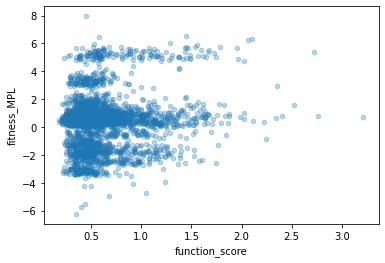

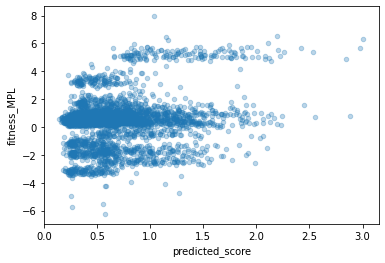

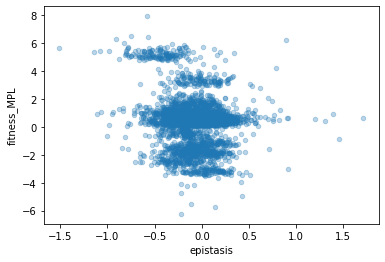

In [764]:
df_merge.plot.scatter(x='function_score', y='fitness_MPL', alpha=0.3)
plt.show()
df_merge.plot.scatter(x='predicted_score', y='fitness_MPL', alpha=0.3)
plt.show()
df_merge.plot.scatter(x='epistasis', y='fitness_MPL', alpha=0.3)
plt.show()

In [ ]:
df_merge

In [747]:
SEQUENCE

'DVPLPAGWEMAKTSSGQRYFLNHIDQTTTWQDPR'

Text(0, 0.5, 'epistasis(MPL)')

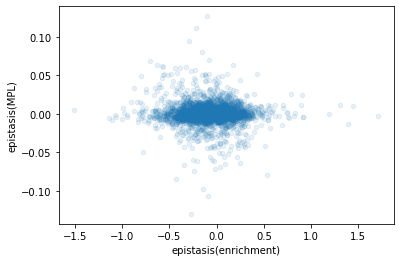

In [650]:
df_merge.plot.scatter(x='epistasis', y='selection_coefficients', alpha=0.1)
plt.xlabel('epistasis(enrichment)')
plt.ylabel('epistasis(MPL)')
# plt.ylim([-0.0001, 0.0001])

Text(0, 0.5, 'epistasis(MPL)')

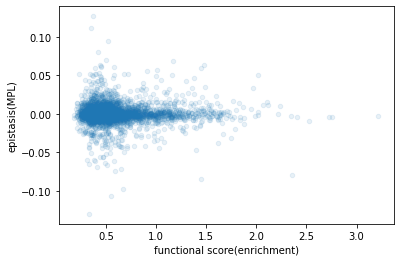

In [651]:
df_merge.plot.scatter(x='function_score', y='selection_coefficients', alpha=0.1)
plt.xlabel('functional score(enrichment)')
plt.ylabel('epistasis(MPL)')
# plt.ylim([-0.0001, 0.0001])

Text(0, 0.5, 'epistasis(MPL)')

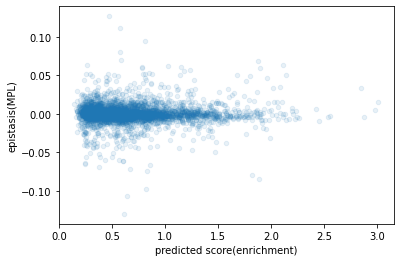

In [652]:
df_merge.plot.scatter(x='predicted_score', y='selection_coefficients', alpha=0.1)
plt.xlabel('predicted score(enrichment)')
plt.ylabel('epistasis(MPL)')
# plt.ylim([-0.0001, 0.0001])

In [653]:
st.pearsonr(df_merge['epistasis'], df_merge['selection_coefficients'])

(-0.04005480650686606, 0.016391689046684272)

In [664]:
df_strength_paper = double_count_table_[['function_score', 'predicted_score', 'epistasis', 'site_1', 'site_2']]
df_strength_paper['site_pair'] = [str(i)+'_'+str(j) for i,j in zip(df_strength_paper['site_1'], df_strength_paper['site_2'])]
df_strength_paper=df_strength_paper.drop(['site_1', 'site_2'], axis=1)
df_strength_paper
epi_strength = pd.DataFrame(df_strength_paper.groupby('site_pair').epistasis.apply(lambda c: c.abs().sum())).reset_index()
epi_strength

/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,site_pair,epistasis
0,10_11,6.022069
1,10_12,9.002584
2,10_13,4.684156
3,10_14,10.925103
4,10_15,8.879189
...,...,...
556,9_30,6.066330
557,9_31,9.686663
558,9_32,13.760209
559,9_33,7.156511


In [655]:
df_strength_selection = df_index[['site_1', 'site_2', 'selection_coefficients']]
df_strength_selection['site_pair'] = [str(i)+'_'+str(j) for i,j in zip(df_strength_selection['site_1'], df_strength_selection['site_2'])]
df_strength_selection=df_strength_selection.drop(['site_1', 'site_2'], axis=1)
df_strength_selection

epi_strength_mpl = pd.DataFrame(df_strength_selection.groupby('site_pair').selection_coefficients.apply(lambda c: c.abs().sum())).reset_index()


/Users/zhenchenhong/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [656]:
epi_strength
# epi_strength_mpl
df_merge_epis = pd.merge(epi_strength, epi_strength_mpl, how="inner", on=["site_pair"])
df_merge_epis

,site_pair,epistasis,selection_coefficients
0,10_11,6.022069,0.437351
1,10_12,9.002584,0.549077
2,10_13,4.684156,0.364069
3,10_14,10.925103,0.457668
4,10_15,8.879189,0.652812
...,...,...,...
523,9_30,6.066330,0.498649
524,9_31,9.686663,0.808558
525,9_32,13.760209,0.487036
526,9_33,7.156511,0.721128


Text(0, 0.5, 'epistasis strength(MPL)')

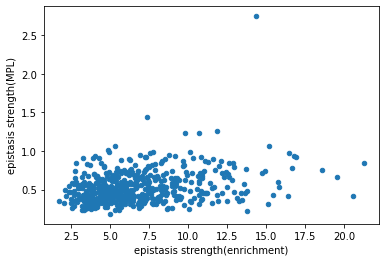

In [657]:
df_merge_epis.plot.scatter(x='epistasis', y='selection_coefficients')
plt.xlabel('epistasis strength(enrichment)')
plt.ylabel('epistasis strength(MPL)')

Text(0, 0.5, 'epistasis strength(MPL)')

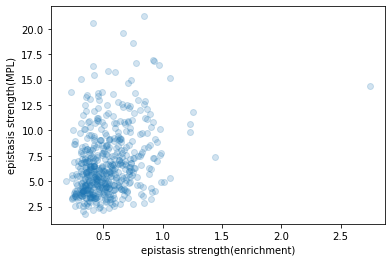

In [671]:
plt.scatter(x=df_merge_epis['selection_coefficients'], y=(df_merge_epis['epistasis']), alpha = 0.2)
plt.xlabel('epistasis strength(enrichment)')
plt.ylabel('epistasis strength(MPL)')

In [672]:
st.pearsonr((df_merge_epis['selection_coefficients']), (df_merge_epis['epistasis']))

(0.3067468849671833, 5.751500485440604e-13)

In [673]:
df_merge_epis.corr()

,epistasis,selection_coefficients
epistasis,1.000000,0.306747
selection_coefficients,0.306747,1.000000


In [676]:
df_merge.to_csv('combined_ressults.csv')

In [677]:
df_merge

,0,1,2,3,mutant1,mutant2,NSCOR_ratio_1,NSCOR_ratio_2,NSCOR_ratio_3,projected_0,projected_1,projected_2,projected_3,slope_v,function_score,predicted_score,site_1_x,site_2_x,AA_1_x,AA_2_x,all_variant,epistasis,state_1,state_2,mat_index,selection_coefficients,site_1_y,AA_1_y,site_2_y,AA_2_y
0,2.829216e-05,0.000013,0.000011,0.000007,Arg18Leu,Gln26Glu,0.429015,0.876377,0.581999,0,-1.220898,-1.411274,-2.192186,-0.676694,0.551081,0.678882,18,26,L,E,18_L_26_E,-0.127801,346,508,28081,0.000167,18,L,26,E
1,4.629626e-05,0.000058,0.000054,0.000070,Asp25Asn,Thr29Ser,1.262516,0.925025,1.312409,0,0.336302,0.223866,0.616084,0.173582,0.993514,1.326684,25,29,N,S,25_N_29_S,-0.333170,495,583,34633,-0.001501,25,N,29,S
2,8.573381e-07,0.000005,0.000004,0.000001,Pro3His,Gly16Ser,6.329945,0.698003,0.287805,0,2.662193,2.143498,0.346664,0.052130,0.913299,0.922484,3,16,H,S,3_H_16_S,-0.009185,28,310,3508,0.001701,3,H,16,S
3,4.115223e-05,0.000031,0.000017,0.000003,Pro5Leu,Trp8Cys,0.735150,0.538081,0.157053,0,-0.443889,-1.337994,-4.008670,-1.292012,0.359738,0.348432,5,8,L,C,5_L_8_C,0.011306,73,128,7078,-0.012050,5,L,8,C
4,2.143345e-05,0.000022,0.000020,0.000021,Val2Gly,Arg18Leu,1.035307,0.918848,1.036661,0,0.050059,-0.072044,-0.020100,-0.018240,0.869821,1.815150,2,18,G,L,2_G_18_L,-0.945330,6,346,1232,-0.003565,2,G,18,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,1.457475e-05,0.000015,0.000002,0.000002,Leu4Pro,Gln26His,1.014344,0.111915,0.876192,0,0.020547,-3.138972,-3.329654,-1.314848,0.354088,0.548202,4,26,P,H,4_P_26_H,-0.194114,55,511,5707,0.029249,4,P,26,H
3586,3.343619e-05,0.000042,0.000022,0.000004,Trp8Cys,Thr28Ile,1.271582,0.519628,0.189741,0,0.346624,-0.597824,-2.995719,-0.993161,0.442537,0.179209,8,28,C,I,8_C_28_I,0.263328,128,554,12672,0.008935,8,C,28,I
3587,1.628942e-05,0.000043,0.000017,0.000007,Glu9Gly,Thr27Pro,2.712657,0.376059,0.418558,0,1.439707,0.028737,-1.227764,-0.509426,0.618825,0.823875,9,27,G,P,9_G_27_P,-0.205050,153,538,14732,0.003420,9,G,27,P
3588,2.314813e-05,0.000018,0.000009,0.000005,Pro5Ala,His23Asn,0.767558,0.509136,0.523160,0,-0.381652,-1.355529,-2.290205,-0.784449,0.511420,0.375322,5,23,A,N,5_A_23_N,0.136098,64,453,6836,-0.002528,5,A,23,N


In [678]:
SEQUENCE

'DVPLPAGWEMAKTSSGQRYFLNHIDQTTTWQDPR'

In [680]:
sorted(df_merge['site_1_y'].unique())

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33]

In [681]:
len(SEQUENCE)

34